<div style="text-align: center;">
  <div style="margin: 15px 0;">Univerzitet u Kragujevcu</div>
  <div style="margin: 15px 0;">Prirodno-Matematički fakultet</div>
  <div style="margin: 15px 0;">Institut za matematiku i informatiku</div>
</div>

<img src="logo_pmf.png" width="400" style="display: block; margin: auto;">

<div style="text-align: center;">
    <h1>Life Expectancy (WHO)</h1>
    <div style="margin: 15px 0;">Seminarski rad iz predmeta Uvod u nauku o podacima</div>
</div>

<br>
<div style="padding-left: 60px">
<div style="margin: 15px 0;"><b>Profesor:</b> Branko Arsić, Ph.D.</div>
<div style="margin: 15px 0;"><b>Članovi tima:</b></div>
<div style="margin: 15px 0;">Luka Mladićević 69/2022</div>
<div style="margin: 15px 0;">Emilija Djordjević 49/2022</div>
</div>

# Uvod i opis problema

Očekivani životni vek predstavlja jedan od najvažnijih pokazatelja kvaliteta života i razvijenosti jednog društva. On ne odražava samo zdravstveno stanje populacije, već i nivo ekonomskog razvoja, obrazovanja, dostupnost medicinske zaštite, higijenske uslove, ishranu, političku stabilnost i mnoge druge faktore.

U savremenom svetu, zahvaljujući velikim količinama dostupnih podataka i napretku u oblasti mašinskog učenja, moguće je analizirati faktore koji utiču na očekivani životni vek i modelovati njihove međusobne odnose kroz različite implementacije.

U ovom radu primenjivaćemo metode analize podataka i regresione modele kako bi istražili koji faktori imaju najjači uticaj na očekivani životni vek i koliko precizno je moguće predvideti njegovu vrednost na osnovu dostupnih socio-ekonomskih i zdravstvenih pokazatelja. Korišćenjem tehnika poput regularizacije, selekcije atributa i evaluacije modela nad trening i test skupom, cilj je dobiti robustan i interpretabilan model koji ne samo da predviđa, već i objašnjava obrasce u podacima.

### Opis problema

Iz perspektive mašinskog učenja, problem predikcije očekivanog životnog veka predstavlja zadatak regresije. Cilj je na osnovu poznatih karakteristika jedne zemlje - kao što su stopa smrtnosti odraslih (Adult Mortality), BDP, nivo obrazovanja, stopa imunizacije, zastupnost bolesti, potrošnja na zdravstvo i drugi indikatori, predvideti životni vek populacije.

Skup podataka obuhvata više zemalja kroz različite vremenske periode i sadrži kombinaciju numeričkih i kategorijskih promenljivih. Takva struktura podataka uvodi nekoliko izazova:

`Visoka dimenzionalnost`: veći broj potencijalnih prediktora može dovesti do prekomernog prilagođavanja (overfitting), zbog čega je neophodna pažljiva selekcija atributa.

`Multikolinearnost`: pojedini socio-ekonomski indikatori su međusobno snažno povezani, što može destabilizovati klasične regresione modele.

`Različite skale i distribucije podataka`: određene promenljive pokazuju izraženu asimetriju i prisustvo ekstremnih vrednosti, zbog čega je potrebna transformacija (npr. log transformacija).

`Razlika između razvijenih i nerazvijenih zemalja`: podaci pokazuju jasnu strukturnu podelu, što može uticati na interpretaciju modela i stabilnost koeficijenata.

Motivacija ovog rada nije samo izgradnja modela sa optimalnim metrikama, već razumevanje strukture podataka i identifikovanje faktora koji najviše doprinose dužem životnom veku. Analizom koeficijenata, značajnosti promenljivih i poređenjem različitih modela (uključujući regularizovane pristupe poput Lasso i Ridge regresije), dolazi se do uvida u to kako zdravstveni, ekonomski i društveni faktori oblikuju dugovečnost populacije.

Krajnji cilj projekta je konstruisati model koji može da objasni što veću varijabilnost očekivanog životnog veka.

# Početna konfiguracija

In [170]:
!pip install pandas 
!pip install numpy 
!pip install seaborn 
!pip install scipy 
!pip install requests 
!pip install scikit-learn 
!pip install statsmodels 
!pip install matplotlib
!pip install xgboost

In [171]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import requests
import math

from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.metrics import roc_auc_score
from scipy.stats import shapiro
from scipy.stats import chi2_contingency
from scipy.stats import shapiro, ttest_ind, mannwhitneyu, f_oneway, kruskal, spearmanr
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

import matplotlib.pyplot as plt

# Učitavanje podataka

<span style="color:green"> Koršćeni skup podataka je preuzet sa sajta *Kaggle* : </span> https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who
<span style="color:green"> i predstavlja skup podataka koje je prikupila Svetska Zdravstvena Organizacija (WHO).</span>

In [172]:
dataframe = pd.read_csv("life_expectancy_data.csv")
dataframe.columns = dataframe.columns.str.strip()
dataframe.head()

Country  Year      Status  Life expectancy  Adult Mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles  ...  \
0             62     0.01               71.279624         65.0     1154  ...   
1             64     0.01               73.523582         62.0      492  ...   
2             66     0.01               73.219243         64.0      430  ...   
3             69     0.01               78.184215         67.0     2787  ...   
4             71     0.01                7.097109         68.0     3013  ...   

   Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0    6.0               8.16        65.0       0.1  584.259210  33736494.0   
1   58.0               8.18        62.0       0.1  612.696514    327582.0   
2   62.0               8.13        64.0       0.1  631.744976  31731688.0   
3   67.0               8.52        67.0       0.1  669.959000   3696958.0   
4   68.0               7.87        68.0       0.1   63.537231   2978599.0   

   thinness 10-19 years  thinness 5-9 years  Income composition of resources  \
0                  17.2                17.3                            0.479   
1                  17.5                17.5                            0.476   
2                  17.7                17.7                            0.470   
3                  17.9                18.0                            0.463   
4                  18.2                18.2                            0.454   

   Schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5  

[5 rows x 22 columns]

In [173]:
dataframe = dataframe.replace(" ",np.nan)

In [174]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

<span style="color:green"> Na osnovu prikaza osnovnih informacija skupa podataka, uočavamo da se skup podataka sastoji iz 2938 redova koji opisuju države uz pomoć 22 atributa u rasponu od 16 godina. </span>

<span style="color:green"> 1. `Country` - Država </span>

<span style="color:green"> 2. `Year` - Godina </span>

<span style="color:green"> 3. `Life expectancy` - Očekivani životni vek osobe </span>

<span style="color:green"> 4. `Status` - Tip razvijenosti države </span>

<span style="color:green"> 5. `Adult Mortality` - Broj smrtnih slučajeva na 1000 stanovnika </span>

<span style="color:green"> 6. `infant deaths` - Broj preminulih novorodjenčadi  na 1000 stanovnika </span>

<span style="color:green"> 7. `Alcohol` - Konzumacija alkohola u litrima čistog alkohola na nivou glavnih gradova zabeleženih država. </span>

<span style="color:green"> 8. `Percentage expenditure` - Potrošnja na zdravstvo po glavi stanovnika </span>

<span style="color:green"> 9. `Hepatitis B` - Procentualni broj vakcinisanih jednogodišnjaka za ovu bolest </span>

<span style="color:green"> 10. `Measles` - Broj prijavljenih slučajeva malih boginja na 1000 stanovnika </span>

<span style="color:green"> 11. `BMI` - Indeks telesne mase na nivou populacije </span>

<span style="color:green"> 12. `under-five deaths` - Broj preminule dece uzrasta manjeg od pet godina </span>

<span style="color:green"> 13. `Polio` - procentualni Broj vakcinisanih jednogodišnjaka za ovu bolest </span>

<span style="color:green"> 14. `Total expenditure` - Ukupna potrošnja države na zdravstvo u procentima </span>

<span style="color:green"> 15. `Diphtheria` - Procentualni broj vakcinisanih jednogodišnjaka za ovu bolest </span>

<span style="color:green"> 16. `HIV/AIDS` - Broj umrle dece od ove bolesti uzrasta manjeg od četiri godine </span>

<span style="color:green"> 17. `GDP` - Ukupno stvoren domaći dohodak države (BDP) </span>

<span style="color:green"> 18. `Population` - Broj stanovnika jedne države </span>

<span style="color:green"> 19. `thinness 1-19 years` - Učestalost mršavosti medju decom i adolescentima izmedju 10 i 19 godina u procentima </span>

<span style="color:green"> 20. `thinness 5-9 years` - Učestalost mršavosti medju decom i adolescentima izmedju 5 i 9 godina u procentima </span>

<span style="color:green"> 21. `Income composition of resources` - Razvoj zasnovan na prihodima po stanovniku </span>

<span style="color:green"> 22. `Schooling` - Prosek godina školovanja na nivou države </span>

# Exploratory Data Analaysis

Sada nakon što smo učitali podatke, možemo krenuti u razmatranje istih. Pred razmatranje postavljamo par pitanja "Koju promenljivu treba naš model da prediktuje?" "U kojoj zavisnosti je ciljana promenljiva sa ostalim promenljivama skupa podataka?" "Kako da opišemo te zavisnosti?" itd.
Kako bismo odgovorili na sva ova pitanja, vodimo se primranom metodom za opisivanje podataka - Eksplorativna Analiza Podataka. Ideja ove metode je da putem grafičkih reprezentacija napravimo uvid u odnos ciljne promenljive sa svim ostalim nezavisnim promenljivama, ovo radimo kako bismo pronašli linearne zavisnosti, korelacije i osobine ostalih promenljivih koje mogu opisati ciljnu promenljivu odnosno, želimo da uočimo koje promenljive su relevantne i koje irelevantne za naš model.

Krenimo prvo od uopštenog opisa svih podataka dataset-a.

In [175]:
dataframe.describe(include="all").T

count unique          top  freq  \
Country                            2938    193  Afghanistan    16   
Year                             2938.0    NaN          NaN   NaN   
Status                             2938      2   Developing  2426   
Life expectancy                  2928.0    NaN          NaN   NaN   
Adult Mortality                  2928.0    NaN          NaN   NaN   
infant deaths                    2938.0    NaN          NaN   NaN   
Alcohol                          2744.0    NaN          NaN   NaN   
percentage expenditure           2938.0    NaN          NaN   NaN   
Hepatitis B                      2385.0    NaN          NaN   NaN   
Measles                          2938.0    NaN          NaN   NaN   
BMI                              2904.0    NaN          NaN   NaN   
under-five deaths                2938.0    NaN          NaN   NaN   
Polio                            2919.0    NaN          NaN   NaN   
Total expenditure                2712.0    NaN          NaN   NaN   
Diphtheria                       2919.0    NaN          NaN   NaN   
HIV/AIDS                         2938.0    NaN          NaN   NaN   
GDP                              2490.0    NaN          NaN   NaN   
Population                       2286.0    NaN          NaN   NaN   
thinness 10-19 years             2904.0    NaN          NaN   NaN   
thinness 5-9 years               2904.0    NaN          NaN   NaN   
Income composition of resources  2771.0    NaN          NaN   NaN   
Schooling                        2775.0    NaN          NaN   NaN   

                                            mean              std      min  \
Country                                      NaN              NaN      NaN   
Year                                  2007.51872         4.613841   2000.0   
Status                                       NaN              NaN      NaN   
Life expectancy                        69.224932         9.523867     36.3   
Adult Mortality                       164.796448       124.292079      1.0   
infant deaths                          30.303948       117.926501      0.0   
Alcohol                                 4.602861         4.052413     0.01   
percentage expenditure                738.251295      1987.914858      0.0   
Hepatitis B                            80.940461        25.070016      1.0   
Measles                               2419.59224     11467.272489      0.0   
BMI                                    38.321247        20.044034      1.0   
under-five deaths                      42.035739       160.445548      0.0   
Polio                                  82.550188        23.428046      3.0   
Total expenditure                        5.93819          2.49832     0.37   
Diphtheria                             82.324084        23.716912      2.0   
HIV/AIDS                                1.742103         5.077785      0.1   
GDP                                  7483.158469     14270.169342  1.68135   
Population                       12753375.120052  61012096.508428     34.0   
thinness 10-19 years                    4.839704         4.420195      0.1   
thinness 5-9 years                      4.870317         4.508882      0.1   
Income composition of resources         0.627551         0.210904      0.0   
Schooling                              11.992793          3.35892      0.0   

                                        25%          50%          75%  \
Country                                 NaN          NaN          NaN   
Year                                 2004.0       2008.0       2012.0   
Status                                  NaN          NaN          NaN   
Life expectancy                        63.1         72.1         75.7   
Adult Mortality                        74.0        144.0        228.0   
infant deaths                           0.0          3.0         22.0   
Alcohol                              0.8775        3.755       7.7025   
percentage expenditure             4.685343    64.912906   441.5341

Za dosta opisnih polja uočavamo da vrednost nije broj, odnosno da vrednost nedostaje što nam na prvi pogled daje naznaku da će ovaj set podataka biti problematičan za čišćenje. Kod ostalih podataka možemo uglavnom videti manje više očekivane raspodele.
Na prvi pogled za promenljivu `BMI` vidimo da ima jako čudne vrednosti, `mean = 38` na svetskom nivou bi ukazivalo na to da smo verovatno napokon prevazišli glad u Africi.
`Percentage expenditure` takodje ima nelogičnu srednju vrednost koja prelazi 100%

Dalje procene ćemo svakako izvršiti pošto ćemo svaku promenljivu posmatrati zasebno.

## Univarijatna analiza

<span style="color:green">  Ideja ove analize jeste da se svaka promenljiva posmatra zasebno, bez uzimanja u obzir odnosa sa drugim atributima, kako bi se identifikovali obrasci u podacima, potencijalne anomalije i ekstremne  i takodje sagledale raspodele promenljivih kao i njihove statističke karakteristike. </span> 

<span style="color:green"> Univarijantna analiza omogućava uvid u: </span> 

- <span style="color:green"> oblik raspodele (normalna, asimetrična) </span> 

- <span style="color:green"> prisustvo outliera </span> 

- <span style="color:green"> raspon i varijabilnost podataka </span> 

- <span style="color:green"> potrebu za transformacijama (npr. logaritamskom transformacijom) </span> 

- <span style="color:green"> eventualne probleme sa skalom promenljivih </span> 

<span style="color:green"> Poseban značaj ove analize ogleda se u identifikovanju desno asimetričnih raspodela i velikih raspona vrednosti, koji mogu negativno uticati na performanse linearnih modela i regularizacionih metoda. Na osnovu dobijenih uvida, donose se odluke o transformaciji podataka, normalizaciji ili eventualnom uklanjanju ekstremnih vrednosti. </span> 

<span style="color:green"> Na taj način, univarijantna analiza predstavlja ključni korak u ekspolorativnoj analizi podataka i obezbeđuje stabilniju i pouzdaniju izgradnju prediktivnih modela. </span> 

### Life Expectancy

Promenljiva `Life expectancy` predstavlja prosečan broj godina koje se očekuje da će novorođena osoba živeti.

Ova promenljiva je jedan od najvažnijih pokazatelja ukupnog nivoa razvoja jedne zemlje, jer indirektno odražava kvalitet zdravstvenog sistema, životni standard, nivo obrazovanja, pristup čistoj vodi i sanitaciji, ishranu, bezbednost, kao i socio-ekonomske uslove. Veće vrednosti ove promenljive ukazuje da je država za koju vršimo predvidjanje stabilna, razvijena, dosta ulaže u zdravstveni sistem, ima visok BDP po glavi stanovnika, ne postoje zarazne bolesti koje haraju tom državom i slično.
Sa druge strane, niže vrednosti često su povezane sa siromaštvom, zaraznim bolestima, političkom nestabilnošću i slabom zdravstvenom infrastrukturom.
Ideja je da napravimo model koji će predvidjati vrednosti za ovu promenljivu na osnovu ostalih socio-ekonomskih faktora (promenljivih) kako bi objasnili njen nivo.

In [176]:
dataframe[["Life expectancy"]].describe().T.join(
    pd.DataFrame({
    "median" : [dataframe["Life expectancy"].median()]
    },index=["Life expectancy"])
)

count       mean       std   min   25%   50%   75%   max  \
Life expectancy  2928.0  69.224932  9.523867  36.3  63.1  72.1  75.7  89.0   

                 median  
Life expectancy    72.1

Vidimo da na osnovu podataka kojima bratamo u globalu, osobe žive ≈ 69 godina.
Posmatrajmo sada distribuciju ciljne promenljive, u zavisnosti od potrebe, možemo i transformisati ciljnu promenljivu u slučaju da je njena raspodela `Right Skewed` logaritamskom transformacijom.

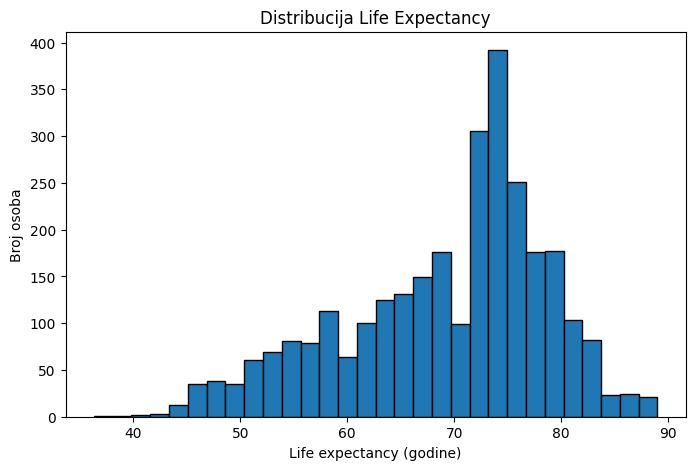

In [177]:
plt.figure(figsize=(8, 5))
plt.hist(dataframe["Life expectancy"], bins=30,edgecolor="black",linewidth=1)
plt.xlabel("Life expectancy (godine)")
plt.ylabel("Broj osoba")
plt.title("Distribucija Life Expectancy")
plt.show()

Vidimo da je raspodela "Life Expectancy" promenljive blago *Left Skewed* što nam generalno naznačava da je skroz okej da je zadržimo takvu kakva je, odnosno nije nam potreban bilo kakva transformacija nad promenljivom posebno zato što ne možemo videti ni izrazite outliere na grafiku.

<span style="color:green">Sada možemo krenuti u razmatranje nezavisnih promenljivih za koje, po opisu samih promenljivih smatramo da će imati veliki prediktivni faktor. </span>

### GDP

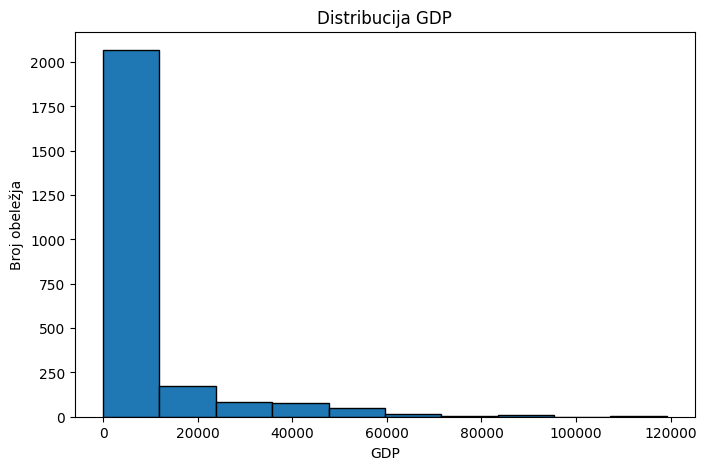

In [178]:
plt.figure(figsize=(8, 5))
plt.hist(dataframe['GDP'],edgecolor="black",linewidth=1)
plt.xlabel("GDP")
plt.ylabel("Broj obeležja")
plt.title("Distribucija GDP")
plt.show()

<span style="color:green"> Na prikazanom histogramu može se uočiti da distribucija GDP-a nije normalna, već je izraženo desno asimetrična (right skewed). </span>

<span style="color:green"> Najveći broj država nalazi se u opsegu nižih vrednosti GDP-a, dok se mali broj država pojavljuje u višim intervalima, što formira dug desni rep distribucije. Ovo nam naznačava da većina zemalja ima prilično nizak GDP, dok jako mali broj zemalja opisuju ekstremne vrednosti, koje u ovom kontekstu verovatno ne označavaju greške u podacima, već jako bogate države sa visokim GDP-om.
S obzirom da je raspodela jako desno asimetrična, veoma je smisleno primeniti logaritamsku transformaciju nad GDP, ali takodje je pametno i za svaki slučaj dodatno razmotriti ekstremne vrednosti. </span>

### HIV/AIDS

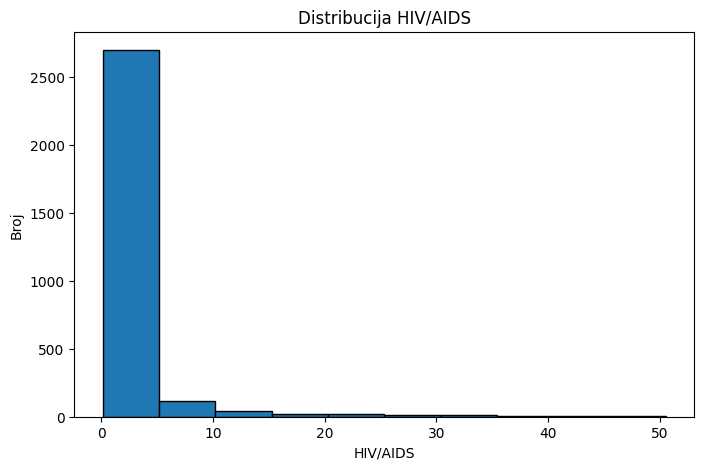

In [179]:
plt.figure(figsize=(8, 5))
plt.hist(dataframe['HIV/AIDS'],edgecolor="black",linewidth=1)
plt.xlabel("HIV/AIDS")
plt.ylabel("Broj")
plt.title("Distribucija HIV/AIDS")
plt.show()

<span style="color:green"> Histogram pokazuje izrazito desno asimetričnu (right skewed) distribuciju vrednosti HIV/AIDS stope. Većina posmatranih jedinica (država) ima veoma niske vrednosti, dok se mali broj nalazi u višim intervalima. Ovo naznačava da u najvećem broju zemalja bolest HIV nije zastupljena što nas dovodi do zaključka da sve zemlje sa visokim vrednostima HIV bi potencijalno mogle da imaju nizak `Life expectancy` s obzirom da, na osnovu domenskog znanja znamo da veliki broj nerazvijenih država pati od bolesti HIV. Ovim zaključkom možemo podupreti značaj promenljive `Status` koja može delimično potvrditi naš zaključak.
Pošto je desna asimetrija prisutna pri razmatranju raspodele, ponovo možemo zaključiti da bi logaritamska transformacija imala dosta smisla.  </span>


### BMI

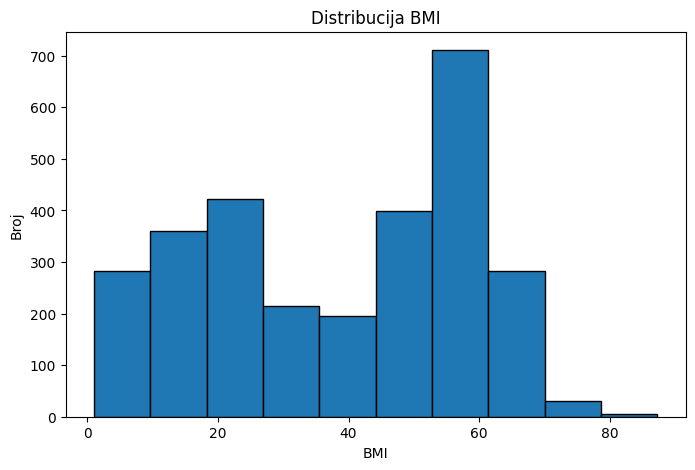

In [180]:
plt.figure(figsize=(8, 5))
plt.hist(dataframe['BMI'],edgecolor="black",linewidth=1)
plt.xlabel("BMI")
plt.ylabel("Broj")
plt.title("Distribucija BMI")
plt.show()

<span style="color:green"> Raspodela promenljive BMI deluje poprilično ravnomerno raspoređena gde je najveća koncentracija u srednjim intervalima. Ekstremne vrednosti čine malu količinu svih podataka gde je BMI vrlo visok ili vrlo nizak. S obzirom da ova promenljiva predstavlja **prosek na nivou države**, na osnovu domenskog znanja, raspoznajemo da BMI kao promenljiva poprilično nema smisla. Očekivani raspon BMI vrednosti na osnovu WHO klasifikacije su vrednosti :  </span>


- <span style="color:green"> < 18.5 - pothranjenost </span>
- <span style="color:green"> 18.5-24.9 - normalna težina </span>
- <span style="color:green"> 25-29.9 - prekomerena težina </span>
- <span style="color:green"> 30-34.9 - gojaznost tip I </span>
- <span style="color:green"> 35-39.9 - gojaznost tip II </span>
- <span style="color:green"> 40 > - ekstremna gojaznost </span>

<span style="color:green"> Na osnovu ovih vrednosti, možemo razmotriti da nije smisleno da prosek BMI-a ne može da bude veći od ~ 35 i to za ekstremne slučajeve.
S toga ova promenljiva nema smisla i neće ući u dalje razmatranje. </span>

### percentage expenditure

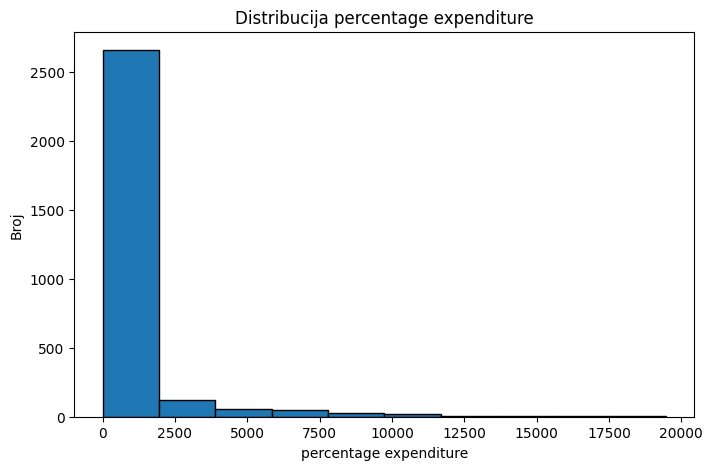

In [181]:
plt.figure(figsize=(8, 5))
plt.hist(dataframe['percentage expenditure'],edgecolor="black",linewidth=1)
plt.xlabel("percentage expenditure")
plt.ylabel("Broj")
plt.title("Distribucija percentage expenditure")
plt.show()

<span style="color:green"> Najveći broj posmatranih vrednosti koncentrisan je u nižim intervalima, dok mali broj država/godina ima ekstremno visoke vrednosti (do ~20 000). Pošto su prisutni izraženi ekstremni podaci, treba proveriti da li je realno da promenljiva uzima ovoliko visoke vrednosti, ne mora nužno da znači da su greške u podacima ako se radi o razvijenim državama koje dosta ulažu u zdravstvo, s toga je ponovo važno napomenuti značajnost `Status` promenljive. Pošto je vidna desna asimetrija (right skewed) možemo razmotriti primenu logaritamske transformacije nad promenljivom. </span>

### thinness 10-19 years

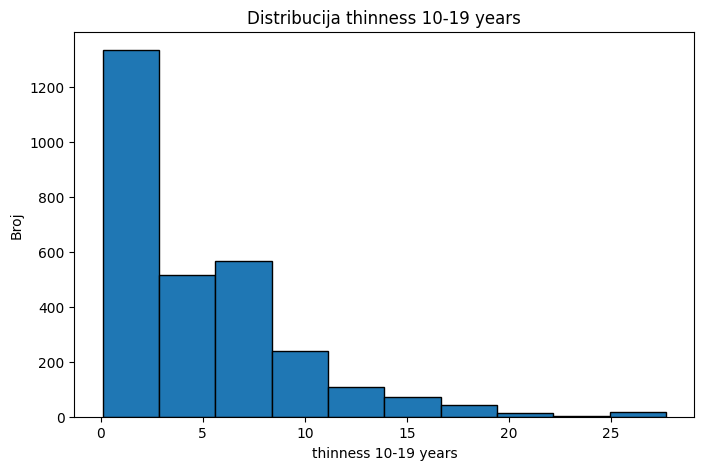

In [182]:
plt.figure(figsize=(8, 5))
plt.hist(dataframe['thinness 10-19 years'],edgecolor="black",linewidth=1)
plt.xlabel("thinness 10-19 years")
plt.ylabel("Broj")
plt.title("Distribucija thinness 10-19 years")
plt.show()

<span style="color:green"> Najveći broj posmatranih vrednosti koncentrisan je u nižem opsegu (otprilike 0–5%), dok manji broj država/godina ima znatno veće vrednosti, ali je kod ovog grafika prisutna malo više izražena distribucija za ostale bin-ove van prvog. Uočeno je da većina država ima nizak procenat pothranjenosti adolescenata sa prisutnim ekstremnim vrednostima iznad 20% (ne moraju nužno biti greške, mogu ukazati na ekstremno siromašne države). Radi dalje analize, pametno bi bilo primeniti logaritamsku transofrmaciju nad promenljivom, ali za dalje razmatranje predkitivne moći nam je potrebna bivarijantna analiza. </span>

## Bivarijantna analiza

<span style="color:green">  Bivarijantna analiza predstavlja ispitivanje odnosa između dve promenljive sa ciljem utvrđivanja postojanja, jačine i pravca njihove povezanosti. Ideja je da bivarijantnom analizom razumemo međusobne zavisnosti između varijabli. Ove zavisnosti opisujemo grafički korišćenjem tačkastih dijagrama (scatter plot), Pearson-ovog koeficijenta korelacije za merenje linearne povezanosti za koji dodatno možemo oformiti matricu i posmatrati ih medjusobno. Pearson-ovim koeficijentom korelacije razmatramo vrednosti na opsegu [-1,1], gde visoke negativne vrednosti (blizu -1) označavaju jaku negativnu povezanost, a visoke pozitivne vrednost (blizu 1) označavaju jaku pozitivnu povezanost promenljivih. Ovaj koeficijent pre svega označava statističku povezanost izmedju promenljvih. Pored koeficijenta korelacije, važno je uzeti u obzir i problem multikolinearnosti. </span>

### COUNTRY

Promenljiva `Country` predstavlja državu.
Sagledajmo sada od koliko jedinstvenih država se naš dataset sastoji.

In [183]:
uniques = dataframe["Country"].nunique()

print("Broj jedinstvenih država u datasetu :",uniques)

Broj jedinstvenih država u datasetu : 193


Pošto je broj jedinistvenih država velik, posmatraćemo vrednosti samo za 15 država.

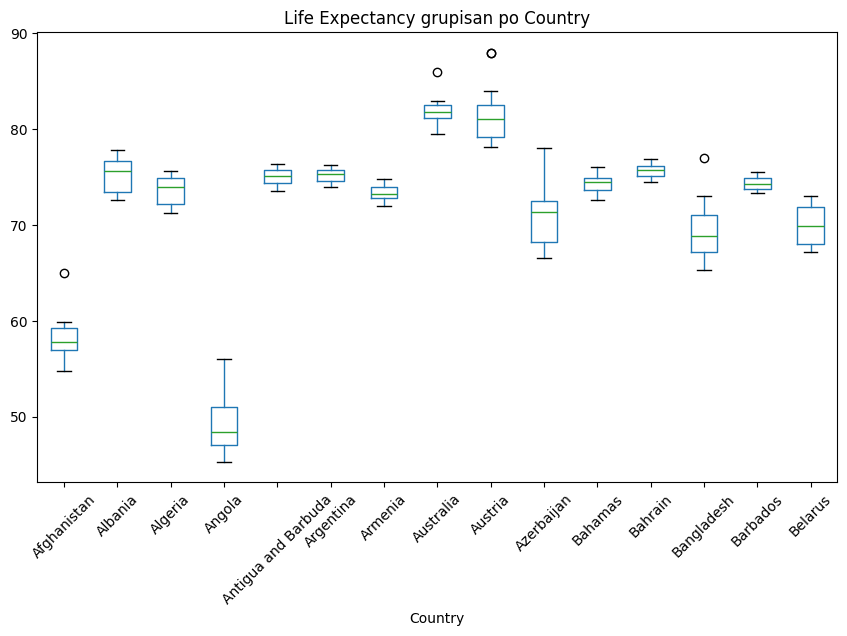

In [184]:
top_countries = dataframe["Country"].value_counts().head(15).index

dataframe[dataframe["Country"].isin(top_countries)].boxplot(
    column="Life expectancy",
    by="Country",
    figsize=(10, 6),
    rot=45
)

plt.title("Life Expectancy grupisan po Country")
plt.suptitle("")
plt.grid(False)
plt.show()

Ovim grafikom vidimo odnos `Life Expectancy` za svaku državu, odnosno podatke koliko je životno očekivanje za svaku zabeleženu godinu po državi. Na grafiku možemo uočiti i par vrednosti van "whiskers-a" što naznačava outlier vrednosti. U svakom slučaju promenljiva Country se ne čini kao pouzdani prediktor pošto ne postoji dovoljan broj zabeleženih godina za svaku državu, dodatno što je broj unikatnih država poprilično velik što može biti problem pri enkodiranju ove promenljive što bi proizvelo popriličnu kompleksnost modela.  

### YEAR

Promenljiva `Year` predstavlja godinu zapisa svih faktora jedne države. Kada bi postojalo dovoljno ovakvih zapisa mogli bismo i predvidjati Očekivani životni vek nacija za narednu godinu u poredjenju sa podacima prošlih godina.

Svakako prvo ćemo iscrtati boxplot grafik za `Year` i `Life Expectancy`. 

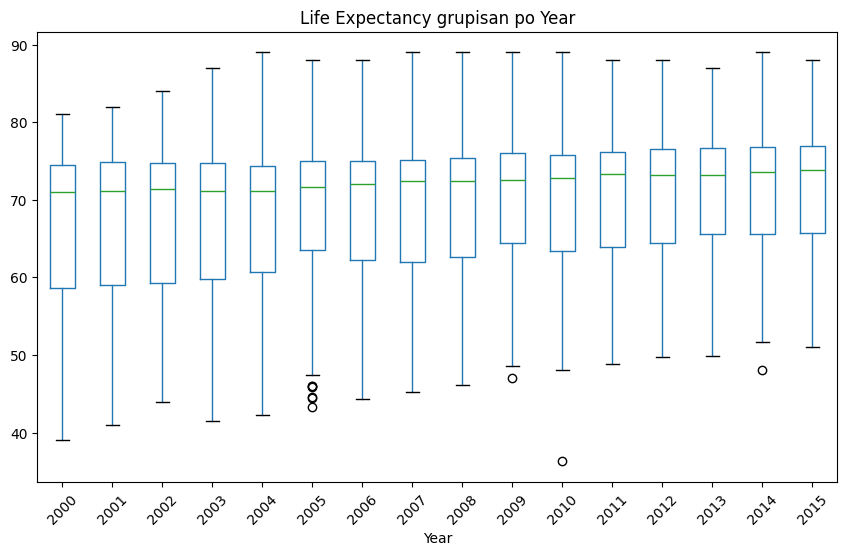

In [185]:
years = dataframe["Year"].value_counts().index

dataframe[dataframe["Year"].isin(years)].boxplot(
    column="Life expectancy",
    by="Year",
    figsize=(10, 6),
    rot=45
)

plt.title("Life Expectancy grupisan po Year")
plt.suptitle("")
plt.grid(False)
plt.show()

Sa grafika očigledno vidimo da imamo zapise za samo 16 godina, što nije dovoljno da za svaku državu predvidjamo životni vek zasebno, posebno bi bilo teško sprovesti ovo običnom linearnom regresijom. Posmatranjem 2005. vidimo da postoji više outlier-a, oni mogu biti naznaka nekog rata, epidemije, ili katastrofe u kojem je preminuo veći broj država nego uobičajeno. 

### Status

In [186]:
dataframe["Status"].unique()

array(['Developing', 'Developed'], dtype=object)

Promenljiva `Status` je kategorijska promenljiva i ima dve vrednosti "Developing" i "Developed". Na osnovu domenskog znanja, znamo da sve države koje su Razvijene ("Developed") imaju veći BDP po glavi stanovnika, bolje uslove za život, bolji zdravstveni sistem i pobudjenu svest o bitnosti zdravlja, u tom smislu ova promenljiva postavlja čistu granicu socio-ekonosmkih i razvojnih osobina država.
S toga ćemo sve dalje grafike predstavljati koristeći i ovu kategorijsku promenljivu.

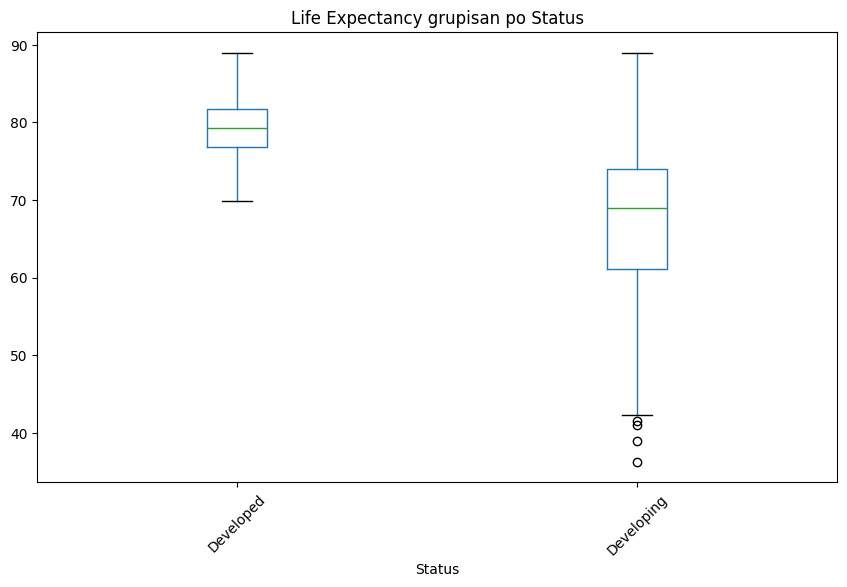

In [187]:
status = dataframe["Status"].value_counts().index

dataframe[dataframe["Status"].isin(status)].boxplot(
    column="Life expectancy",
    by="Status",
    figsize=(10, 6),
    rot=45
)

plt.title("Life Expectancy grupisan po Status")
plt.suptitle("")
plt.grid(False)
plt.show()

Grafik dokazuje da je naša pretpostavka na osnovu domenskog znanja tačna, te da su sve vrednosti boxplota za razvijene države uže grupisane oko gornjih vrednosti `Life expectency`-a sa većom prosečnom vrednošću u odnosu na nerazvijene države, s toga vidimo da `Status` zaista čini jak kategorijski razgranitelj za ciljnu promenljivu. 

### Adult Mortality

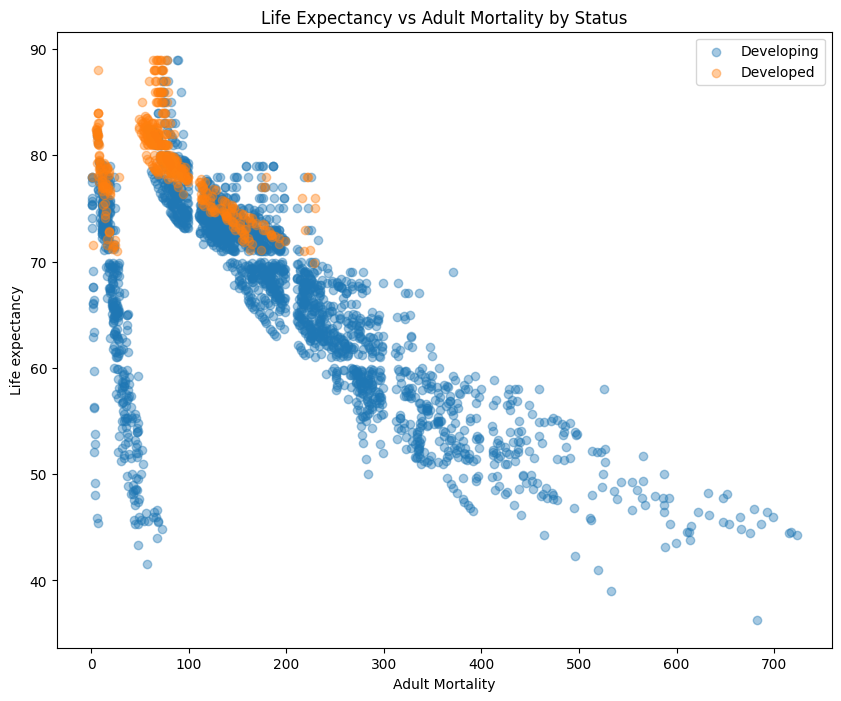

In [188]:
plt.figure(figsize=(10, 8))

for status in dataframe["Status"].unique():
    subset = dataframe[dataframe["Status"] == status]
    plt.scatter(
        subset["Adult Mortality"],
        subset["Life expectancy"],
        alpha=0.4,
        label=status
    )

plt.xlabel("Adult Mortality")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs Adult Mortality by Status")
plt.legend()
plt.show()

Promenljiva `Adult Mortality` predstavlja broj smrtnih slučajeva na 1000 stanovnika.
Odavde vidimo negativnu ali poprilično jaku povezanost Adult Mortality-a i Life Expectancy-a (što je Adult Mortality veci to je manji Life expectancy)
Uz to da nam outlier-i (donji desni podaci), ukazuju na trend koji je mozda izazvan epidemijom, ratovima, katastrofe itd.
Jasno možemo razgraničiti da "Developed" države se grupišu oko levog gornjeg ugla grafika što je očekivano i dodatno podstiče značajnost "Status" promenljive.
Iako se ova promenljiva čini kao dobar prediktor, ne smemo je koristiti u predikciji jer ona predstavlja "Data leakage", odnosno Adult Moratilty direktno opisuje Life Expectancy (`Adult Mortality` je praktično sadržan u promenljivoj `Life expectancy`) čime bi mogli da dostignemo nerealno visoke performanse modela ali time ne bi ostvarili prave prediktivne vrednosti u praksi.

### infant deaths

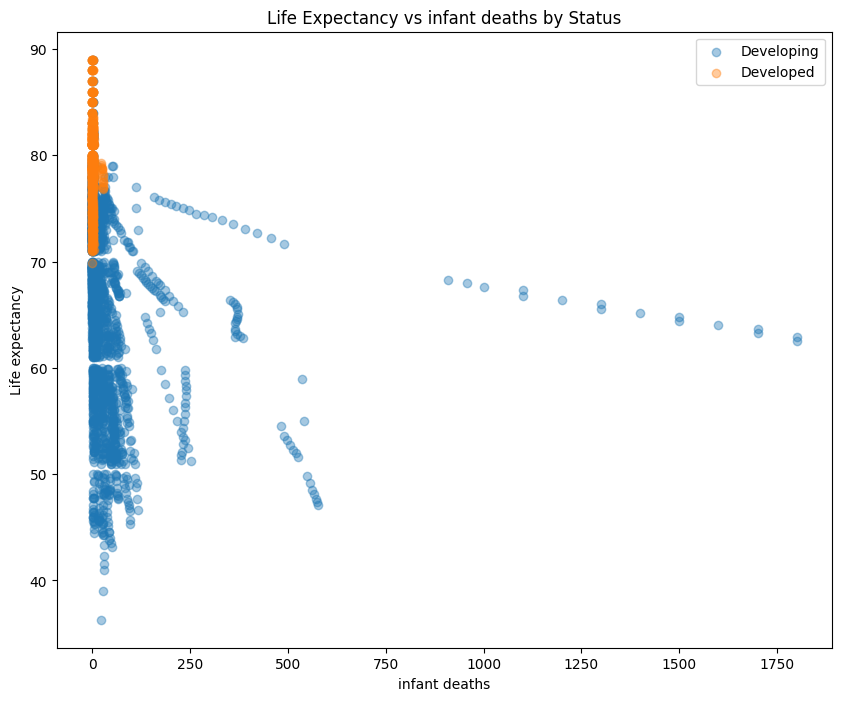

In [189]:
plt.figure(figsize=(10, 8))

for status in dataframe["Status"].unique():
    subset = dataframe[dataframe["Status"] == status]
    plt.scatter(
        subset["infant deaths"],
        subset["Life expectancy"],
        alpha=0.4,
        label=status
    )

plt.xlabel("infant deaths")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs infant deaths by Status")
plt.legend()
plt.show()

Promenljiva `infant deaths` pokazuje apsolutan broj infant deaths na 1000 stanovnika, pa trend od preko 1000 infant death sigurno predstavlja data error što je veoma smisleno s obzirom da znamo da je dosta podataka ovog dataseta scrapeovano sa interneta i dolaze sa različitih izvora.
Kao i u prethodnim razmatranjima, vidimo da promenljiva  `Status` dobro razgraničava očekivani životni vek. 
Možemo smatrati da je ova promenljiva jako ozbiljan indikator u odredjivanju životnog veka jedne populacije s obzirom da se za države sa velikim brojem smrti novorodjenčadi odlikuje jako loš zdravstveni sistem kao i svest o brizi novorodjene dece. Zaključivši ovo, ustanovićemo da sve države za koje `infant deaths` premašuje 200 ima jako mali `Life expectancy` što se očigledno i vidi sa grafika.
Kako bismo pravilno posmatrali raspodelu ove promenljive, postavićemo plafon vrednosti za infant deaths na 150 pri razmatranju.

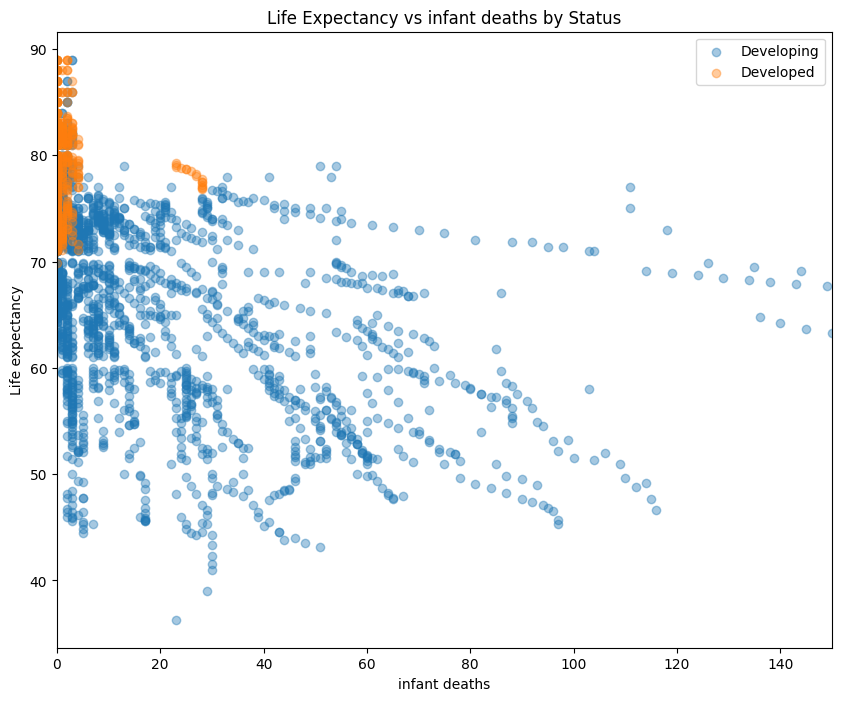

In [190]:
plt.figure(figsize=(10, 8))

for status in dataframe["Status"].unique():
    subset = dataframe[dataframe["Status"] == status]
    plt.scatter(
        subset["infant deaths"],
        subset["Life expectancy"],
        alpha=0.4,
        label=status
    )

plt.xlim(0,150)
plt.xlabel("infant deaths")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs infant deaths by Status")
plt.legend()
plt.show()

Posmatrajući ovako limitiran grafik, vidimo da je promenljiva `infant deaths` očigledno *right skewed* što nam pruža mogućnost da odradimo logaritamsku transformaciju nad podacima. Takodje jedna od opcija bi bila da razdvojimo ovu promenljivu na tri kategorije `low` , `medium` , `high`. Od posebnog značaja nam je transformacija nad ovom promenljivom kako bismo ublažili efekat outliera.

### ALCOHOL

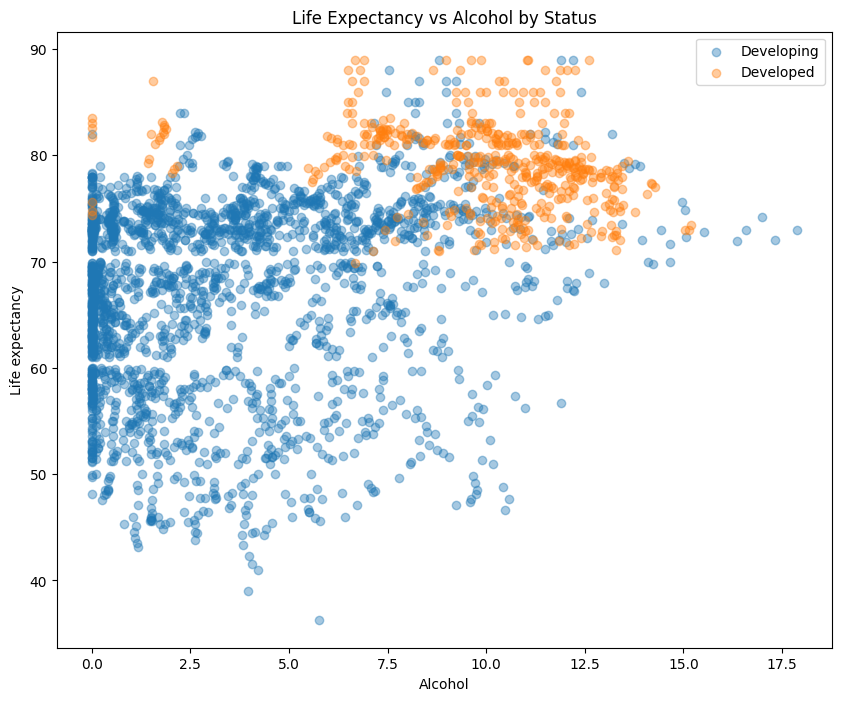

In [191]:
plt.figure(figsize=(10, 8))

for status in dataframe["Status"].unique():
    subset = dataframe[dataframe["Status"] == status]
    plt.scatter(
        subset["Alcohol"],
        subset["Life expectancy"],
        alpha=0.4,
        label=status
    )

plt.xlabel("Alcohol")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs Alcohol by Status")
plt.legend()
plt.show()

In [192]:
filtered_df_alcohol = (
    dataframe.loc[dataframe["Alcohol"] >= 15,
                  ["Country","Alcohol"]]
    .sort_values(by="Alcohol", ascending=False)
)
filtered_df_alcohol

Country  Alcohol
874     Estonia    17.87
228     Belarus    17.31
873     Estonia    16.99
875     Estonia    16.58
227     Belarus    16.35
876     Estonia    15.52
1523  Lithuania    15.19
1525  Lithuania    15.14
877     Estonia    15.07
872     Estonia    15.04
1524  Lithuania    15.04

Promenljiva `Alcohol` predstavlja konzumaciju alkohola na nivou glavnih gradova zabeleženih država.
Posmatrajući grafik ne vidimo jaku linearnu povezanost alkohola i Life expectancy-a, povezanost bi se mogla posmatrati u vidu logaritamske funkcije zbog desne asimetrije što nam naznačava da i ova promenljiva dolazi u obzir za logaritamsku transformaciju. Osmatrajući i države koje su imale konzumaciju sa više od 15 litara po glavi stanovnika, ovi podaci ne deluju kao outlieri pošto su ovo države istočne Evrope poznate po velikom konzumiranju alkohola.
Imamo i zemlje koje imaju veliku konzumaciju alkohola ali su pak razvijene, imaju dobru medicinu itd pa zbog toga zadrzavaju solidan life expectancy, sto nam ukazuje da je alkohol jasno povezan sa razvojem države, očekujemo da gradjani razvijene države imaju veću svest o načinu na koji konzumiraju alkohol (manje količine ali češće, pojedini i na dnevnom nivou).
Promenljiva svakako dolazi u obzir pri razmatranju `Life expectancy` promenljive s obzirom da se u paru sa promenljivom `Status` jasno vidi efekat na ciljnu promenljivu.

### PERCENTAGE EXPENDITURE

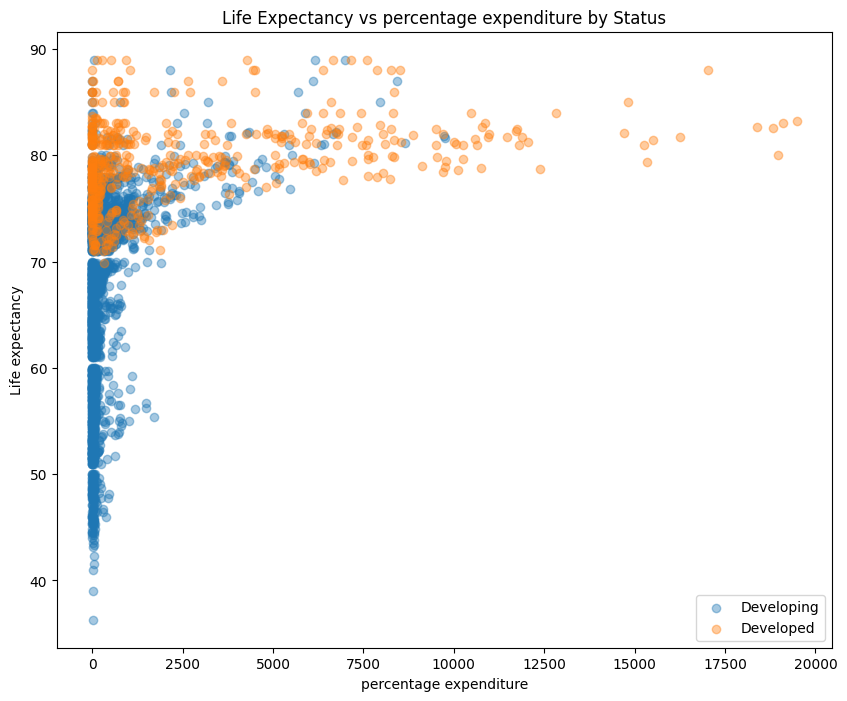

In [193]:
plt.figure(figsize=(10, 8))

for status in dataframe["Status"].unique():
    subset = dataframe[dataframe["Status"] == status]
    plt.scatter(
        subset["percentage expenditure"],
        subset["Life expectancy"],
        alpha=0.4,
        label=status
    )

plt.xlabel("percentage expenditure")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs percentage expenditure by Status")
plt.legend()
plt.show()

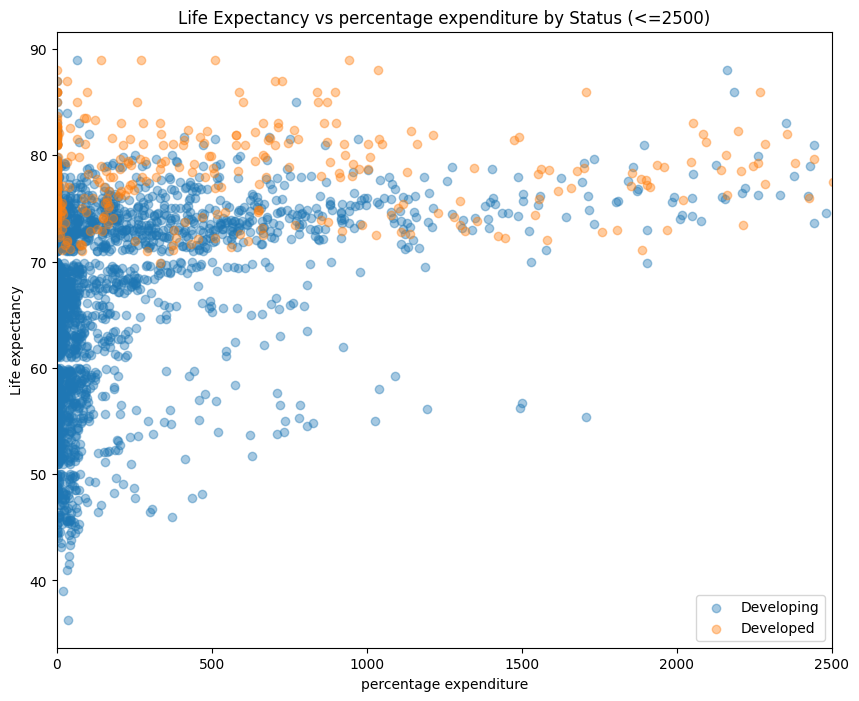

In [194]:
plt.figure(figsize=(10, 8))

for status in dataframe["Status"].unique():
    subset = dataframe[dataframe["Status"] == status]
    plt.scatter(
        subset["percentage expenditure"],
        subset["Life expectancy"],
        alpha=0.4,
        label=status
    )

plt.xlim(0,2500)
plt.xlabel("percentage expenditure")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs percentage expenditure by Status (<=2500)")
plt.legend()
plt.show()

Promenljiva `Percentage expenditure` predstavlja potrošnju na zdravstvo po glavi stanovnika, slutimo da je vrlo moguća multikolinearnost sa GDP s toga je jako bitno da pri *feature selection*-u proverimo VIF metrikom korelacije.
Jasno vidimo stub sa leve strane, koji ima raspodelu od minimuma do maksimuma za life expectancy, sto znaci da i drugi faktori jasno uticu na life expectancy ali ujedno da potrošnja za vrednosti do 2500 veoma jako utiče na life expectancy, dok otprilike preko 2500 dolazi do zasićenja, i ne vidimo rast u life expectancy-u.
Outlier-i nam ovde prerdstavlju life expectancy za koje je visok `Percentage expenditure` a `Life expecntacy` ima vrednosti <50 pošto je poprilično ispod prosečnog očekivanog životnog veka na globalnom nivou. Oni ne moraju nužno biti uklonjeni pošto možda ukazuju na realne situacije (rat, epidemija...)
Posmatranjem raspodele takodje vidimo da i ova promenljiva može biti pogodna za logaritamsku transformaciju, ali u slučaju da ona nije multikolinearna. 

### Hepatitis B

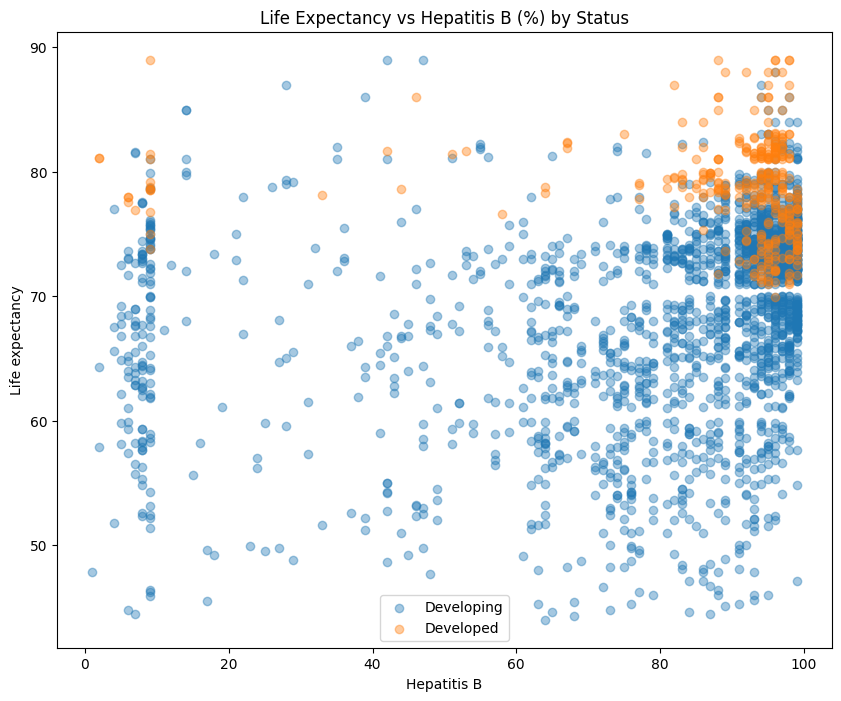

In [195]:
plt.figure(figsize=(10, 8))

for status in dataframe["Status"].unique():
    subset = dataframe[dataframe["Status"] == status]
    plt.scatter(
        subset["Hepatitis B"],
        subset["Life expectancy"],
        alpha=0.4,
        label=status
    )

plt.xlabel("Hepatitis B")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs Hepatitis B (%) by Status")
plt.legend()
plt.show()

Promenljiva `Hepatitis B` opisuje imunizaciju medju 1-godisnjom decom u procentima.
Postoji direktna povezanost sa life expectancy-om ali veza nije linerna (dosta tačaka sa visokom imunizacijom i `Life expectancy`-em), poprilicno je raspršena, može se upotrebiti kao kategorijska promenljiva ili je možemo spojiti sa ostalim promenljivama koje opisuju imunizacije neke bolesti stvorivši imunološki indeks.
Takodje imamo jasne high leverage point-ove (0-15%,95-100%), gde vrednosti 0-15% očekujemo da odlikuju siromašne države dok za države koje poseduju ove vrednosti ali da su pritom razvijene smatramo da predstavljaju informativne outliere, gde odredjeni primeri imaju mali `Life expectancy` iako imaju jak % imunizacije, što ukazuje na uticaj drugih faktora.

### MEASLES

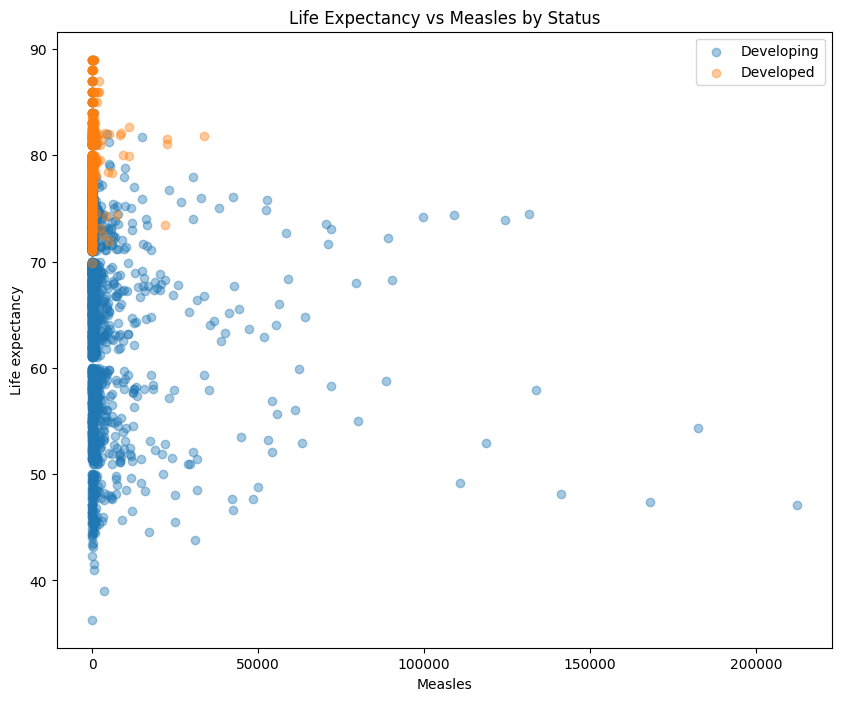

In [196]:
plt.figure(figsize=(10, 8))

for status in dataframe["Status"].unique():
    subset = dataframe[dataframe["Status"] == status]
    plt.scatter(
        subset["Measles"],
        subset["Life expectancy"],
        alpha=0.4,
        label=status
    )

plt.xlabel("Measles")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs Measles by Status")
plt.legend()
plt.show()

In [197]:
filtered_df_measles = (
    dataframe.loc[dataframe["Measles"] >= 100000,
                  ["Country","Measles"]]
    .sort_values(by="Measles", ascending=False)
)
filtered_df_measles

Country  Measles
1908                           Nigeria   212183
731   Democratic Republic of the Congo   182485
1907                           Nigeria   168107
1905                           Nigeria   141258
725   Democratic Republic of the Congo   133802
567                              China   131441
570                              China   124219
1575                            Malawi   118712
1903                           Nigeria   110927
568                              China   109023

Promenljiva `Measles` predstavlja broj prijavljenih slučajeva malih boginja na 1000 stanovnika.
Dosta podataka za Measles pivotira oko 0, što je normalan indikator pošto većina drzava nema prijavljen veliki broj slučajeva malih boginja, očigledno se ne može uočiti direktna linearna veza izmedju slučajeva malih boginja i life expectancy-a.
Ekstremni slučajevi (>100 000) ukazuju na epidemije malih boginja, ovi high leverage podaci su opravdano veliki za te države i godine ali ne mogu ukazati na znatno bolji životni standard koji samim tim utiče na `Life expectancy` jer epidemije malih boginja mogu biti prisutne u većini delova sveta.

### BMI

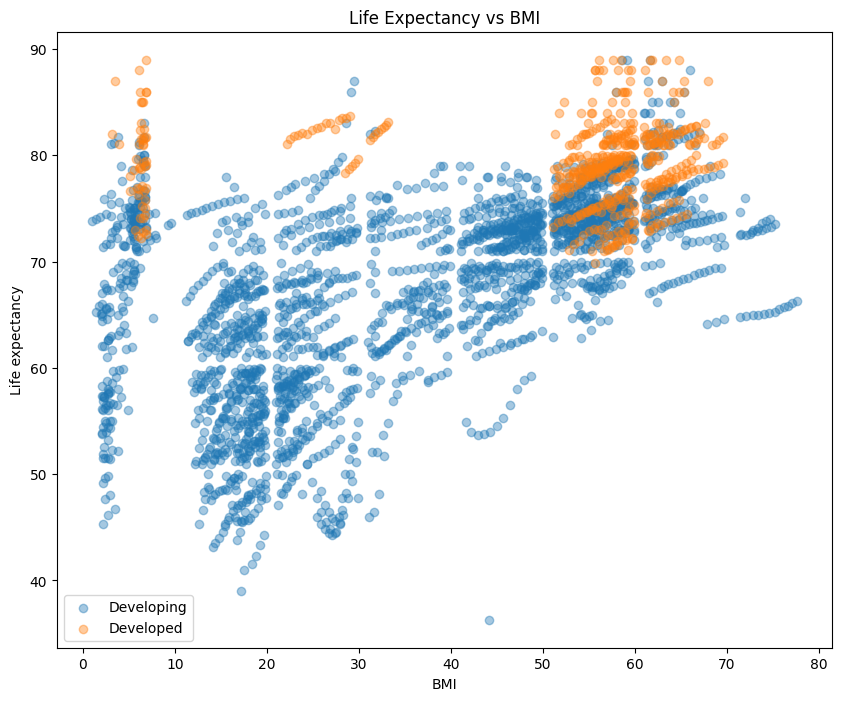

In [198]:
plt.figure(figsize=(10, 8))

for status in dataframe["Status"].unique():
    subset = dataframe[dataframe["Status"] == status]
    plt.scatter(
        subset["BMI"],
        subset["Life expectancy"],
        alpha=0.4,
        label=status
    )

plt.xlabel("BMI")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs BMI")
plt.legend()
plt.show()

Promenljiva `BMI` predstavlja indeks telesne mase i koristi se kako bi opisala gojaznost osoba. BMI možemo izračunati tako što podelimo težinu osobe u kilogramima sa kvadratom visine te osobe.
Može se uočiti solidna linearna veza `BMI` i `Life expectancy` ali je očigledno da dobar deo ovih podataka predstavlja data errore pošto se za dosta država odlikuje da njihove populacije imaju prosečan BMI od preko 40 što je nerealno s obzirom da države poput Nauru, Američke Samoe, Tokelau koje se smatraju za države sa najvećom vrednošću BMI imaju prosečan BMI od ~34. Ovakvi podaci na nivou države totalno nemaju smisla.
Najbolja odluka za ovaj feature bi bio dropping celog feature-a.

### under-five deaths

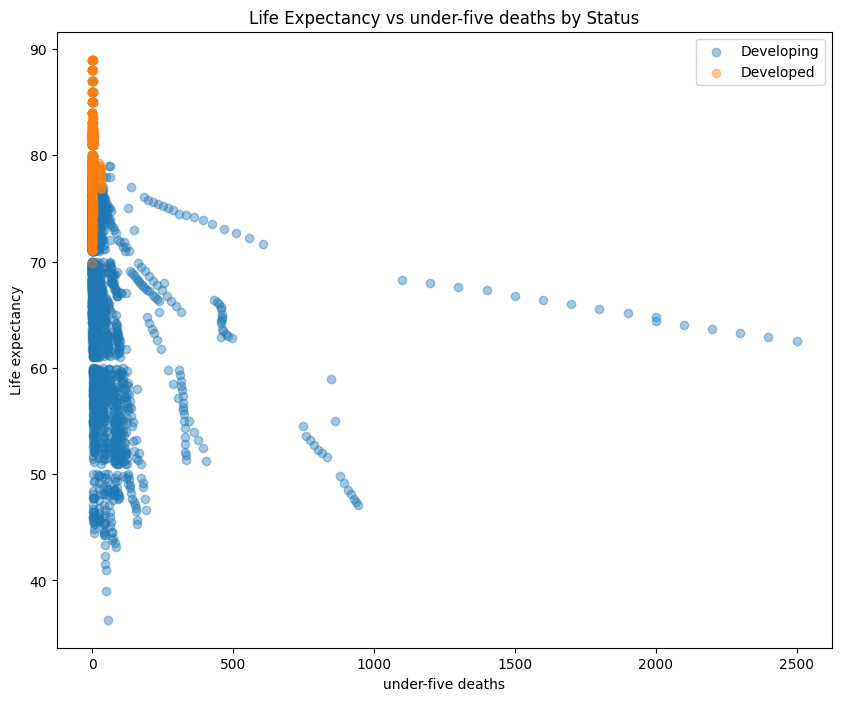

In [199]:
plt.figure(figsize=(10, 8))

for status in dataframe["Status"].unique():
    subset = dataframe[dataframe["Status"] == status]
    plt.scatter(
        subset["under-five deaths"],
        subset["Life expectancy"],
        alpha=0.4,
        label=status
    )

plt.xlabel("under-five deaths")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs under-five deaths by Status")
plt.legend()
plt.show()

Promenljiva `under-five deaths` predstavlja broj preminule dece uzrasta manjeg od 5 godina. Pošto već imamo promenljivu koja posmatra broj preminule novorodjenčadi, posmatrajući raspodele ove dve promenljive, zaključujemo da iziskuju praktično identične podatke, s toga nam je za odabir prediktora modela svejedno koju ćemo od te dve promenljive odabrati. 

### POLIO

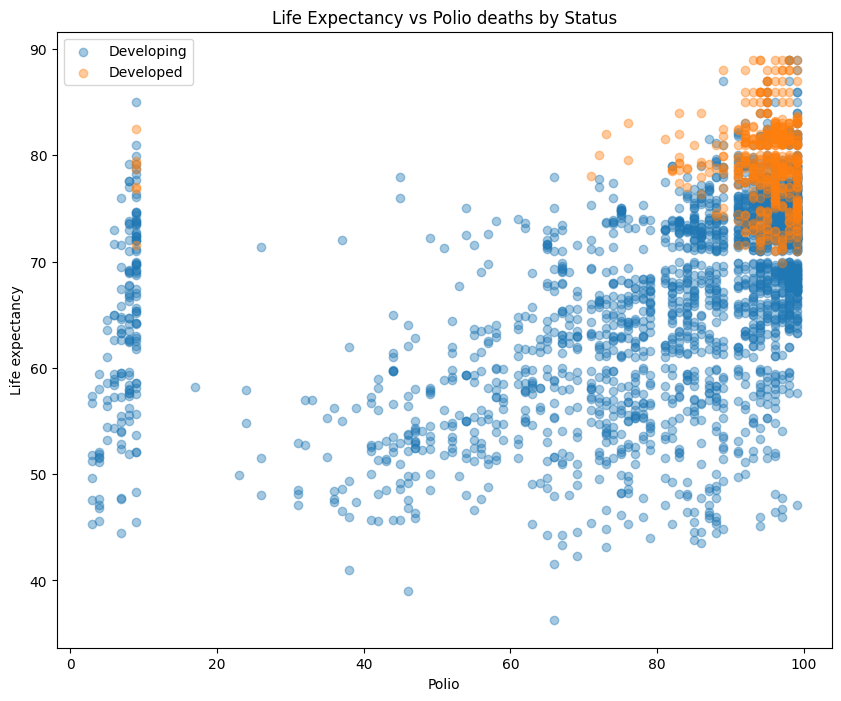

In [200]:
plt.figure(figsize=(10, 8))

for status in dataframe["Status"].unique():
    subset = dataframe[dataframe["Status"] == status]
    plt.scatter(
        subset["Polio"],
        subset["Life expectancy"],
        alpha=0.4,
        label=status
    )

plt.xlabel("Polio")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs Polio deaths by Status")
plt.legend()
plt.show()

Promenljiva `Polio` predstavlja procentualni broj vakcinisanih 1-godišnjaka.
Na osnovu raspodele možemo doći do praktično istih zapažanja kao za promenljivu `Hepatitis B`.
Pošto je ova promenljiva na istoj skali kao i promenljiva `Hepatitis B` možemo je kombinovati kako bismo napravili imunizacioni index države.  

### TOTAL EXPENDITURE

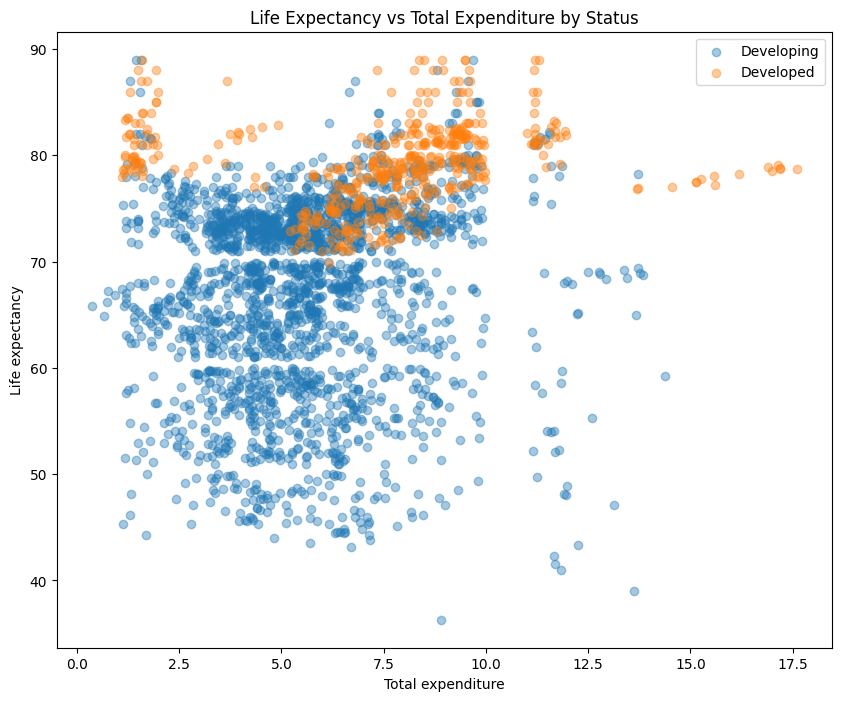

In [201]:
plt.figure(figsize=(10, 8))

for status in dataframe["Status"].unique():
    subset = dataframe[dataframe["Status"] == status]
    plt.scatter(
        subset["Total expenditure"],
        subset["Life expectancy"],
        alpha=0.4,
        label=status
    )

plt.xlabel("Total expenditure")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs Total Expenditure by Status")
plt.legend()
plt.show()

`Total expenditure` predstavlja ukupnu potrošnju države na zdravstvo u procentima.
Total expenditure ima jako rasutu distribuciju, i sam po sebi je vrlo loš feature, ima prisutne i high leverage  pointove koji ne uticu na `Life expectancy`.
Generalno rečeno, ova promenljiva nema nikakvu prediktivnu moć za rešavanje problema.

### DIPTHTHERIA

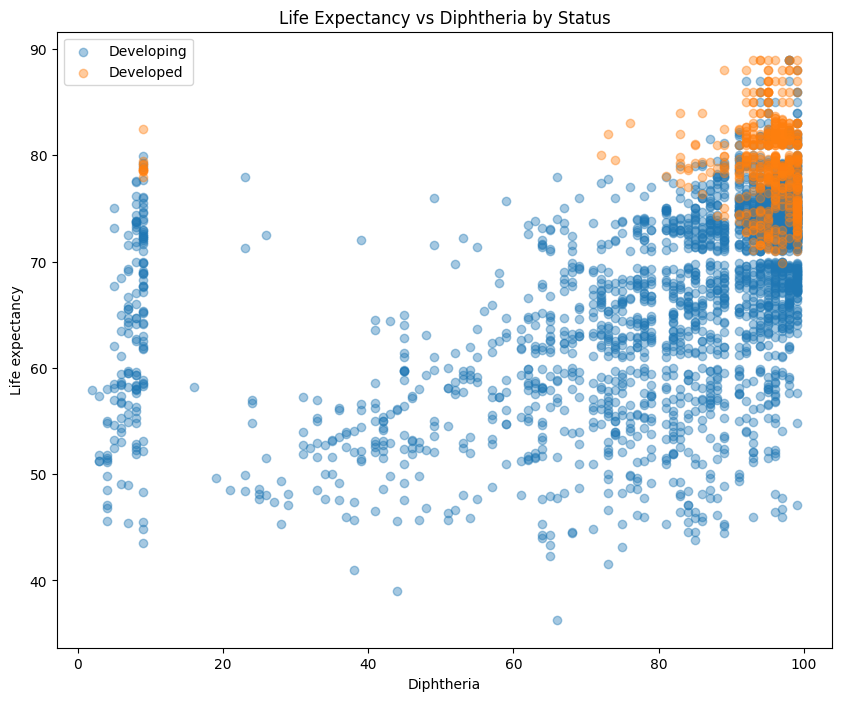

In [202]:
plt.figure(figsize=(10, 8))

for status in dataframe["Status"].unique():
    subset = dataframe[dataframe["Status"] == status]
    plt.scatter(
        subset["Diphtheria"],
        subset["Life expectancy"],
        alpha=0.4,
        label=status
    )

plt.xlabel("Diphtheria")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs Diphtheria by Status")
plt.legend()
plt.show()

Promenljiva `Diphtheria` predstavlja procentualni broj vakcinisanih 1-godišnjaka. Dolazimo do istih zaključaka kao i za ostale imunološke promenljive (`Hepatitis B` i `Polio`).

### HIV/AIDS

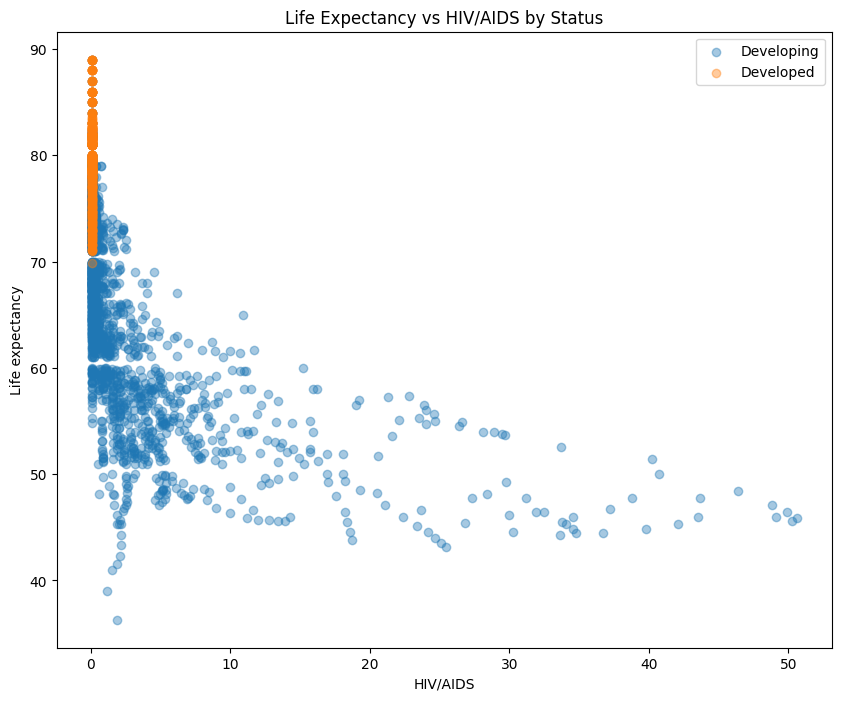

In [203]:
plt.figure(figsize=(10, 8))

for status in dataframe["Status"].unique():
    subset = dataframe[dataframe["Status"] == status]
    plt.scatter(
        subset["HIV/AIDS"],
        subset["Life expectancy"],
        alpha=0.4,
        label=status
    )

plt.xlabel("HIV/AIDS")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs HIV/AIDS by Status")
plt.legend()
plt.show()

Promenljiva `HIV/AIDS` predstavlja broj umrle dece od ove bolesti uzrasta 0-4 godine.
Posmatrajući grafik odmah uočavamo solidnu negativnu korelaciju u odnosu na ciljnu promenljivu, takodje posmatrajući razvijene države možemo uočiti da razvijene države u potpunosti nemaju niti slute na mogućnost epidemije HIV-a što naznačava da je HIV u potpunosti karakteristika razvijenosti zdravstvenog sistema jedne države. Takodje jasno možemo videti da za sve države koje imaju više od 1% polako ali sigurno očekivani životni vek opada.
Ovakva zapažanja direktno pokazuju koliko veliku rolu u proceni očekivanog životnog veka mogu imati bolesti, pošto su one najčešće i reprezentativni faktor zdravstvenog sistema jedne države.

### GDP

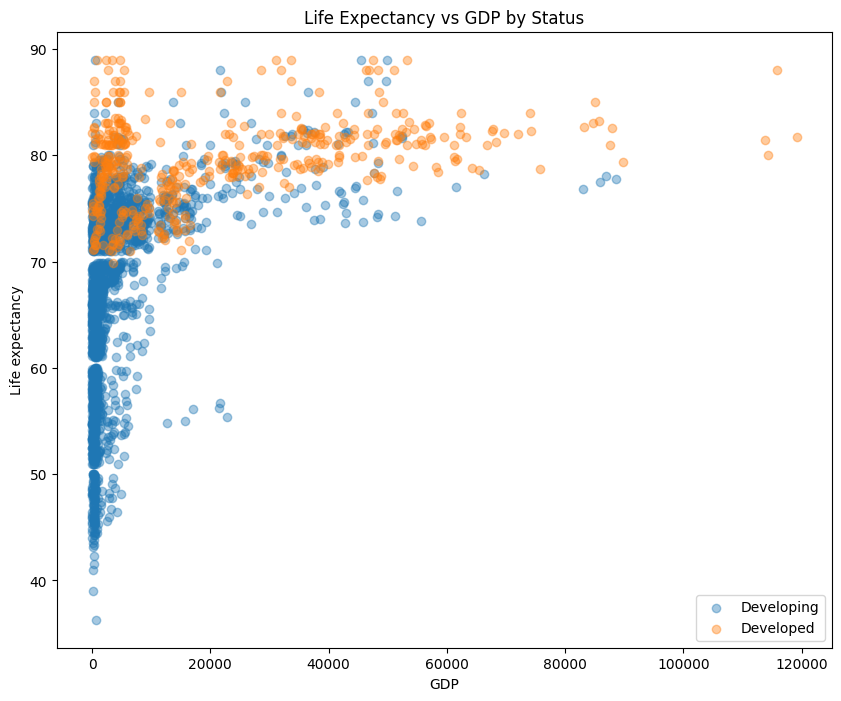

In [204]:
plt.figure(figsize=(10, 8))

for status in dataframe["Status"].unique():
    subset = dataframe[dataframe["Status"] == status]
    plt.scatter(
        subset["GDP"],
        subset["Life expectancy"],
        alpha=0.4,
        label=status
    )

plt.xlabel("GDP")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs GDP by Status")
plt.legend()
plt.show()

`GDP` (*BDP - Bruto domaći proizvod*) predstavlja ukupno stvoren domaći dohodak jedne države.
Pošto odmah uočavamo jako desno asimetrčnost podataka, radi boljeg razmatranja odmah iscrtavamo ovaj grafik na logaritamskoj skali.

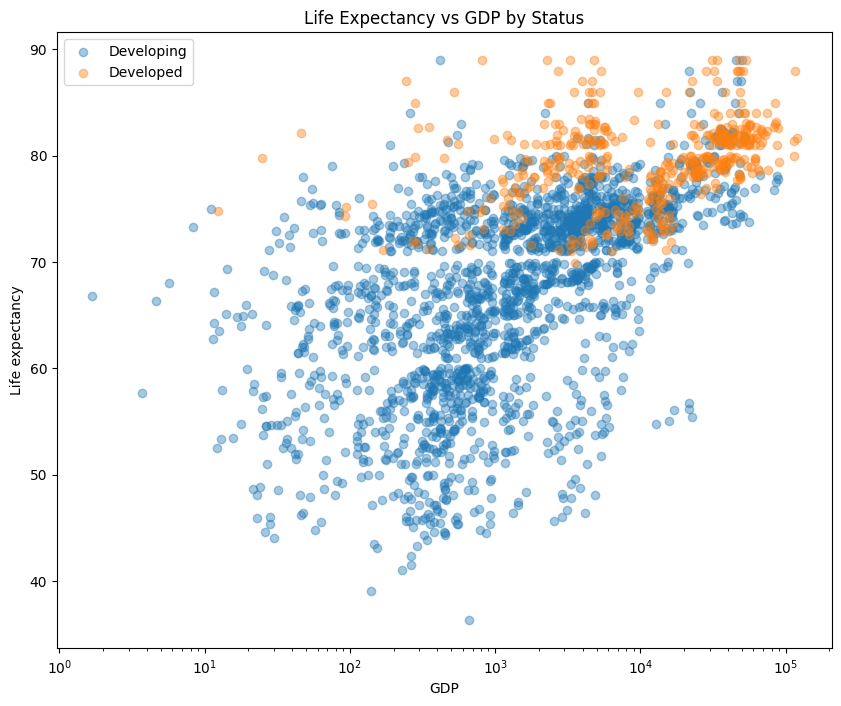

In [205]:
plt.figure(figsize=(10, 8))

for status in dataframe["Status"].unique():
    subset = dataframe[dataframe["Status"] == status]
    plt.scatter(
        subset["GDP"],
        subset["Life expectancy"],
        alpha=0.4,
        label=status
    )

plt.xscale("log")
plt.xlabel("GDP")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs GDP by Status")
plt.legend()
plt.show()

Na grafiku je prisutan klaster u gornjem desnom uglu koji odlikuju razvijene države, što jasno naznačava povezanost sa promenljivom `Life expectancy`. Iako su podaci za nerazvijene države rasuti svuda po grafiku, uočljiva je pozitivna korelacija s toga u ovoj promenljivoj leži potencijalna predikstorska moć. U svakom slučaju preko grafika je odlikovano da razvijene države imaju veći iznos GDP-a, što najčešće naznačava i posvećenost i brizi stanovništva države kroz njen zdravstveni sistem, s toga možemo reći da iako je GDP ekonomski aspekt jedne države, on se zasigurno indirektno odražava i na medicinski aspekt države. Pored toga možemo smatrati da se povećanjem GDP-a povećava i kvalitet infrastrukture jedne države (ekološki pristup, čist vazduh, sanitacija).  

In [206]:
filtered_df_GDP = (
    dataframe.loc[dataframe["GDP"] >= 60000,
                  ["Country","GDP"]]
    .sort_values(by="GDP", ascending=False)
)
filtered_df_GDP

Country           GDP
1539   Luxembourg  119172.74180
1542   Luxembourg  115761.57700
1545   Luxembourg  114293.84330
1540   Luxembourg  113751.85000
1547   Luxembourg   89739.71170
2074        Qatar   88564.82298
2525  Switzerland   87998.44468
1915       Norway   87646.75346
2072        Qatar   86852.71190
2075        Qatar   85948.74600
2522  Switzerland   85814.58857
1918       Norway   85128.65759
2523  Switzerland   84658.88768
2524  Switzerland   83164.38795
2078        Qatar   82967.37228
1549   Luxembourg   75716.35180
2526  Switzerland   74276.71842
1919       Norway   74114.69715
2528  Switzerland   72119.56870
2527  Switzerland   69672.47100
1178      Iceland   68348.31817
114     Australia   67792.33860
115     Australia   67677.63477
1920       Norway   66775.39440
2071        Qatar   66346.52267
1550   Luxembourg   65445.88530
744       Denmark   64322.66640
2529  Switzerland   63223.46778
738       Denmark   62425.53920
116     Australia   62245.12900
113     Australia   62214.69120
741       Denmark   61753.66700
2077        Qatar   61478.23813
1258      Ireland   61388.17457
1257      Ireland   61235.41500
739       Denmark   61191.19263

Posmatranjem GDP-a koji je veći od 60 000, vidimo da ove tačke iako jesu influental points, ne predstavljaju netačne podatke, pošto je GDP za Luxemburg i stvarno toliko visok.
U moru ovih niskih podataka za GDP smo sigurni da postoje data error-i u levom stubu, ali je prirodno da za većinu država bude < 15000 .
Dolazimo do zaključka da će GDP uz Status igrati veliku ulogu u prediktivnom modelu.

### POPULATION

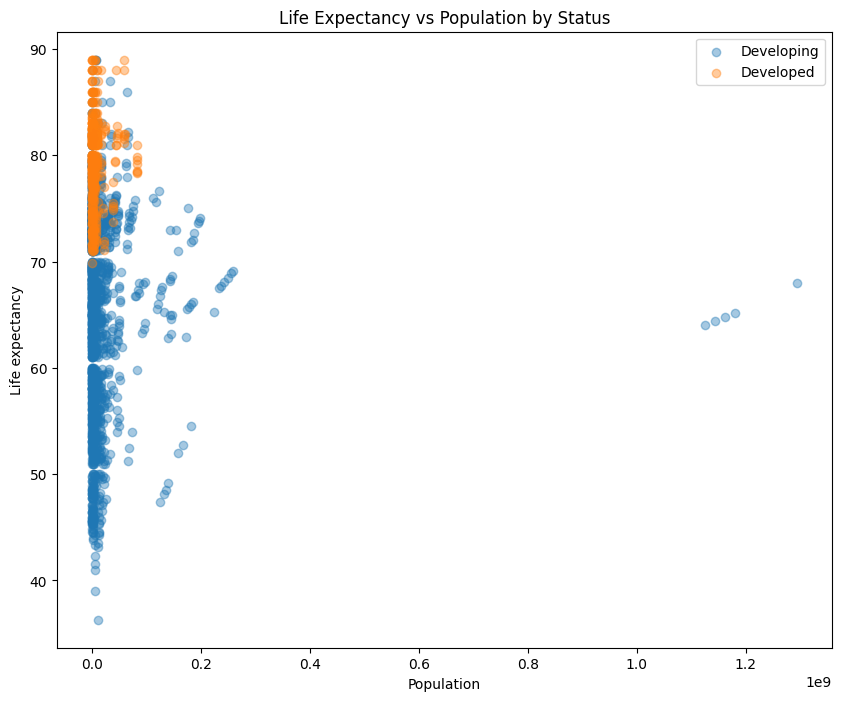

In [207]:
plt.figure(figsize=(10, 8))

for status in dataframe["Status"].unique():
    subset = dataframe[dataframe["Status"] == status]
    plt.scatter(
        subset["Population"],
        subset["Life expectancy"],
        alpha=0.4,
        label=status
    )

plt.xlabel("Population")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs Population by Status")
plt.legend()
plt.show()

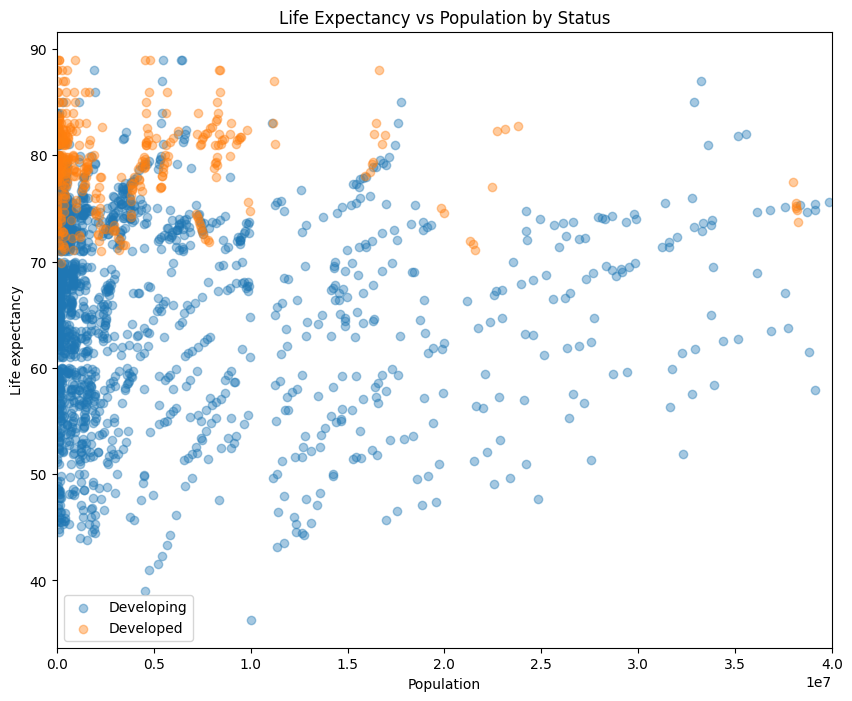

In [208]:
plt.figure(figsize=(10, 8))

for status in dataframe["Status"].unique():
    subset = dataframe[dataframe["Status"] == status]
    plt.scatter(
        subset["Population"],
        subset["Life expectancy"],
        alpha=0.4,
        label=status
    )

plt.xlim(0,40000000)
plt.xlabel("Population")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs Population by Status")
plt.legend()
plt.show()

In [209]:
filtered_df_population = (
    dataframe.loc[dataframe["Population"] >= 1000000000, 
                  ["Country", "Population"]]
    .sort_values(by="Population", ascending=False)
)
filtered_df_population

Country    Population
1187   India  1.293859e+09
1194   India  1.179681e+09
1195   India  1.161978e+09
1196   India  1.144119e+09
1197   India  1.126136e+09

In [210]:
filtered_df_china = dataframe.loc[
    dataframe["Country"] == "China",
    ["Country", "Population"]
]
filtered_df_china

Country  Population
560   China    137122.0
561   China    136427.0
562   China    135738.0
563   China    135695.0
564   China    134413.0
565   China    133775.0
566   China    133126.0
567   China   1324655.0
568   China   1317885.0
569   China     13112.0
570   China     13372.0
571   China    129675.0
572   China     12884.0
573   China      1284.0
574   China    127185.0
575   China   1262645.0

Promenljiva `Population` predstavlja broj stanovnika jedne države. 
Population očigledno nema linearne povezanosti sa  `Life expectancy` s toga nećemo preći u šire razmatranje ove promenljive. Podaci od preko 1 milijarde su ocekivani za državu poput Indije, ali i za državu poput Kine, sto je dodatna nelogičnost, ako posmatramo podatke za Kinu, vidimo da su očigledno netacni.
Mimo toga, ne možemo zaključiti nikakvu korelisanost sa `Life expectancy`.

### thinness 1-19 years

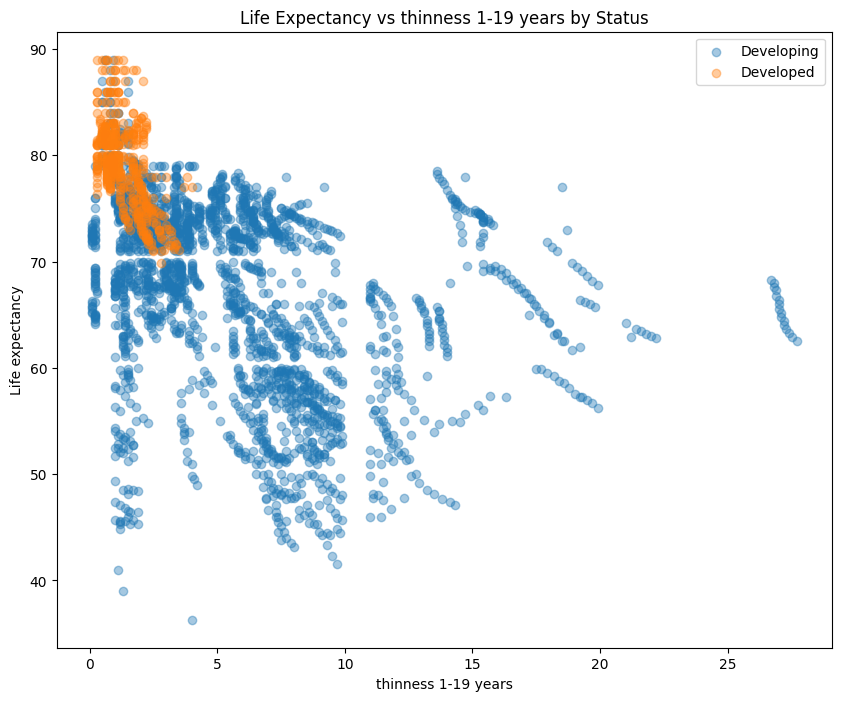

In [211]:
plt.figure(figsize=(10, 8))

for status in dataframe["Status"].unique():
    subset = dataframe[dataframe["Status"] == status]
    plt.scatter(
        subset["thinness 10-19 years"],
        subset["Life expectancy"],
        alpha=0.4,
        label=status
    )

plt.xlabel("thinness 1-19 years")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs thinness 1-19 years by Status")
plt.legend()
plt.show()

Promenljiva `thinness 1-19 years` opisuje učestalost mršavosti medju decom i adolescentima izmedju 10 i 19 godina u procentima (greška u imenovanju kolone pošto nije 1-19 već 10-19) što nam označava BMI koji je ispod referentnih vrednosti, odnosno nedostatak nutritivnih vrednosti u ishrani dece.
Može se uociti umerena negativna linearna povezanost sa `Life expectancy`, sve klastere koji formiraju liniju možemo videti kao entry-je za zasebne drzave, koje prate odredjeni trend neuhranjenosti.
Svakako je pristuno da je `Life expectancy` visok za vrednosti koje su blizu 0, ali vertikalni stub koji se javlja svuda naznacava uticaj drugih socio-ekonomskih faktora koji utiču na očekivani životni vek populacije. Ujedno uočavamo da je raspodela jako slična sa `infant deaths` i `under-five deaths`. Takodje je jako uočljiv klaster koji formiraju razvijene države s toga ponovno daju potporu značajnosti `Status`-a. 

### THINNESS 5-9 YEARS

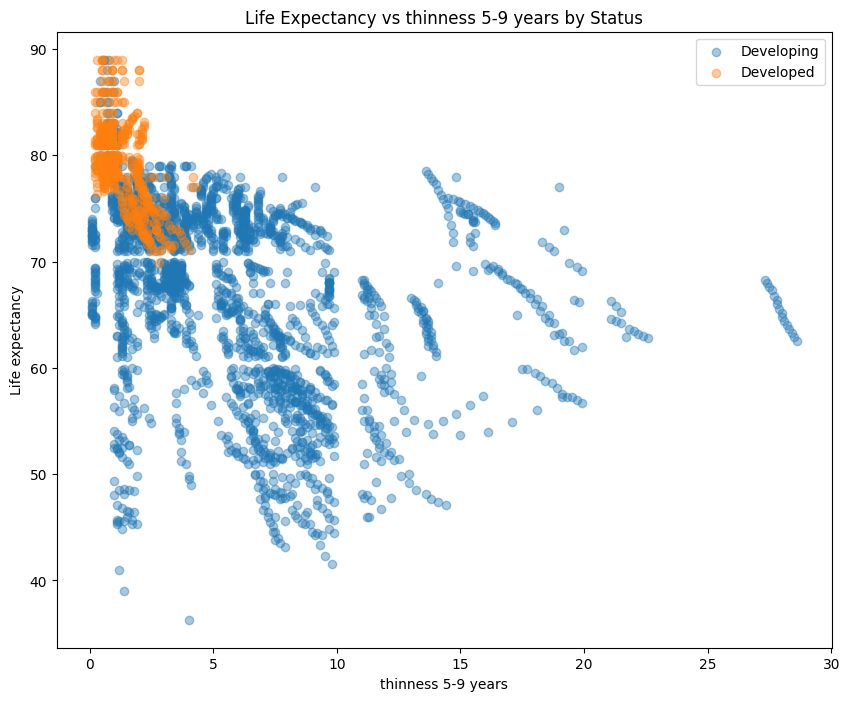

In [212]:
plt.figure(figsize=(10, 8))

for status in dataframe["Status"].unique():
    subset = dataframe[dataframe["Status"] == status]
    plt.scatter(
        subset["thinness 5-9 years"],
        subset["Life expectancy"],
        alpha=0.4,
        label=status
    )

plt.xlabel("thinness 5-9 years")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs thinness 5-9 years by Status")
plt.legend()
plt.show()

Promenljiva `thinness 5-9 years` opisuje isti pojam kao i `thinness 1-19 years` (odnosno 10-19) samo je sada posmatran opseg dece starosti 5-9 godina. Prirodno je da uporedimo grafik ove promenljive sa grafikom pomenute promenljive gde dolazimo do zaključka da su raspodele ove dve promenljive praktično identične, s toga je dovoljno da uzmemo bilo koju od ove dve promenljive kao prediktor našeg modela. Posebno je važno da ne odaberemo obe promenljive za naš model kako bismo izbegli multikolinearnost. 

### INCOME COMPOSITION OF RESOURCES

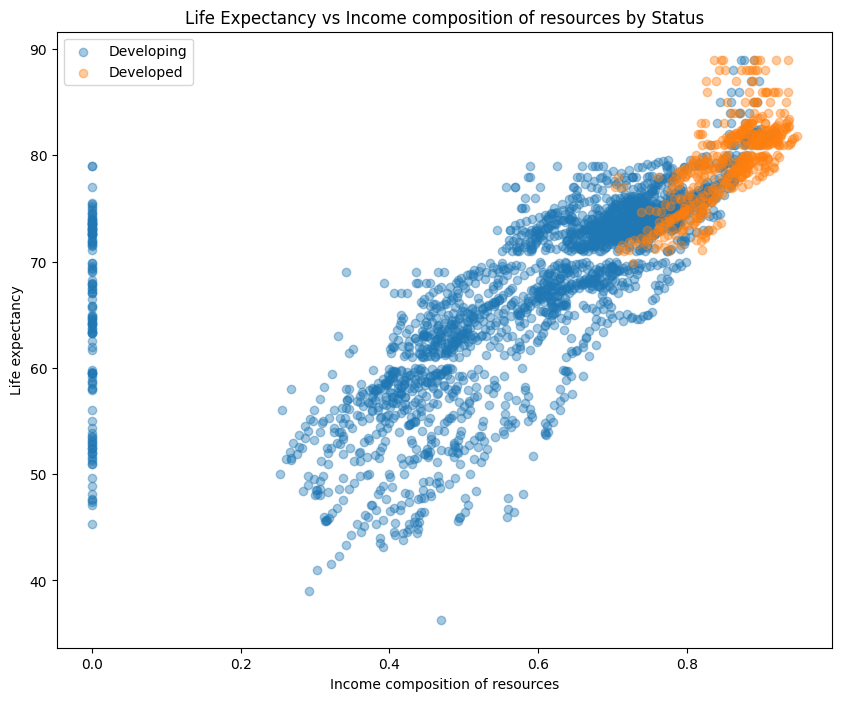

In [213]:
plt.figure(figsize=(10, 8))

for status in dataframe["Status"].unique():
    subset = dataframe[dataframe["Status"] == status]
    plt.scatter(
        subset["Income composition of resources"],
        subset["Life expectancy"],
        alpha=0.4,
        label=status
    )

plt.xlabel("Income composition of resources")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs Income composition of resources by Status")
plt.legend()
plt.show()

In [214]:
df_filtered_icr = (
    dataframe.loc[dataframe["Income composition of resources"] < 0.1,
                  ["Country","Income composition of resources"]]
    .sort_values(by="Income composition of resources", ascending=False)
    
)
df_filtered_icr

Country  Income composition of resources
74    Antigua and Barbuda                              0.0
75    Antigua and Barbuda                              0.0
76    Antigua and Barbuda                              0.0
77    Antigua and Barbuda                              0.0
78    Antigua and Barbuda                              0.0
...                   ...                              ...
2853              Vanuatu                              0.0
2854              Vanuatu                              0.0
2855              Vanuatu                              0.0
2856              Vanuatu                              0.0
2857              Vanuatu                              0.0

[130 rows x 2 columns]

Promenljiva `Income composition of resources` opisuje razvoj zasnovan na prihodima po stanovniku, koji je normalizovan izmedju 0 i 1.
Za data entry-e gde je ova vrednost = 0.0 na osnovu domenskog znanja, dolazimo do zaključka da ove vrednosti opisuju jako slabo razvijene države koje su u potpunoj stagnaciji i ne postoji nikakva naznaka progresa koja bi samim tim mogla da navede i na povećanje očekivanog životnog veka.
Mimo toga, vidimo jasnu i jaku pozitivnu povezanost ove promenljive sa Life expectancty-jem, gde high leverage pointovi dostižu čak i ~ 90 godina i to posebno za razvijene države.
Ova promenljiva deluje kao siguran kandidat za feature selection.

### SCHOOLING

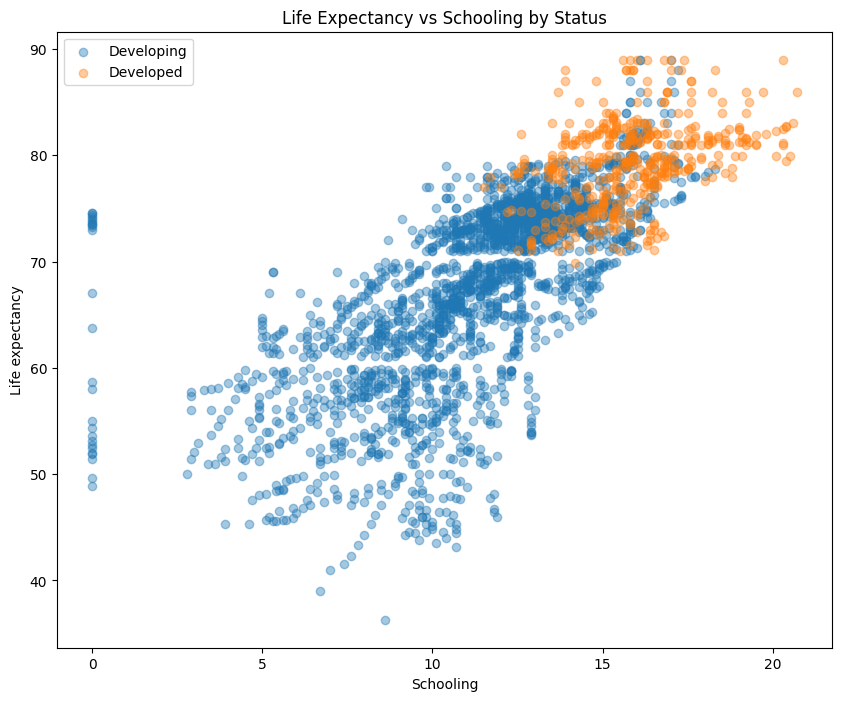

In [215]:
plt.figure(figsize=(10, 8))

for status in dataframe["Status"].unique():
    subset = dataframe[dataframe["Status"] == status]
    plt.scatter(
        subset["Schooling"],
        subset["Life expectancy"],
        alpha=0.4,
        label=status
    )

plt.xlabel("Schooling")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs Schooling by Status")
plt.legend()
plt.show()

Promenljiva `Schooling` predstavlja prosek godina školovanja jedne države. U poredjenju sa `Income composition of resources` raspodele su praktično identične, i sagledanjem obe promenljive dolazimo do zaključka da su one ozbiljan kandidat za multikolinearnost, pošto nivo školovanja direktno utiče na svest gradjana jedne države a samim tim i na to u šta treba ulagati novac, odupiranje korupciji i slično.
Uočavamo prisutnost granice od 10 godina, iznad koje je očekivani životni vek jako visok, poduprene time da su većina takvih država razvijene. 
S toga ćemo posmatrati samo `Schooling` pošto iako u suštini opisuju različite pojmove, one su usko povezane.

# Statisticki testovi

<div style="color: #2e7d32;">

## Statistički testovi u bivarijantnoj analizi

Nakon vizuelne analize odnosa između promenljivih, primenjeni su odgovarajući statistički testovi kako bi se formalnije procenila jačina i značaj uočenih trendova. Za odnos između numeričkih promenljivih i promenljive **Life expectancy** korišćena je **Spearman-ova korelacija**, dok je za poređenje očekivanog životnog veka između razvijenih zemalja i zemalja u razvoju primenjen **Mann–Whitney**. Dodatno, kako bi se ispitao opšti trend kroz vreme, analizirana je povezanost između promenljivih **Year** i **Life expectancy**.

</div>

<div style="color: #2e7d32;">

<h3 style="margin-top: 0; margin-bottom: 8px;">Spearman-ova korelacija</h3>

<p>
<b>Spearman-ova korelacija</b> korišćena je za procenu <b>jačine</b> i <b>smera povezanosti</b> između numeričkih promenljivih i očekivanog životnog veka.
</p>

<p>
Koeficijent korelacije, označen sa <b>ρ</b>, može imati vrednosti od <b>-1 do 1</b>.
</p>

<ul style="margin-top: 6px; margin-bottom: 10px;">
  <li><b>ρ &lt; 0</b> ukazuje na negativnu povezanost, odnosno da sa porastom jedne promenljive druga uglavnom opada.</li>
  <li><b>ρ &gt; 0</b> ukazuje na pozitivnu povezanost, odnosno da obe promenljive uglavnom rastu zajedno.</li>
  <li>Što je <b>apsolutna vrednost |ρ| veća</b>, povezanost je jača.</li>
</ul>

<p>
Ovaj test je posebno pogodan kada podaci sadrže <b>asimetriju</b>, <b>ekstremne vrednosti</b> ili kada odnos između promenljivih nije strogo linearan.
</p>

<p>
<b>Nulta hipoteza (H0):</b> ne postoji statistički značajna povezanost između posmatrane promenljive i očekivanog životnog veka.
</p>

<p style="margin-bottom: 0;">
<b>Alternativna hipoteza (H1):</b> postoji statistički značajna povezanost između posmatrane promenljive i očekivanog životnog veka.
</p>

</div>

In [216]:
def spearman_test(df, x, y="Life expectancy"):
    tmp = df[[x, y]].dropna()
    r, p = spearmanr(tmp[x], tmp[y])
    print(f"{x} vs {y}")
    print(f"Spearman r = {r:.4f}")
    print(f"p-vrednost = {p:.6g}")
    return r, p

spearman_test(dataframe, "Adult Mortality")
spearman_test(dataframe, "HIV/AIDS")
spearman_test(dataframe, "Schooling")
spearman_test(dataframe, "GDP")
spearman_test(dataframe, "Income composition of resources")

Adult Mortality vs Life expectancy
Spearman r = -0.6500
p-vrednost = 0
HIV/AIDS vs Life expectancy
Spearman r = -0.7536
p-vrednost = 0
Schooling vs Life expectancy
Spearman r = 0.8135
p-vrednost = 0
GDP vs Life expectancy
Spearman r = 0.6425
p-vrednost = 2.35903e-289
Income composition of resources vs Life expectancy
Spearman r = 0.8657
p-vrednost = 0


(np.float64(0.8657015149223543), np.float64(0.0))

<div style="color: #2e7d32;">

### Rezultati Spearman-ove korelacije

Dobijeni rezultati ukazuju na statistički značajne povezanosti između očekivanog životnog veka i više posmatranih numeričkih obeležja.

- **Adult Mortality** pokazuje jaku negativnu povezanost sa očekivanim životnim vekom (ρ = -0.65, p < 0.001), što ukazuje da veće vrednosti adult mortality uglavnom prate niže vrednosti očekivanog životnog veka.
- **HIV/AIDS** pokazuje vrlo jaku negativnu povezanost sa očekivanim životnim vekom (ρ = -0.7536, p < 0.001), što sugeriše da veće vrednosti ove promenljive prate niži očekivani životni vek.
- **Schooling** pokazuje vrlo jaku pozitivnu povezanost sa očekivanim životnim vekom (ρ = 0.8135, p < 0.001), što znači da zemlje sa višim nivoom školovanja uglavnom imaju i veći očekivani životni vek.
- **GDP** pokazuje jaku pozitivnu povezanost sa očekivanim životnim vekom (ρ = 0.6425, p < 0.001), što ukazuje da više vrednosti bruto domaćeg proizvoda uglavnom prate veći očekivani životni vek.
- **Income composition of resources** pokazuje veoma jaku pozitivnu povezanost sa očekivanim životnim vekom (ρ = 0.8657, p < 0.001), što je čini jednom od najuočljivijih pozitivnih asocijacija u bivarijantnoj analizi.

Na osnovu ovih rezultata, među najizraženijim pozitivnim faktorima izdvajaju se **Schooling** i **Income composition of resources**, dok se među najizraženijim negativnim faktorima izdvajaju **HIV/AIDS** i **Adult Mortality**.

</div>

<div style="color: #2e7d32; line-height: 1.6;">

<h3 style="margin-top: 0; margin-bottom: 8px;">Mann–Whitney U test: Status i očekivani životni vek</h3>

<p>
Za poređenje očekivanog životnog veka između <b>razvijenih zemalja</b> i <b>zemalja u razvoju</b> primenjen je <b>Mann–Whitney U test</b>, pošto se radi o poređenju <b>dve nezavisne grupe</b> bez oslanjanja na pretpostavku normalnosti raspodele.
</p>

<p>
Ovaj test ispituje da li se vrednosti očekivanog životnog veka u jednoj grupi generalno razlikuju od vrednosti u drugoj grupi.
</p>

<p style="margin-top: 10px;">
<b>Nulta hipoteza (H0):</b> ne postoji statistički značajna razlika u raspodeli očekivanog životnog veka između razvijenih zemalja i zemalja u razvoju.
</p>

<p style="margin-bottom: 0;">
<b>Alternativna hipoteza (H1):</b> postoji statistički značajna razlika u raspodeli očekivanog životnog veka između razvijenih zemalja i zemalja u razvoju.
</p>

</div>

In [217]:
tmp = dataframe[["Status", "Life expectancy"]].dropna()

developed = tmp[tmp["Status"] == "Developed"]["Life expectancy"]
developing = tmp[tmp["Status"] == "Developing"]["Life expectancy"]

u_stat, p_value = mannwhitneyu(developed, developing, alternative="two-sided")

print(f"U statistika = {u_stat:.4f}")
print(f"p-vrednost = {p_value:.6g}")
print(f"Medijana (Developed) = {developed.median():.3f}")
print(f"Medijana (Developing) = {developing.median():.3f}")

U statistika = 1131521.0000
p-vrednost = 1.37111e-191
Medijana (Developed) = 79.250
Medijana (Developing) = 69.000


<div style="color: #2e7d32;">

<p>
Rezultat testa pokazuje da postoji <b>statistički značajna razlika</b> između posmatrane dve grupe (<b>U = 1131521</b>, <b>p &lt; 0.001</b>).
</p>

<p>
Medijana očekivanog životnog veka u <b>razvijenim zemljama</b> iznosi <b>79.250</b>, dok u <b>zemljama u razvoju</b> iznosi <b>69.000</b>.
</p>

<p style="margin-bottom: 0;">
Ovakav rezultat ukazuje da razvijene zemlje imaju <b>značajno više vrednosti očekivanog životnog veka</b> u odnosu na zemlje u razvoju.
</p>

</div>

<div style="color: #2e7d32;">

<h3 style="margin-top: 0; margin-bottom: 8px;">Povezanost između godine i očekivanog životnog veka</h3>

<p>
Kako bi se ispitao <b>opšti trend promene</b> očekivanog životnog veka kroz vreme, analizirana je <b>Spearman-ova korelacija</b> između promenljivih <b>Year</b> i <b>Life expectancy</b>.
</p>

<p style="margin-bottom: 0;">
Na ovaj način procenjuje se da li sa protokom vremena vrednosti promenljive <b>Life expectancy</b> imaju tendenciju rasta ili opadanja u posmatranom skupu podataka.
</p>

</div>

In [218]:
tmp = dataframe[["Year", "Life expectancy"]].dropna()
r_year, p_year = spearmanr(tmp["Year"], tmp["Life expectancy"])

print(f"Spearman r = {r_year:.4f}")
print(f"p-vrednost = {p_year:.6g}")

Spearman r = 0.1572
p-vrednost = 1.18955e-17


<div style="color: #2e7d32;">

<p>
Dobijena je <b>statistički značajna pozitivna povezanost</b> između promenljivih <b>Year</b> i <b>Life expectancy</b> (<b>ρ = 0.1572</b>, <b>p &lt; 0.001</b>), što ukazuje da očekivani životni vek u proseku <b>raste kroz posmatrani vremenski period</b>.
</p>

<p style="margin-bottom: 0;">
Ipak, jačina ove povezanosti je <b>slaba</b>, što znači da promena kroz godine postoji, ali ne predstavlja jedan od najsnažnijih pojedinačnih obrazaca u skupu podataka.
</p>

</div>

<div style="color: #2e7d32;">

<h3 style="margin-top: 0; margin-bottom: 8px;">Napomena o tumačenju rezultata</h3>

<p>
Dobijeni rezultate ne treba ih tumačiti kao dokaz <b>uzročno-posledične veze</b>.
</p>

<p style="margin-bottom: 0;">
Pošto skup podataka sadrži posmatranja po državama kroz više godina, primenjeni testovi služe pre svega za <b>eksplorativnu analizu</b> i za identifikaciju <b>najizraženijih obrazaca</b> između promenljivih.
</p>

</div>

# ČIŠĆENJE PODATAKA

Prvo proveravamo da li ima duplikata, nemamo duplikate u dataset-u.

In [219]:
dataframe.duplicated().any()

np.False_

U tabeli ispod prikazan je procenat nedostajućih vrednosti za svaki feature u datasetu

In [220]:
(dataframe.isnull().sum()/dataframe.shape[0]*100).round(2)

Country                             0.00
Year                                0.00
Status                              0.00
Life expectancy                     0.34
Adult Mortality                     0.34
infant deaths                       0.00
Alcohol                             6.60
percentage expenditure              0.00
Hepatitis B                        18.82
Measles                             0.00
BMI                                 1.16
under-five deaths                   0.00
Polio                               0.65
Total expenditure                   7.69
Diphtheria                          0.65
HIV/AIDS                            0.00
GDP                                15.25
Population                         22.19
thinness 10-19 years                1.16
thinness 5-9 years                  1.16
Income composition of resources     5.68
Schooling                           5.55
dtype: float64

Ovde je i graficki prikazano:

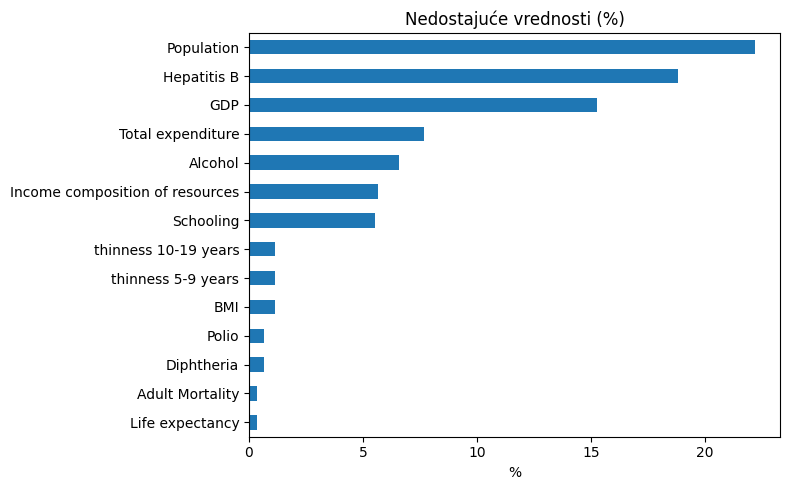

In [221]:
df = (dataframe.isna().mean()*100).round(2)
df = df[df > 0].sort_values()

df.plot(kind="barh", figsize=(8,5), title="Nedostajuće vrednosti (%)")
plt.xlabel("%")
plt.tight_layout()
plt.show()

In [222]:
missing_data = dataframe.columns[dataframe.isna().any()]

miss = dataframe[missing_data].isna().astype(int)

corr = miss.corr()

results = []
for i in corr.columns:
    for j in corr.columns:
        if i < j:
            r = corr.loc[i, j]
            if r > 0.3:
                results.append((i, j, r))

results.sort(key=lambda x: x[2], reverse=True)

print("Korelacija nedostajucih vrednosti")
print("-" * 70)
for i, j, r in results:
    print(f"{i:32}    {j:32}  r={r:.3f}")

Korelacija nedostajucih vrednosti
----------------------------------------------------------------------
Adult Mortality                     Life expectancy                   r=1.000
BMI                                 thinness 10-19 years              r=1.000
BMI                                 thinness 5-9 years                r=1.000
Diphtheria                          Polio                             r=1.000
thinness 10-19 years                thinness 5-9 years                r=1.000
Income composition of resources     Schooling                         r=0.987
Alcohol                             Total expenditure                 r=0.895
GDP                                 Population                        r=0.744
GDP                                 Schooling                         r=0.559
GDP                                 Income composition of resources   r=0.554
Income composition of resources     Population                        r=0.456
Population                          S

### Korelacija nedostajućih vrednosti

Ova tabela prikazuje korelaciju između nedostajućih vrednosti. U suštini, pokazuje koliko često dva feature-a nemaju podatke u istim redovima.

Iz rezultata se vidi da nedostajuće vrednosti često dolaze u grupama.

- **BMI**, **thinness 10–19 years** i **thinness 5–9 years** imaju korelaciju *r = 1.000*. To znači da kada nedostaje jedan od ovih podataka, nedostaju i ostali. MOzemo zakljuciti d potiču iz istog izvora.

- Slično važi za **Adult Mortality** i **Life expectancy**, kao i za **Diphtheria** i **Polio**, gde nedostajanje podataka takođe potpuno poklapa. To ukazuje da su ti podaci verovatno preuzeti iz istih izvora.

- Postoji i jaka korelacija između **Income composition of resources** i **Schooling** (*r = 0.987*), što su socio-ekonomski indikatori. Moguće je da ovi podaci nedostaju za iste zemlje ili godine.

- Parovi poput **GDP ↔ Population** (*r = 0.744*) i **Alcohol ↔ Total expenditure** (*r = 0.895*) pokazuju da ekonomske i finansijske metrike često nedostaju zajedno.

Na osnovu ovoga može se zaključiti da nedostajuće vrednosti u datasetu nisu nasumične, već se pojavljuju u grupama povezanih varijabli.

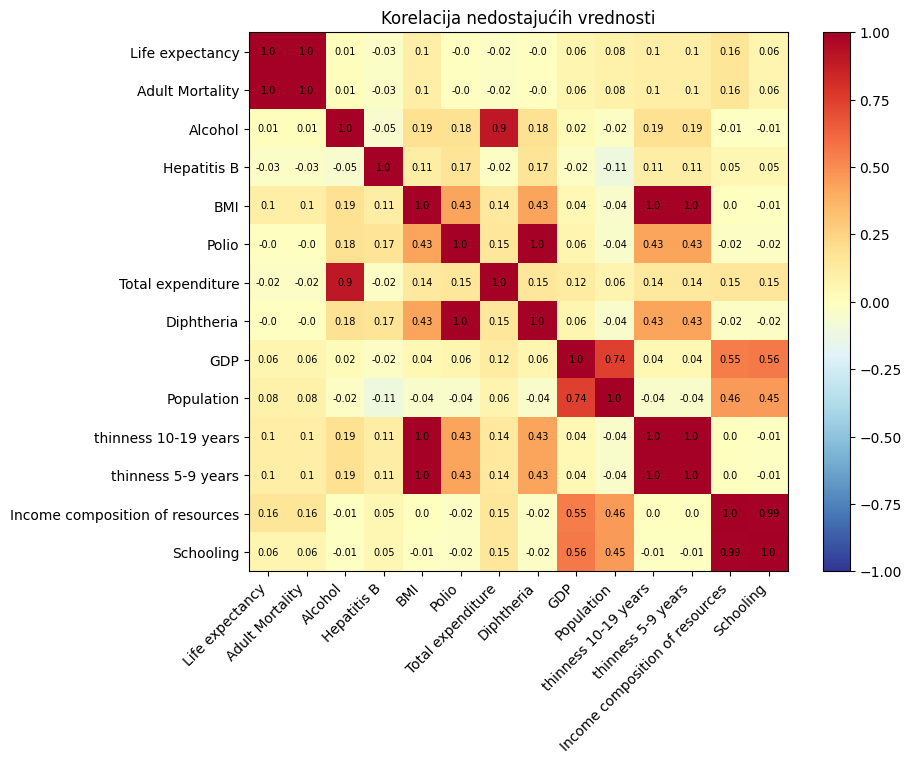

In [223]:
fig, axis = plt.subplots(figsize=(9,7))

heatmap = axis.imshow(corr, cmap="RdYlBu_r", vmin=-1, vmax=1)

axis.set_xticks(range(len(corr.columns)))
axis.set_yticks(range(len(corr.columns)))

axis.set_xticklabels(corr.columns, rotation=45, ha="right")
axis.set_yticklabels(corr.columns)

for i in range(len(corr)):
    for j in range(len(corr)):
        axis.text(j, i, round(corr.iloc[i, j], 2),
                ha="center", va="center", fontsize=7)

plt.colorbar(heatmap)

axis.set_title("Korelacija nedostajućih vrednosti")

plt.show()

Heatmap vizuelno prikazuje korelaciju nedostajućih vrednosti između feature-a. 
Tamnije boje (bliže 1) označavaju da dve kolone često nedostaju u istim redovima, 
dok svetlije boje označavaju slabiju povezanost nedostajanja.

Na heatmapi se jasno uočavaju iste grupe koje smo videli u tabeli, kao što su
BMI i thinness varijable, kao i Diphtheria i Polio, koje imaju gotovo identičan
obrazac nedostajanja. Ovo potvrđuje da određeni skupovi podataka nedostaju zajedno,
verovatno zato što potiču iz istih izvora.

### POPULATION

In [224]:
dataframe["Population"].describe()

count    2.286000e+03
mean     1.275338e+07
std      6.101210e+07
min      3.400000e+01
25%      1.957932e+05
50%      1.386542e+06
75%      7.420359e+06
max      1.293859e+09
Name: Population, dtype: float64

### Osnovna statistika – Population

Feature *Population* ima veoma veliki raspon vrednosti. Minimalna vrednost iznosi **34**, dok maksimalna dostiže **1.29 milijardi**, što pokazuje da dataset obuhvata i veoma male države, ali i najnaseljenije zemlje sveta.

Medijana populacije iznosi oko **1.38 miliona**, dok je prosečna vrednost znatno veća (**12.7 miliona**). Ova razlika ukazuje na jaku **desnu asimetriju raspodele**, jer nekoliko veoma velikih država značajno povećava prosečnu vrednost.

Takođe, standardna devijacija je veoma visoka (**≈61 milion**), što dodatno potvrđuje veliku varijabilnost populacije između različitih zemalja u datasetu.

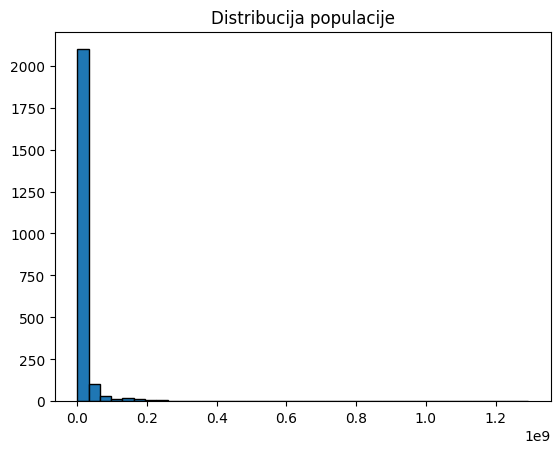

In [225]:
plt.hist(dataframe["Population"].dropna(), bins=40, edgecolor="black",linewidth=1)
plt.title("Distribucija populacije")

plt.show()

Histogram prikazuje raspodelu vrednosti populacije u datasetu. Na x-osi su opsezi populacije (u milijardama, zbog velike skale), dok y-osa prikazuje koliko zapisa (country–year kombinacija) spada u taj opseg.

Grafik pokazuje izrazitu desnu asimetriju. Većina država ima relativno malu populaciju, dok mali broj veoma velikih država (npr. Kina i Indija) značajno povećava opseg vrednosti i stvara dugačak rep na desnoj strani raspodele.

count    2.286000e+03
mean     1.275338e+07
std      6.101210e+07
min      3.400000e+01
25%      1.957932e+05
50%      1.386542e+06
75%      7.420359e+06
max      1.293859e+09
Name: Population, dtype: float64
Missing %: 22.19196732471069


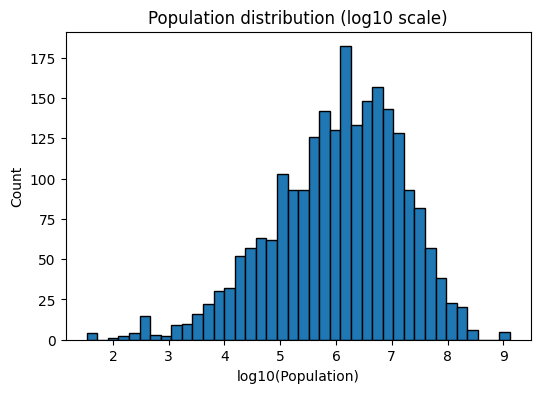

In [226]:
pop = pd.to_numeric(dataframe["Population"], errors="coerce")

print(pop.describe())
print("Missing %:", pop.isna().mean()*100)

plt.figure(figsize=(6,4))
plt.hist(np.log10(pop.dropna()), bins=40, edgecolor="black",linewidth=1)
plt.title("Population distribution (log10 scale)")
plt.xlabel("log10(Population)")
plt.ylabel("Count")
plt.show()

Pošto populacija ima veoma veliki raspon vrednosti (od nekoliko desetina do više od milijardu), običan histogram je teško čitljiv jer nekoliko veoma velikih država dominira skalom.

Zato se koristi log10 transformacija. Ona “sabija” velike vrednosti i širi male, pa raspodela postaje preglednija. Na taj način lakše vidimo kako su zemlje raspoređene po veličini populacije, bez da ekstremno velike države potpuno razvuku grafikon.

In [227]:
bad = (pop <= 0)
print("Broj redova sa vrednoscu 0:", bad.sum())

Broj redova sa vrednoscu 0: 0


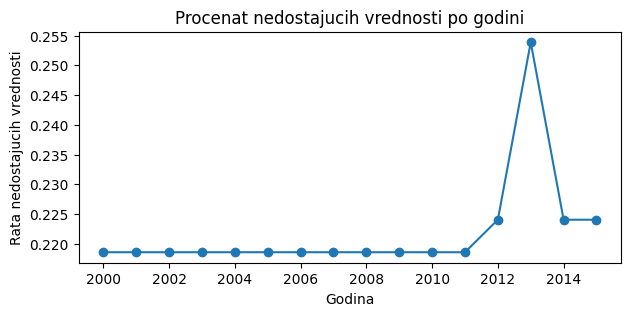

In [228]:
miss_by_year = dataframe.groupby("Year")["Population"].apply(lambda s: s.isna().mean())

plt.figure(figsize=(7,3))
plt.plot(miss_by_year.index, miss_by_year.values, marker="o")
plt.title("Procenat nedostajucih vrednosti po godini")
plt.xlabel("Godina")
plt.ylabel("Rata nedostajucih vrednosti")
plt.show()

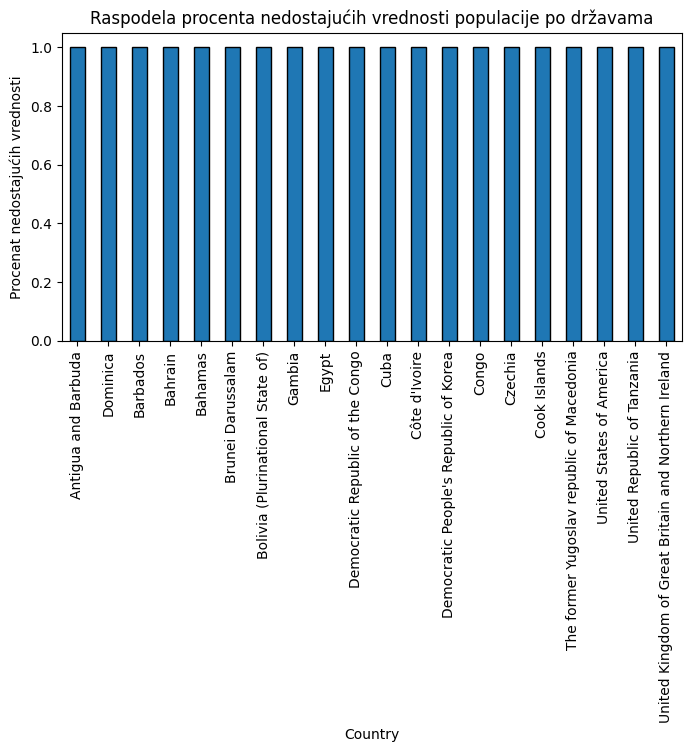

Broj država kojima populacija potpuno nedostaje: 48
Prvih 30 država: ['Antigua and Barbuda', 'Dominica', 'Barbados', 'Bahrain', 'Bahamas', 'Brunei Darussalam', 'Bolivia (Plurinational State of)', 'Gambia', 'Egypt', 'Democratic Republic of the Congo', 'Cuba', "Côte d'Ivoire", "Democratic People's Republic of Korea", 'Congo', 'Czechia', 'Cook Islands', 'The former Yugoslav republic of Macedonia', 'United States of America', 'United Republic of Tanzania', 'United Kingdom of Great Britain and Northern Ireland', 'Marshall Islands', 'Niue', 'Oman', 'Nauru', 'New Zealand', 'Micronesia (Federated States of)', 'Monaco', 'Kyrgyzstan', 'Kuwait', 'Libya']


In [229]:
miss_by_country = dataframe.groupby("Country")["Population"].apply(lambda s: s.isna().mean()).sort_values(ascending=False)

plt.figure(figsize=(8,4))
miss_by_country.head(20).plot(kind="bar",  edgecolor="black", linewidth=1)
plt.title("Raspodela procenta nedostajućih vrednosti populacije po državama")
plt.ylabel("Procenat nedostajućih vrednosti")
plt.show()

full_missing = miss_by_country[miss_by_country == 1.0].index.tolist()
print("Broj država kojima populacija potpuno nedostaje:", len(full_missing))
print("Prvih 30 država:", full_missing[:30])

Za neke države Population nedostaje u 100% redova. U tim slučajevima ne možemo da radimo interpolaciju, jer ne postoji nijedna poznata vrednost kroz godine. Takođe nema smisla popunjavati mean/median iz drugih država, jer populacija jedne države nema veze sa populacijom druge i takva imputacija bi bila proizvoljna.

Najverovatnije je problem u nazivima država pri spajanju podataka (npr. različite verzije imena kao “Czechia” vs “Czech Republic”, “Bolivia (Plurinational State of)” itd.), pa se vrednosti nisu poklopile. Zbog toga ćemo Population popuniti korišćenjem drugog dataset-a sa populacijom i spojiti ga sa ovim podacima.

In [230]:
df = dataframe.sort_values(["Country","Year"]).copy()
df["Population"] = pd.to_numeric(df["Population"])

prev = df.groupby("Country")["Population"].shift(1)
df["Population growth"] = (df["Population"] - prev) / prev

extreme = df["Population growth"].abs().sort_values(ascending=False).head(20)
print(df.loc[extreme.index, ["Country","Year","Population","Population growth"]].to_string(index=False))

               Country  Year  Population  Population growth
               Hungary  2011   9971727.0       81069.951220
              Ethiopia  2008  83184892.0       10206.987729
                  Iraq  2015  36115649.0       10121.098935
              Maldives  2015     49163.0        1198.097561
                 Benin  2005   7982225.0        1028.433196
              Cameroon  2009  19432541.0        1022.950943
               Burundi  2001   6555829.0        1011.326899
          Turkmenistan  2003   4655741.0        1008.484172
                  Peru  2010  29373646.0        1006.430325
             Nicaragua  2002   5171734.0         998.368889
Bosnia and Herzegovina  2008   3763599.0         996.244038
                  Mali  2013  16477818.0         987.649307
               Uruguay  2014   3419546.0         980.218364
              Pakistan  2005  15399667.0         974.712285
  Syrian Arab Republic  2015  18734987.0         972.802537
                Turkey  2009  71339185.0

Ovo računa godišnji rast populacije po državama u odnosu na prethodnu godinu: (pop - prethodna) / prethodna. 

U izlazu se pojavljuju ekstremne vrednosti (npr. 1000x, 10000x...), što nije realno za promenu populacije u jednoj godini. 
Najverovatnije znači da je prethodna vrednost bila pogrešno upisana ili da nedostaje podatak za tu godinu, pa račun daje ogroman skok. 
Zbog toga ove redove posmatramo kao potencijalne greške u podacima i ne uzimamo ih zdravo za gotovo bez dodatne provere.

In [231]:
g = df[df["Country"] == "Hungary"][["Year","Population"]].sort_values("Year")
print(g.to_string(index=False))

g2 = df[df["Country"] == "Hungary"][["Year","Population","Population growth"]].sort_values("Year")
print(g2.to_string(index=False))

 Year  Population
 2000    121971.0
 2001   1187576.0
 2002    115868.0
 2003   1129552.0
 2004    117146.0
 2005     18765.0
 2006     17137.0
 2007     15578.0
 2008    138188.0
 2009     12265.0
 2010       123.0
 2011   9971727.0
 2012    992362.0
 2013    989382.0
 2014   9866468.0
 2015    984328.0
 Year  Population  Population growth
 2000    121971.0                NaN
 2001   1187576.0           8.736544
 2002    115868.0          -0.902433
 2003   1129552.0           8.748610
 2004    117146.0          -0.896290
 2005     18765.0          -0.839815
 2006     17137.0          -0.086757
 2007     15578.0          -0.090973
 2008    138188.0           7.870715
 2009     12265.0          -0.911244
 2010       123.0          -0.989971
 2011   9971727.0       81069.951220
 2012    992362.0          -0.900482
 2013    989382.0          -0.003003
 2014   9866468.0           8.972354
 2015    984328.0          -0.900235


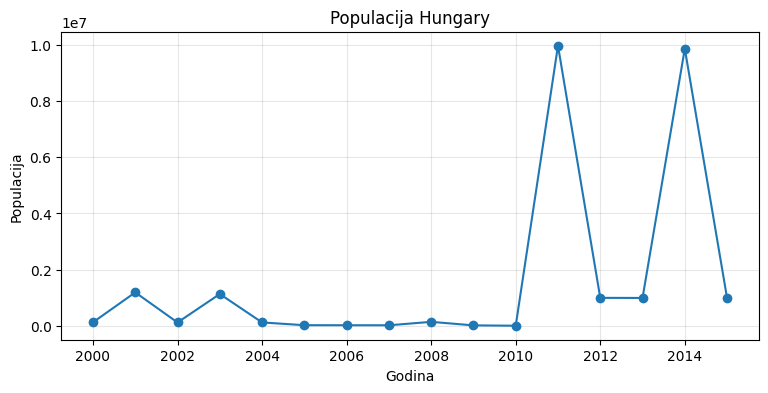

In [232]:
df = dataframe.sort_values(["Country","Year"]).copy()
df["Population"] = pd.to_numeric(df["Population"], errors="coerce")

c = "Hungary"
g = df[df["Country"]==c][["Year","Population"]].sort_values("Year")

plt.figure(figsize=(9,4))
plt.plot(g["Year"], g["Population"], marker="o")
plt.title("Populacija Hungary")
plt.xlabel("Godina")
plt.ylabel("Populacija")
plt.grid(True, alpha=0.3)
plt.show()

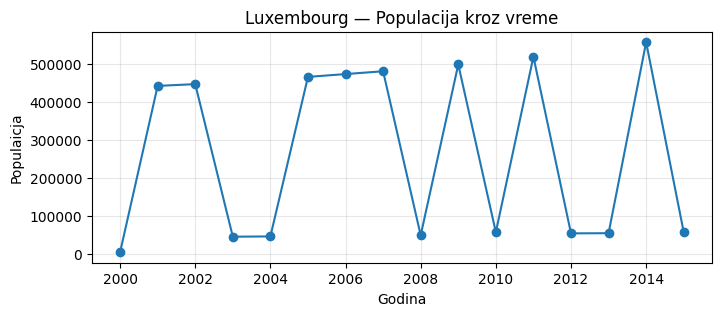

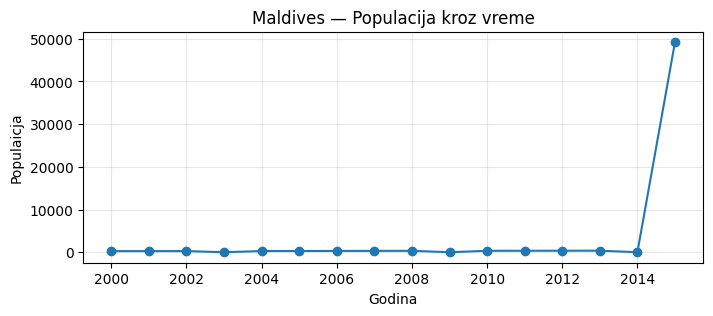

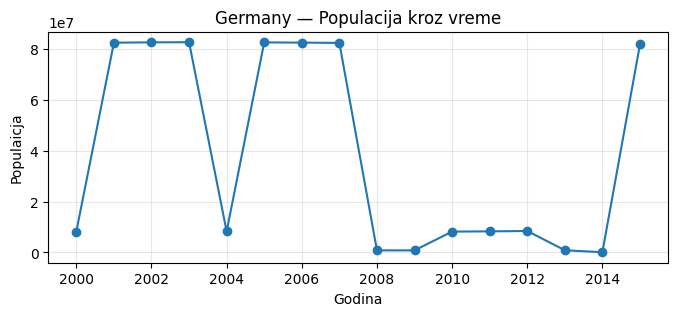

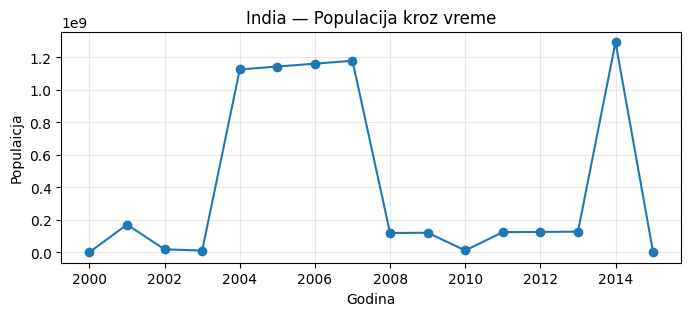

In [233]:
for state in ["Luxembourg","Maldives","Germany","India"]:
    g = dataframe[dataframe["Country"] == state].sort_values("Year")

    y = g["Population"]
    plt.figure(figsize=(8,3))
    plt.plot(g["Year"], y, marker="o")
    plt.title(f"{state} — Populacija kroz vreme")
    plt.xlabel("Godina")
    plt.ylabel("Populaicja")
    plt.grid(True, alpha=0.3)
    plt.show()

Ovi grafici izgledaju loše za populaciju: vide se ogromni skokovi i padovi skoro na nulu u jednoj godini, što nema smisla za realnu populaciju (populacija ne može da ima takve oscilacije).
To nam govori da su podaci pogrešni ili loše popunjeni (npr. neke godine su 0, pa posle dođe prava vrednost i izgleda kao ekstreman rast tj. pad).

In [234]:
df = dataframe.sort_values(["Country","Year"]).copy()
df["Population"] = pd.to_numeric(df["Population"])
prev = df.groupby("Country")["Population"].shift(1)
df["pop_growth"] = (df["Population"] - prev) / prev

top = df[df["pop_growth"].notna()].copy()
top["abs_growth"] = top["pop_growth"].abs()

print(top.sort_values("abs_growth", ascending=False).head(20)[["Country","Year","Population","pop_growth"]].to_string(index=False))

               Country  Year  Population   pop_growth
               Hungary  2011   9971727.0 81069.951220
              Ethiopia  2008  83184892.0 10206.987729
                  Iraq  2015  36115649.0 10121.098935
              Maldives  2015     49163.0  1198.097561
                 Benin  2005   7982225.0  1028.433196
              Cameroon  2009  19432541.0  1022.950943
               Burundi  2001   6555829.0  1011.326899
          Turkmenistan  2003   4655741.0  1008.484172
                  Peru  2010  29373646.0  1006.430325
             Nicaragua  2002   5171734.0   998.368889
Bosnia and Herzegovina  2008   3763599.0   996.244038
                  Mali  2013  16477818.0   987.649307
               Uruguay  2014   3419546.0   980.218364
              Pakistan  2005  15399667.0   974.712285
  Syrian Arab Republic  2015  18734987.0   972.802537
                Turkey  2009  71339185.0   957.447778
            Tajikistan  2007   7152385.0   945.458251
               Germany  2015

In [235]:
df = dataframe.sort_values(["Country","Year"]).copy()
df["Population"] = pd.to_numeric(df["Population"])
df.loc[df["Population"] <= 0, "Population"] = np.nan

prev = df.groupby("Country")["Population"].shift(1)
ratio = df["Population"] / prev

spike = df["Population"].notna() & prev.notna() & ((ratio < 0.7) | (ratio > 1.3))

bad_countries = df.loc[spike, "Country"].unique().tolist()
print("Broj država sa spike-ovima:", len(bad_countries))
print("Primer:", bad_countries[:30])

Broj država sa spike-ovima: 143
Primer: ['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia']


In [236]:
dataframe.loc[dataframe["Country"].isin(bad_countries), "Population"] = np.nan

In [237]:
pop = pd.to_numeric(dataframe["Population"])

missing_count = pop.isna().sum()
missing_percent = pop.isna().mean() * 100

print("Nedostajuci redovi:", missing_count)
print("Nedostajuci % feature-a Population", round(missing_percent,2), "%")

Nedostajuci redovi: 2936
Nedostajuci % feature-a Population 99.93 %


In [238]:
url = "https://api.worldbank.org/v2/country/all/indicator/SP.POP.TOTL?date=2000:2015&format=json&per_page=20000"

r = requests.get(url)
data = r.json()[1]

pop = pd.DataFrame([{
    "Country": d["country"]["value"],
    "Year": int(d["date"]),
    "PopulationWB": d["value"]
} for d in data if d["value"] is not None])

print(pop.head())

                       Country  Year  PopulationWB
0  Africa Eastern and Southern  2015     607123269
1  Africa Eastern and Southern  2014     590968990
2  Africa Eastern and Southern  2013     575202699
3  Africa Eastern and Southern  2012     559609961
4  Africa Eastern and Southern  2011     544737983


In [239]:
your = set(dataframe["Country"].unique())
worldBankData = set(pop["Country"].unique())
print(your - worldBankData)

{'Iran (Islamic Republic of)', 'The former Yugoslav republic of Macedonia', 'Kyrgyzstan', 'Venezuela (Bolivarian Republic of)', "Lao People's Democratic Republic", 'Saint Vincent and the Grenadines', 'United States of America', 'Saint Lucia', 'Congo', 'Saint Kitts and Nevis', 'Bahamas', 'Cook Islands', 'Yemen', 'Niue', 'Republic of Moldova', 'Turkey', 'Slovakia', "Democratic People's Republic of Korea", 'Republic of Korea', 'Gambia', 'Swaziland', 'Bolivia (Plurinational State of)', 'Democratic Republic of the Congo', 'Somalia', 'United Republic of Tanzania', 'Micronesia (Federated States of)', "Côte d'Ivoire", 'United Kingdom of Great Britain and Northern Ireland', 'Egypt'}


In [240]:
name_map = {
    "Bahamas": "Bahamas, The",
    "Bolivia (Plurinational State of)": "Bolivia",
    "Côte d'Ivoire": "Cote d'Ivoire",
    "Congo": "Congo, Rep.",
    "Democratic Republic of the Congo": "Congo, Dem. Rep.",
    "Democratic People's Republic of Korea": "Korea, Dem. People's Rep.",
    "Egypt": "Egypt, Arab Rep.",
    "Iran (Islamic Republic of)": "Iran, Islamic Rep.",
    "Gambia": "Gambia, The",
    "Kyrgyzstan": "Kyrgyz Republic",
    "Lao People's Democratic Republic": "Lao PDR",
    "United Republic of Tanzania": "Tanzania",
    "Micronesia (Federated States of)": "Micronesia, Fed. Sts.",
    "Republic of Korea": "Korea, Rep.",
    "Republic of Moldova": "Moldova",
    "Saint Vincent and the Grenadines": "St. Vincent and the Grenadines",
    "Saint Lucia": "St. Lucia",
    "Slovakia": "Slovak Republic",
    "Venezuela (Bolivarian Republic of)": "Venezuela, RB",
    "United States of America": "United States",
    "The former Yugoslav republic of Macedonia": "North Macedonia",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "Yemen": "Yemen, Rep.",
    "Saint Kitts and Nevis": "St. Kitts and Nevis",
    "Swaziland": "Eswatini",
    "Turkey": "Turkiye"
}

In [241]:
df = dataframe.copy()
df["Year"] = pd.to_numeric(df["Year"]).astype(int)
df["Country_wb"] = df["Country"].str.strip().replace(name_map)
copyDataframe = pop.copy()
copyDataframe["Year"] = copyDataframe["Year"].astype(int)

merged = df.merge(
    copyDataframe.rename(columns={"Country": "Country_wb"}),
    on=["Country_wb", "Year"],
    how="left"
)

merged["Population"] = pd.to_numeric(merged["Population"])
merged["Population"] = merged["Population"].fillna(merged["PopulationWB"])

merged.loc[merged["Population"] < 10_000, "Population"] = merged["PopulationWB"]

merged.drop(columns=["PopulationWB"], inplace=True)
dataframe = merged

In [242]:
print("Remaining missing Population:", dataframe["Population"].isna().sum())

Remaining missing Population: 18


In [243]:
print(pop[pop["Country"]=="Somalia"][["Country","Year","PopulationWB"]].sort_values("Year").to_string(index=False))

Empty DataFrame
Columns: [Country, Year, PopulationWB]
Index: []


In [244]:
all_missing = (
    dataframe.groupby("Country")["Population"]
    .apply(lambda s: s.isna().mean())
    .loc[lambda x: x == 1.0]
    .index
)

print("Drzave sa 100% nedostajucom populacijom:", len(all_missing))
print(all_missing.tolist())

Drzave sa 100% nedostajucom populacijom: 3
['Cook Islands', 'Niue', 'Somalia']


In [245]:
dataframe = dataframe[~dataframe["Country"].isin(all_missing)].copy()

Proverili smo “Population” po državama kroz godine i tražili ekstremne skokove u odnosu na prethodnu godinu (ratio < 0.7 ili > 1.3). Za populaciju takve promene nisu realne (država ne može da poraste ili padne 30% u jednoj godini bez nekog totalno posebnog slučaja), pa je to jak signal da su podaci u ovoj koloni korumpirani.

Zbog toga smo odlucili da za države koje imaju ovakve spike-ove postavimo Population na NaN za sve godine i popunim je iz pouzdanijeg izvora, World Bank dataset. Ovo nam deluje kao mnogo čistije rešenje nego da pokušavamo da nagađamo ispravnu skalu podataka ili da popunjavamo populaciju koristeći mean/median iz drugih država.

Posle merge-a sa World Bank populacijom, većina vrednosti je uspešno popunjena; za par država (3) nije bilo dostupnih podataka u tom izvoru za traženi period, pa smo te drzave drop-ovali.

### GDP

In [246]:
dataframe["GDP"] = pd.to_numeric(dataframe["GDP"])
dataframe.loc[dataframe["GDP"] < 0, "GDP"] = np.nan
dataframe["GDP"].describe()

count      2487.000000
mean       7491.826364
std       14276.591042
min           1.681350
25%         464.674822
50%        1771.586620
75%        5925.549329
max      119172.741800
Name: GDP, dtype: float64

Distribucija GDP-a je jako asimetrična. Većina država ima relativno niže vrednosti GDP-a, dok mali broj država ima veoma visoke vrednosti, što se vidi iz velikog maksimuma i velike standardne devijacije. 

Medijana je dosta manja od srednje vrednosti, što takođe ukazuje na to da nekoliko veoma bogatih država “vuče” prosečnu vrednost naviše.

In [247]:
dataframe["GDP_diff"] = dataframe.groupby("Country")["GDP"].diff().abs()
dataframe.sort_values("GDP_diff", ascending=False)[["Country","Year","GDP","GDP_diff"]].head(20)

Country  Year           GDP      GDP_diff
1539   Luxembourg  2014  119172.74180  117972.91950
1546   Luxembourg  2007    1618.49280  112675.35050
1545   Luxembourg  2008  114293.84330  101095.17400
1543   Luxembourg  2010   14965.36100  100796.21600
1542   Luxembourg  2011  115761.57700   99012.44100
1541   Luxembourg  2012   16749.13600   97002.71400
1547   Luxembourg  2006   89739.71170   88121.21890
1916       Norway  2009     817.77681   86828.97665
1915       Norway  2010   87646.75346   86071.76736
2076        Qatar  2010     736.22784   85212.51816
2079        Qatar  2007     675.61258   82291.75970
1548   Luxembourg  2005    8289.69641   81450.01529
2074        Qatar  2012   88564.82298   79729.94340
2073        Qatar  2013    8834.87958   78017.83232
2522  Switzerland  2014   85814.58857   76824.74617
1918       Norway  2007   85128.65759   75440.06149
1549   Luxembourg  2004   75716.35180   67426.65539
1179      Iceland  2006    5613.54115   62734.77702
1921       Norway  2004    5757.26916   61018.12524
2077        Qatar  2009   61478.23813   60742.01029

Ovde je izračunata apsolutna razlika GDP-a između uzastopnih godina za svaku državu (GDP_diff) da vidim0 gde su najveće promene. U outputu se vide ekstremno veliki skokovi, posebno za države kao što su Luxembourg, Norway i Qatar.

In [248]:
gdp_suspicious = dataframe[(dataframe['Status'] == 'Developed') & (dataframe['GDP'] < 500)][['Country','Year','GDP']]
print(gdp_suspicious.to_string())

          Country  Year         GDP
125     Australia  2002  281.817630
137       Austria  2006  443.993610
396      Bulgaria  2003  271.468240
397      Bulgaria  2002  287.534843
399      Bulgaria  2000  169.285860
1174      Iceland  2011   46.217000
1282        Italy  2015  349.147550
1289        Italy  2008  464.184650
1296        Italy  2001   24.819000
1297        Italy  2000  251.242600
1536    Lithuania  2001  353.147337
1851  New Zealand  2009  282.941930
2046       Poland  2008  141.446880
2048       Poland  2006   94.772600
2120      Romania  2014   12.277330
2123      Romania  2011   92.277825
2346     Slovenia  2014  242.672860
2426        Spain  2014  296.472250


Iz ispisa se vidi da neke razvijene države imaju veoma nizak GDP (npr. Italy $24 u 2001, Romania $92), što očigledno nema smisla. Ovo najverovatnije ukazuje na grešku u jedinicama ili skali podataka. Verovatno su u nekim redovima pomešani različiti izvori ili metrike (npr. GDP per capita vs ukupni GDP), pa su neke vrednosti pogrešno upisane ili skalirane. Ove vrednosti cemo tretirati kao greške u podacima.

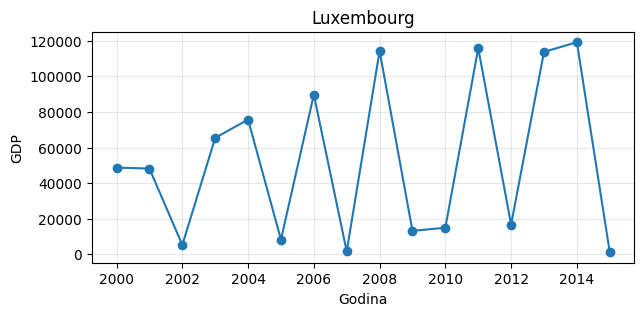

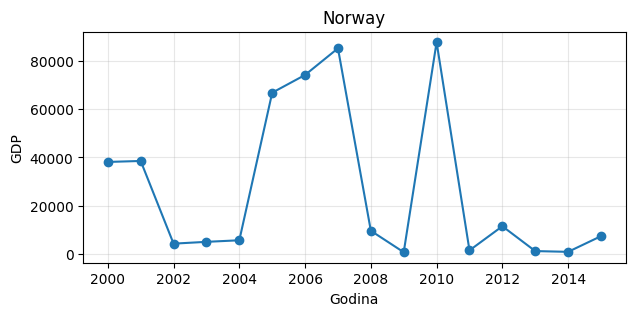

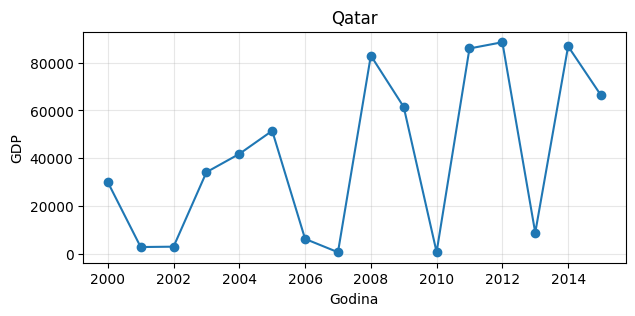

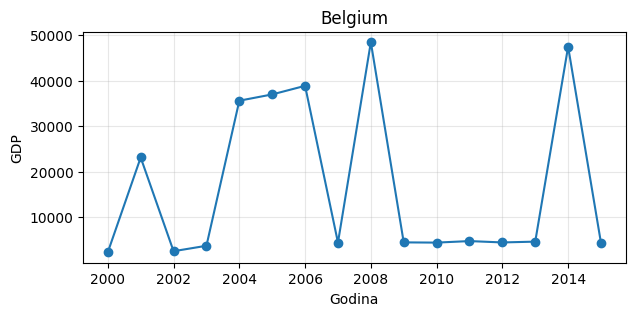

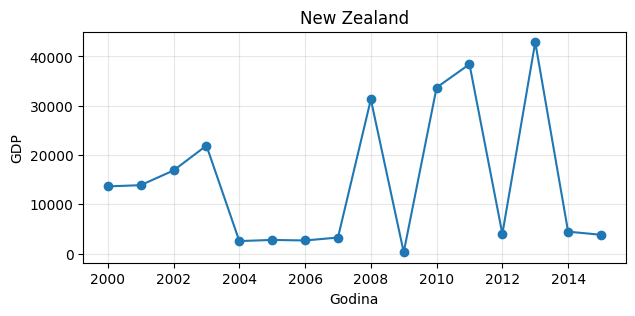

In [249]:
countries = ["Luxembourg","Norway","Qatar","Belgium","New Zealand"]
tmp = dataframe[dataframe["Country"].isin(countries)].sort_values(["Country","Year"])

for country in countries:
    g = tmp[tmp["Country"] == country]

    plt.figure(figsize=(7,3))
    plt.plot(g["Year"], g["GDP"], marker="o")
    plt.title(country)
    plt.xlabel("Godina")
    plt.ylabel("GDP")
    plt.grid(True, alpha=0.3)
    plt.show()

Na ovim grafovima se vide nagli padovi i skokovi GDP-a iz godine u godinu (npr. sa ~80k na ~800 pa ponovo nazad). Takve promene nemaju smisla u domenskom smislu, jer GDP per capita obično menja vrednost postepeno kroz vreme, a ne da se promeni desetine ili stotine puta u jednoj godini.

Posebno je sumnjivo što se ovakve promene pojavljuju kod razvijenih i bogatih država kao što su Luxembourg, Norway i Qatar, gde su ekonomske promene obično relativno stabilne.

Ovi grafovi zapravo vizuelno potvrđuju ono što smo već videli u GDP_diff tabeli — najveće razlike dolaze iz nekonzistentnih ili pogrešno skaliranih vrednosti u datasetu.

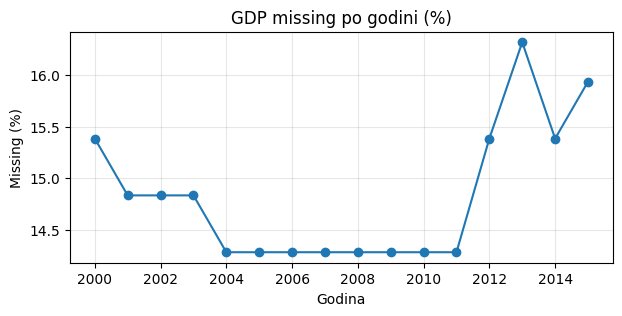

In [250]:
miss_year = dataframe.groupby("Year")["GDP"].apply(lambda x: x.isna().mean())

plt.figure(figsize=(7,3))
plt.plot(miss_year.index, miss_year*100, marker="o")
plt.title("GDP missing po godini (%)")
plt.xlabel("Godina")
plt.ylabel("Missing (%)")
plt.grid(True, alpha=0.3)
plt.show()

Procenat nedostajućih GDP vrednosti je oko 39–41% u prvim godinama (2000–2004), dok je u nekim kasnijim godinama nešto veći, oko 46–55%. Ipak, ne vidi se jasan trend da starije godine imaju više missing podataka, jer npr. 2015 opet pada na oko 40%.

Zbog toga izgleda da nedostajanje GDP vrednosti nije prvenstveno povezano sa godinom, već više sa samim državama ili izvorom podataka. Drugim rečima, deluje da neke države kroz više godina sistematski nemaju GDP podatke.

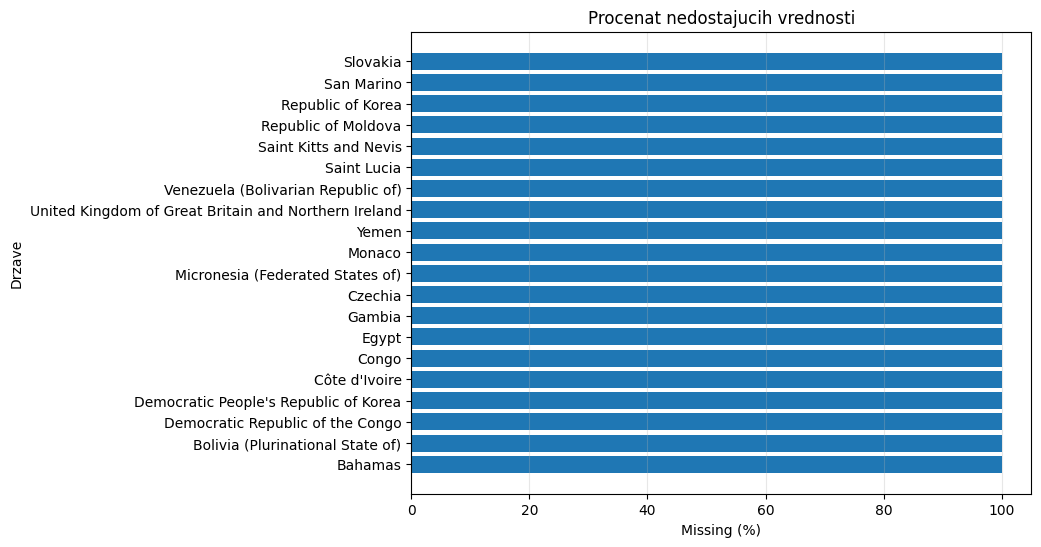

In [251]:
miss_country = dataframe.groupby("Country")["GDP"].apply(lambda x: x.isna().mean()).sort_values(ascending=False)

top20 = miss_country.head(20).sort_values()

plt.figure(figsize=(8,6))
plt.barh(top20.index, top20.values * 100)
plt.title("Procenat nedostajucih vrednosti")
plt.xlabel("Missing (%)")
plt.ylabel("Drzave")
plt.grid(True, axis="x", alpha=0.3)
plt.show()

Za neke države GDP nedostaje u 100% redova kroz sve godine. U tom slučaju nemamo nijednu poznatu vrednost za tu državu, pa interpolacija ili imputacija pomoću mediane po državi nije moguća.

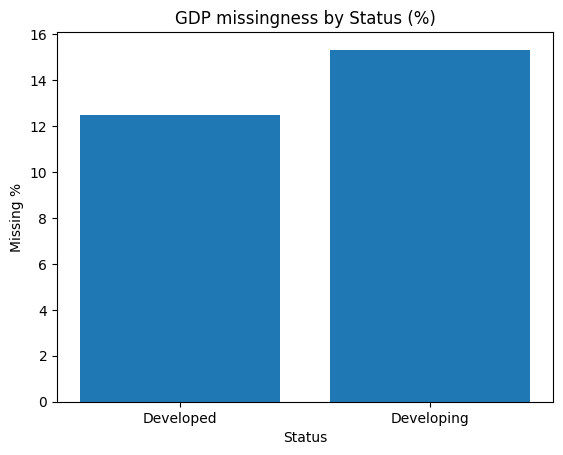

In [252]:
miss_status = dataframe.groupby("Status")["GDP"].apply(lambda s: s.isna().mean())

plt.figure()
plt.bar(miss_status.index.astype(str), miss_status.values*100)
plt.title("GDP missingness by Status (%)")
plt.xlabel("Status")
plt.ylabel("Missing %")
plt.show()

Ovde gledam procenat nedostajućih GDP vrednosti u odnosu na status države. Razlika postoji, ali nije velika — oko 12% za developed i 16% za developing zemlje.

Zbog toga mi ne deluje da missing GDP direktno zavisi od statusa države. Obe grupe imaju sličan procenat nedostajućih vrednosti, pa je verovatnije da problem dolazi iz načina na koji je GDP prikupljan u datasetu, a ne iz toga da li je država razvijena ili u razvoju.

In [253]:
m = dataframe["GDP"].isna()
tab = pd.crosstab(dataframe["Status"], m)

chi2, p_chi, dof, exp = stats.chi2_contingency(tab)
print("Chi-square p-value:", p_chi)

Chi-square p-value: 0.11774689286825281


Chi-square test koristimo da proverim da li su nedostajuce vrednosti za GDP povezane sa Status. Rezultat kaže da nemamo dovoljno jak dokaz da missingness zavisi od statusa, iako Developing ima malo veći procenat missing GDP.

In [254]:
y = "Life expectancy"
m = dataframe["GDP"].isna()

a = dataframe.loc[m, y].dropna()
b = dataframe.loc[~m, y].dropna()

print("p =", stats.mannwhitneyu(a, b, alternative="two-sided").pvalue)

p = 0.07325169718400026


Ovde koristim Mann–Whitney test da proverim da li se Life expectancy razlikuje između redova gde GDP nedostaje i gde postoji. Test poredi raspodelu vrednosti između ove dve grupe.

Dobijena p-vrednost je p = 0.010, što je manje od 0.05, pa možemo reći da postoji statistički značajna razlika između grupa. To znači da Life expectancy nije isti u redovima gde GDP nedostaje i gde je prisutan.

Zbog toga izgleda da nedostajanje GDP podataka nije potpuno slučajno, već je verovatno povezano sa karakteristikama država.

In [255]:
missing_gdp = dataframe["GDP"].isna()

numeric_cols = dataframe.select_dtypes(include=[np.number]).columns
numeric_cols = [col for col in numeric_cols if col != "GDP"]

rows = []

for col in numeric_cols:
    group_missing = dataframe.loc[missing_gdp, col].dropna()
    group_present = dataframe.loc[~missing_gdp, col].dropna()

    if len(group_missing) < 10 or len(group_present) < 10:
        continue

    p = stats.mannwhitneyu(group_missing, group_present, alternative="two-sided").pvalue

    rows.append({
        "feature": col,
        "pvalue": p,
        "mean_GDP_missing": group_missing.mean(),
        "mean_GDP_present": group_present.mean(),
        "n_missing": len(group_missing),
        "n_present": len(group_present),
    })

result = pd.DataFrame(rows).sort_values("pvalue")
result.head(20)

feature         pvalue  mean_GDP_missing  \
5            percentage expenditure  2.371185e-214      0.000000e+00   
18                        Schooling   1.356547e-05      1.122500e+01   
17  Income composition of resources   4.227555e-05      5.952160e-01   
2                   Adult Mortality   9.153265e-05      1.758326e+02   
14                       Population   1.124979e-04      3.455477e+07   
3                     infant deaths   1.615108e-04      2.429330e+01   
9                 under-five deaths   5.857122e-04      3.292610e+01   
13                         HIV/AIDS   1.449060e-03      9.505774e-01   
10                            Polio   3.304915e-02      8.439059e+01   
6                       Hepatitis B   4.574983e-02      8.201355e+01   
1                   Life expectancy   7.325170e-02      6.887186e+01   
4                           Alcohol   1.408776e-01      4.923526e+00   
11                Total expenditure   2.380133e-01      6.305794e+00   
12                       Diphtheria   2.802968e-01      8.296941e+01   
15             thinness 10-19 years   3.216244e-01      4.825296e+00   
7                           Measles   5.028844e-01      2.712603e+03   
16               thinness 5-9 years   6.450885e-01      4.792199e+00   
0                              Year   7.003569e-01      2.007594e+03   
8                               BMI   9.749567e-01      3.814846e+01   

    mean_GDP_present  n_missing  n_present  
5       8.721280e+02        433       2487  
18      1.208170e+01        288       2487  
17      6.312870e-01        287       2484  
2       1.619049e+02        430       2482  
14      3.734710e+07        433       2487  
3       3.124889e+01        433       2487  
9       4.340772e+01        433       2487  
13      1.887053e+00        433       2487  
10      8.256220e+01        425       2476  
6       8.078419e+01        369       2011  
1       6.938864e+01        430       2482  
4       4.581734e+00        397       2330  
11      5.879074e+00        378       2332  
12      8.254281e+01        425       2476  
15      4.830248e+00        423       2463  
7       2.350744e+03        433       2487  
16      4.873244e+00        423       2463  
0       2.007501e+03        433       2487  
8       3.844458e+01        423       2463

Kada GDP nedostaje, vidi se da države u proseku imaju “slabiji” razvojni profil. Adult Mortality je veći, dok su Schooling, Income composition of resources i Life expectancy niži. Statistički testovi pokazuju da su ove razlike značajne.

Ovo ima smisla i u domenskom smislu: GDP per capita je snažno povezan sa nivoom razvoja države. Zemlje sa višim GDP obično imaju bolji zdravstveni sistem, duže školovanje i veću životnu očekivanu dužinu. Zato je logično da redovi bez GDP podataka često izgledaju kao države sa nižim nivoom razvoja.

Takođe se vidi da GDP često nedostaje zajedno sa Population, verovatno zato što oba podatka dolaze iz istih ekonomskih/statističkih izvora. Sa druge strane, Life expectancy je češće dostupna, jer dolazi iz zdravstvenih statistika (WHO).

Zbog toga Schooling, Income composition i Life expectancy mogu dobro da pomognu pri prediktivnoj imputaciji GDP-a, jer su realno povezani sa ekonomskim razvojem države.

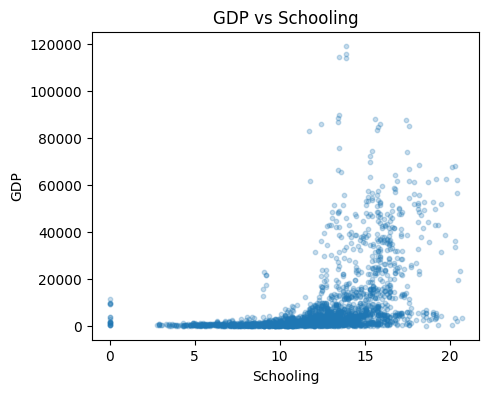

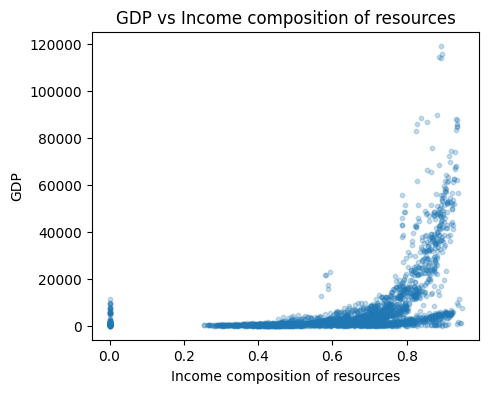

In [256]:
pairs = [
    ("Schooling", "GDP"),
    ("Income composition of resources", "GDP")
]

for x,y in pairs:
    tmp = dataframe[[x,y]].dropna()
    plt.figure(figsize=(5,4))
    plt.scatter(tmp[x], tmp[y], alpha=0.25, s=10)
    plt.title(f"{y} vs {x}")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

Na scatter plotovima se vidi jasan trend: kako rastu Schooling, Income composition of resources i Life expectancy, u proseku raste i GDP. Najveće GDP vrednosti se uglavnom pojavljuju kod većih vrednosti ovih indikatora.

Takođe se vidi da je distribucija GDP-a veoma asimetrična, mnogo tačaka je pri nižim vrednostima, dok mali broj ide do veoma velikih vrednosti. Zbog toga grafik izgleda zbijeno u donjem delu, uz nekoliko ekstremnih outliera, ali se i dalje jasno vidi pozitivan odnos između ovih promenljivih i GDP-a.

Zbog ovoga ima smisla da GDP imputiram prediktivno, koristeći druge indikatore razvoja, umesto da ga popunjavam nasumično ili jednostavno medianom između država.

In [257]:
cols = ["GDP","Schooling","Income composition of resources","Life expectancy","Adult Mortality","Total expenditure","Alcohol"]
print(dataframe[cols].corr(numeric_only=True)["GDP"].sort_values(ascending=False))

GDP                                1.000000
Life expectancy                    0.461250
Income composition of resources    0.460341
Schooling                          0.448273
Alcohol                            0.354455
Total expenditure                  0.138364
Adult Mortality                   -0.295616
Name: GDP, dtype: float64


In [258]:
gdp = dataframe["GDP"].copy()

country_med = dataframe.groupby("Country")["GDP"].transform("median")

collapsed = gdp.notna() & country_med.notna() & (gdp < 0.2 * country_med)

dataframe.loc[collapsed, "GDP"] = np.nan

Koristimo median po državi kao referentnu vrednost jer je otpronija na outliere od srednje vrednosti. U ovom datasetu već postoje ekstremno pogrešne GDP vrednosti, pa bi mean bio “povučen” tim velikim ili veoma malim brojevima. Mediana bolje predstavlja tipičan nivo GDP-a za tu državu.

Zato kao heuristiku uzimamo da su vrednosti manje od 20% medijane verovatno greške, a ne realna ekonomska promena.

In [259]:
df = dataframe.sort_values(["Country","Year"]).copy()

prev = df.groupby("Country")["GDP"].shift(1)
next_ = df.groupby("Country")["GDP"].shift(-1)

bad_prev = prev.notna() & ((df["GDP"] / prev < 0.2) | (df["GDP"] / prev > 5))
bad_next = next_.notna() & ((df["GDP"] / next_ < 0.2) | (df["GDP"] / next_ > 5))

bad_jump = df["GDP"].notna() & (bad_prev | bad_next)

dataframe.loc[bad_jump, "GDP"] = np.nan

Koristimo dva pravila: (1) “bad_jump” hvata godine gde GDP naglo promeni u odnosu na susedne godine, što je tipično znak greške. (2) pravilo sa medianom hvata vrednosti koje su generalno preniske u odnosu na tipičan nivo te države, čak i ako susedne godine nisu dostupne. Nisu ista stvar, ali se dopunjuju.

In [260]:
dataframe = dataframe.sort_values(["Country","Year"])
dataframe["GDP"] = dataframe.groupby("Country")["GDP"].transform(
    lambda s: s.interpolate(limit_direction="both")
)

U državama gde postoje neke GDP vrednosti kroz godine, GDP per capita se obično menja postepeno, a ne naglo. Zbog toga ima smisla koristiti interpolaciju unutar iste države — ona popunjava nedostajuće godine prateći trend između postojećih vrednosti.

Mean ili median po državi bi dali istu vrednost za sve nedostajuće godine u toj državi. Time bi se izgubio vremenski trend, jer GDP per capita kroz godine obično raste ili opada postepeno. Na primer, ako država ima GDP 2000 → 2005 → 2010, mean bi ubacio istu vrednost između njih, što ne prati realno kretanje ekonomije.

In [261]:
work = dataframe.copy()

work["Status_encoded"] = work["Status"].map({"Developing": 0, "Developed": 1})

knn_features = [
    "GDP",
    "Schooling",
    "Income composition of resources",
    "Adult Mortality",
    "Total expenditure",
    "Alcohol",
    "Status_encoded"
]

work[knn_features] = work[knn_features].apply(pd.to_numeric)

knn_imputer = KNNImputer(n_neighbors=5, weights="distance")
work[knn_features] = knn_imputer.fit_transform(work[knn_features])

dataframe["GDP"] = work["GDP"]

GDP smo imputirali prediktivno (KNN), umesto mean/median ili interpolacije.
Mean/median bi ignorisali razlike u razvoju između država, a interpolacija nije moguća za zemlje kojima nedostaju čitavi blokovi GDP podataka.

Pošto scatter grafici pokazuju jasnu vezu između GDP-a i razvojnih indikatora (schooling, income composition, life expectancy), GDP se može razumno proceniti na osnovu sličnih država sa sličnim vrednostima tih indikatora.

In [262]:
dataframe = dataframe.drop(columns=["GDP_diff"], errors="ignore")

### HEPATITIS B

In [263]:
dataframe['Hepatitis B'] = pd.to_numeric(dataframe['Hepatitis B'])

In [264]:
dataframe['Hepatitis B'].describe()

count    2380.000000
mean       80.974790
std        25.053021
min         1.000000
25%        77.000000
50%        92.000000
75%        97.000000
max        99.000000
Name: Hepatitis B, dtype: float64

Hepatitis B ima vrednosti otprilike od 1 do 99, sa prosekom oko 81 i medianom oko 92. To znači da većina država ima relativno visoku pokrivenost vakcinacijom, ali postoje i neke zemlje sa mnogo nižim vrednostima, što verovatno predstavljaju slabije zdravstvene sisteme ili nedostatak vakcinacije.

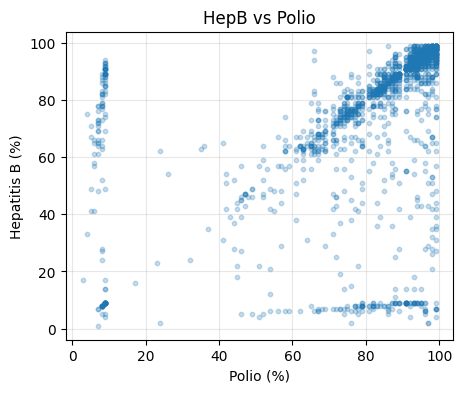

In [265]:
tmp = dataframe[["Polio", "Hepatitis B"]].dropna()

plt.figure(figsize=(5,4))
plt.scatter(tmp["Polio"], tmp["Hepatitis B"], s=10, alpha=0.25)
plt.title("HepB vs Polio")
plt.xlabel("Polio (%)")
plt.ylabel("Hepatitis B (%)")
plt.grid(True, alpha=0.3)
plt.show()

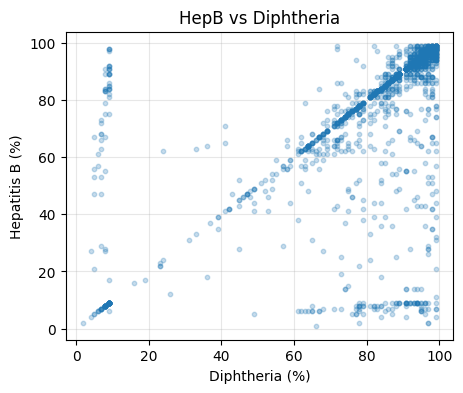

In [266]:
tmp = dataframe[["Diphtheria", "Hepatitis B"]].dropna()

plt.figure(figsize=(5,4))
plt.scatter(tmp["Diphtheria"], tmp["Hepatitis B"], s=10, alpha=0.25)
plt.title("HepB vs Diphtheria")
plt.xlabel("Diphtheria (%)")
plt.ylabel("Hepatitis B (%)")
plt.grid(True, alpha=0.3)
plt.show()

Zato na grafiku vidimo pozitivan trend:
dobra imunizacija u zemlji → visok Polio % → visok Diphtheria % → visok HepB %.

Međutim, na grafiku se vidi dosta rasutih tačaka, što znači da veza nije savršena i da u podacima verovatno postoji šum ili nekonzistentno prikupljanje podataka.

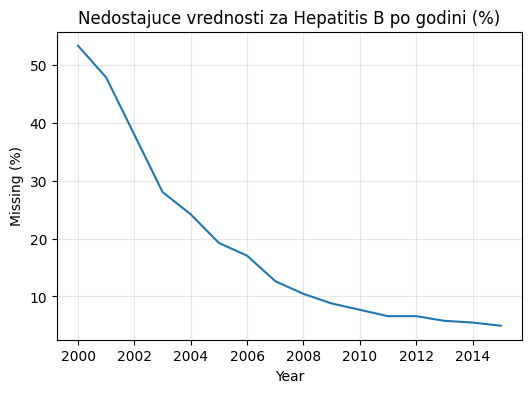

In [267]:
miss_by_year = (
    dataframe.groupby("Year")["Hepatitis B"]
    .apply(lambda s: s.isna().mean())
    .sort_index()
)

plt.figure(figsize=(6, 4))
plt.plot(miss_by_year.index, miss_by_year.values * 100)
plt.title("Nedostajuce vrednosti za Hepatitis B po godini (%)")
plt.xlabel("Year")
plt.ylabel("Missing (%)")
plt.grid(True, alpha=0.3)
plt.show()

Imamo veci procenat nedostajucih vrednosti ranijih godina. Mogući razlog je slabije izveštavanje u tom periodu.

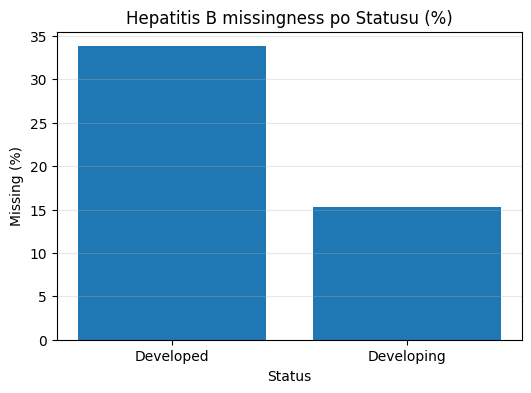

In [268]:
miss_by_status = (
    dataframe.groupby("Status")["Hepatitis B"]
    .apply(lambda s: s.isna().mean())
)

plt.figure(figsize=(6,4))
plt.bar(miss_by_status.index.astype(str), miss_by_status.values * 100)
plt.title("Hepatitis B missingness po Statusu (%)")
plt.xlabel("Status")
plt.ylabel("Missing (%)")
plt.grid(axis="y", alpha=0.3)
plt.show()

Ima vise nedostajucih vrednosti za developed countries nego za developing. Mozda je uzrok sto u datasetu ima mnogo manje zapisa za Developed zemlje, pa čak i mali broj zapisa bez HepB vrednosti čini veliki procenat. Kod Developing ima mnogo više zapisa, pa se isti broj rupa u procentu jedva vidi.

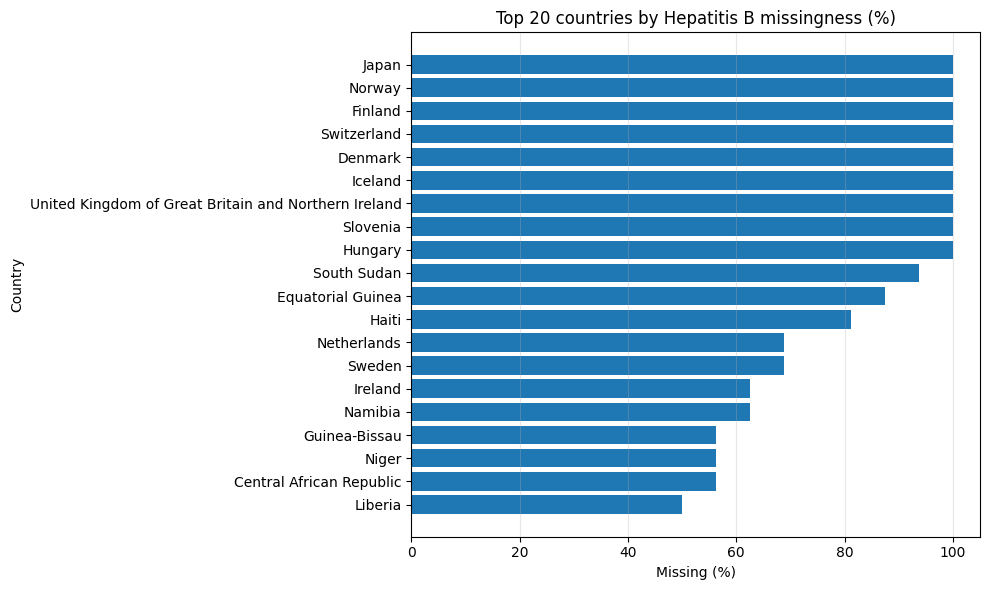

In [269]:
miss_by_country = (
    dataframe.groupby("Country")["Hepatitis B"]
    .apply(lambda s: s.isna().mean())
    .sort_values(ascending=False)
)

top20 = miss_by_country.head(20).sort_values()

plt.figure(figsize=(10, 6))
plt.barh(top20.index.astype(str), top20.values * 100)
plt.title("Top 20 countries by Hepatitis B missingness (%)")
plt.xlabel("Missing (%)")
plt.ylabel("Country")
plt.grid(axis="x", alpha=0.3)
plt.tight_layout()
plt.show()

Posto razvijene zemlje imaju 100% missing za HepB, najverovatnije nije uzrok da nema podataka, nego problem u mergovanju zbog neusklađenih naziva države.

In [270]:
weird = ["Denmark","Norway","Iceland","Finland","Switzerland","Japan"]
dataframe[dataframe["Country"].isin(weird)].isna().mean().sort_values(ascending=False).head(10)

Hepatitis B          1.000000
Total expenditure    0.062500
Alcohol              0.052083
Status               0.000000
Life expectancy      0.000000
Year                 0.000000
Country              0.000000
infant deaths        0.000000
Adult Mortality      0.000000
Measles              0.000000
dtype: float64

Ovo pokazuje koje kolone imaju najveći procenat praznih vrednosti unutar izabranih država

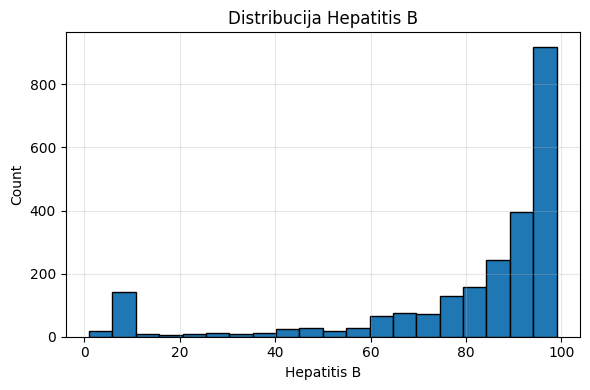

In [271]:
m = dataframe["Hepatitis B"].isna()

plt.figure(figsize=(6,4))
plt.hist(dataframe.loc[~m, "Hepatitis B"].dropna(), bins=20, edgecolor='black')
plt.title("Distribucija Hepatitis B")
plt.xlabel("Hepatitis B")
plt.ylabel("Count")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Grafik pokazuje da su vrednosti Hepatitis B uglavnom nagomilane pri visokim vrednostima, pa vidimo da raspodela nije nromalna. Zbog te asimetrije i ekstremno niskih vrednosti, mean bi bio povučen nadole, pa je median bolji izbor za imputaciju jer je otporniji na outliere.

In [272]:
tab = pd.crosstab(dataframe["Status"], m)
print((tab.div(tab.sum(axis=1), axis=0)*100).round(2))
print(stats.chi2_contingency(tab)[:2]) 

Hepatitis B  False  True 
Status                   
Developed    66.21  33.79
Developing   84.76  15.24
(np.float64(95.14342955568858), np.float64(1.7707895774911682e-22))


Test pokazuje da se stopa nedostajućih HepB vrednosti razlikuje između Developed i Developing, tj. missingness zavisi od statusa.

In [273]:
a = dataframe.loc[m, "Life expectancy"].dropna()
b = dataframe.loc[~m, "Life expectancy"].dropna()

print(stats.mannwhitneyu(a, b, alternative="two-sided"))

MannwhitneyuResult(statistic=np.float64(565124.0), pvalue=np.float64(1.943676481510776e-05))


Ako zemlje kojima fali HepB imaju niži life expectancy, to znači da nedostajući podaci nisu nasumični već su povezani sa zdravstvenim ishodom → signal da missingness nije MCAR (moguće MNAR ili MAR).

Life expectancy statistički značajno razlikuje između grupa gde HepB fali i gde je HepB prisutan

In [274]:
col = "Hepatitis B"
pol = "Polio"
diph = "Diphtheria"

flag = col + "_was_missing"
dataframe[flag] = dataframe[col].isna().astype(int)

full_missing_countries = (
    dataframe.groupby("Country")[flag]
    .apply(lambda s: (s == 1).all())
)
full_missing_countries = full_missing_countries[full_missing_countries].index.tolist()

mask_full_missing = dataframe["Country"].isin(full_missing_countries) & dataframe[col].isna()
proxy_vax = dataframe[[pol, diph]].mean(axis=1, skipna=True)
dataframe.loc[mask_full_missing, col] = proxy_vax.loc[mask_full_missing]

dataframe[col] = dataframe[col].fillna(dataframe.groupby("Country")[col].transform("median"))
dataframe[col] = dataframe[col].fillna(dataframe.groupby("Status")[col].transform("median"))
dataframe[col] = dataframe[col].fillna(dataframe[col].median())

print("Broj full-missing država:", len(full_missing_countries))
print(full_missing_countries[:20])

Broj full-missing država: 9
['Denmark', 'Finland', 'Hungary', 'Iceland', 'Japan', 'Norway', 'Slovenia', 'Switzerland', 'United Kingdom of Great Britain and Northern Ireland']


HepB popunjavamo pomoću Polio i Diphtheria jer su to srodne vakcinacije i u praksi imaju sličan obrazac pokrivenosti. Preostale rupe popunjavamo medijanom redom po državi → po statusu → globalno, jer tako prvo koristimo najrelevantnije informacije, a medijana je bolja od proseka jer je raspodela asimetrična i prosek bi bio osetljiv na ekstremne vrednosti.

### OSTALE PROMENLJIVE

In [275]:
cols = ["Total expenditure", "Alcohol", "Income composition of resources", "Schooling"]
ic = "Income composition of resources"

for c in cols:
    dataframe[c] = pd.to_numeric(dataframe[c])

In [276]:
desc = dataframe[cols].describe(percentiles=[.01,.05,.25,.5,.75,.95,.99]).T
missing_pct = (dataframe[cols].isna().mean() * 100).round(3)

print(desc)

                                  count       mean       std   min      1%  \
Total expenditure                2710.0   5.938594  2.498713  0.37  1.2309   
Alcohol                          2727.0   4.631492  4.048715  0.01  0.0100   
Income composition of resources  2771.0   0.627551  0.210904  0.00  0.0000   
Schooling                        2775.0  11.992793  3.358920  0.00  2.0720   

                                    5%     25%     50%      75%     95%  \
Total expenditure                1.930   4.260   5.755   7.4975   9.760   
Alcohol                          0.010   0.935   3.790   7.7450  11.974   
Income composition of resources  0.277   0.493   0.677   0.7790   0.892   
Schooling                        5.800  10.100  12.300  14.3000  16.800   

                                     99%     max  
Total expenditure                12.9274  17.600  
Alcohol                          13.4848  17.870  
Income composition of resources   0.9233   0.948  
Schooling                    

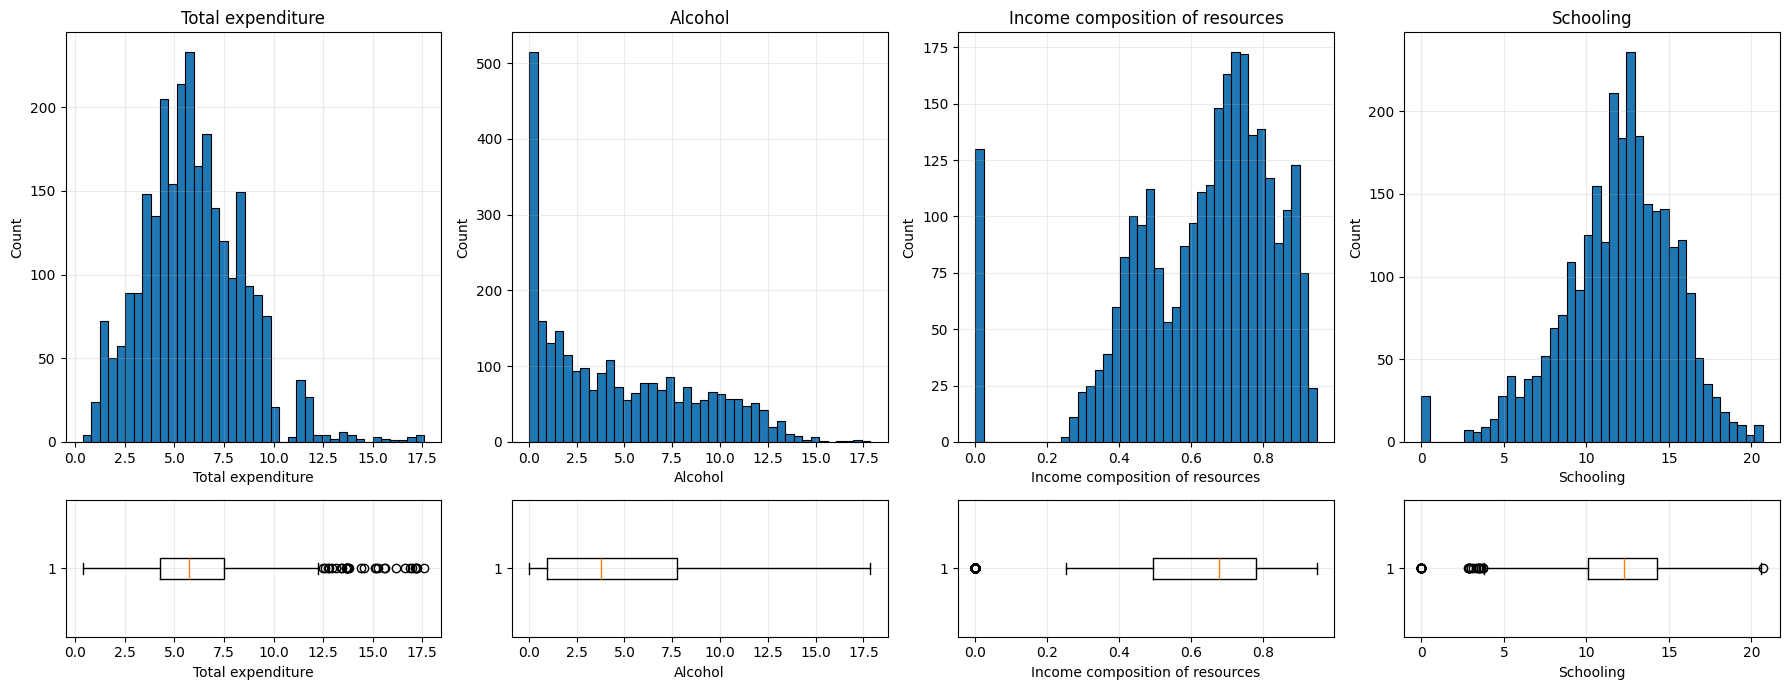

In [277]:
n = len(cols)
fig, axes = plt.subplots(
    nrows=2, ncols=n,
    figsize=(4.5*n, 7),
    gridspec_kw={"height_ratios": [3, 1]}
)

for i, col in enumerate(cols):
    x = dataframe[col].dropna()

    ax_h = axes[0, i]
    ax_h.hist(x, bins=40, edgecolor="black", linewidth=0.8)
    ax_h.set_title(col)
    ax_h.set_xlabel(col)
    ax_h.set_ylabel("Count")
    ax_h.grid(True, alpha=0.25)

    ax_b = axes[1, i]
    ax_b.boxplot(x, vert=False)
    ax_b.set_xlabel(col)
    ax_b.grid(True, alpha=0.25)

plt.tight_layout()
plt.show()

`Total expenditure`: najviše vrednosti je oko sredine (~4–8), ali ima rep ka većim vrednostima (outlieri).

`Alcohol`: jako asimetrično,  mnogo malih vrednosti i dugačak rep ka većim (outlieri).

`Income composition of resources`: većina je u višem opsegu, uz nekoliko vrlo niskih vrednosti (outlieri).

`Schooling`: zvonastog oblika, ali ima par ekstremno niskih i visokih vrednosti.

In [278]:
c = "Total expenditure"
s = dataframe[c].dropna()

s.describe(percentiles=[.01,.05,.25,.5,.75,.95,.99])

count    2710.000000
mean        5.938594
std         2.498713
min         0.370000
1%          1.230900
5%          1.930000
25%         4.260000
50%         5.755000
75%         7.497500
95%         9.760000
99%        12.927400
max        17.600000
Name: Total expenditure, dtype: float64

Raspodela ima rep ka većim vrednostima, što znači da postoji manji broj veoma velikih vrednosti tj. outliera.

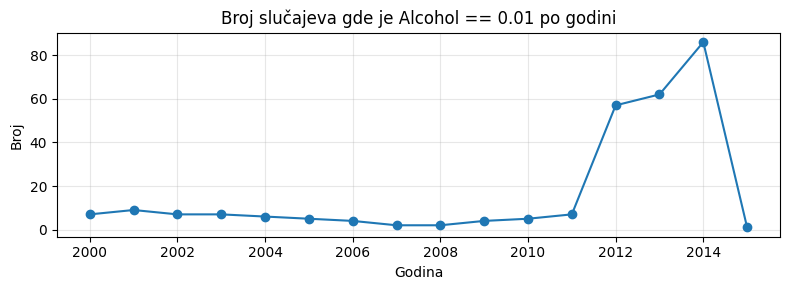

In [279]:
counts = dataframe.groupby("Year")["Alcohol"].apply(lambda s: (s == 0.01).sum()).sort_index()

plt.figure(figsize=(8,3))
plt.plot(counts.index, counts.values, marker="o")
plt.title("Broj slučajeva gde je Alcohol == 0.01 po godini")
plt.xlabel("Godina")
plt.ylabel("Broj")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

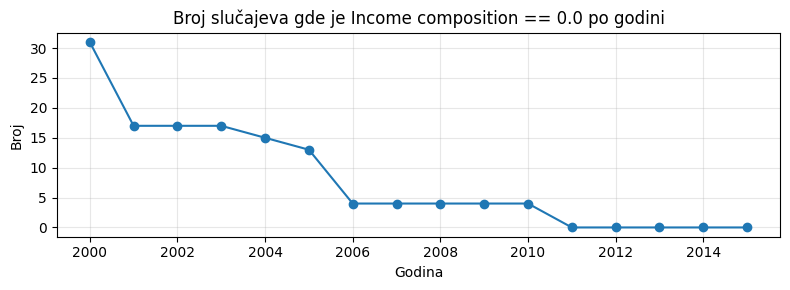

In [280]:
ic = "Income composition of resources"
counts = dataframe.groupby("Year")[ic].apply(lambda s: (s == 0.0).sum()).sort_index()

plt.figure(figsize=(8,3))
plt.plot(counts.index, counts.values, marker="o")
plt.title("Broj slučajeva gde je Income composition == 0.0 po godini")
plt.xlabel("Godina")
plt.ylabel("Broj")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

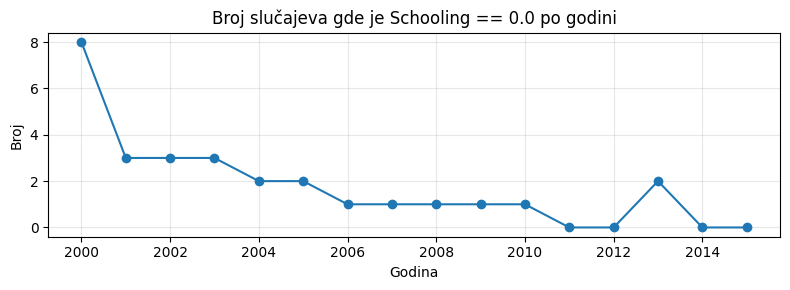

In [281]:
counts = dataframe.groupby("Year")["Schooling"].apply(lambda s: (s == 0.0).sum()).sort_index()

plt.figure(figsize=(8,3))
plt.plot(counts.index, counts.values, marker="o")
plt.title("Broj slučajeva gde je Schooling == 0.0 po godini")
plt.xlabel("Godina")
plt.ylabel("Broj")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Vidimo da kroz godine postoji značajan broj zapisa sa tačno 0.01 ili 0.0, što ukazuje na nedoslednosti u unosu i da su te vrednosti verovatno korišćene kao placeholder.

In [282]:
df_clean = dataframe.copy()

col_alcohol = "Alcohol"
col_income = "Income composition of resources"
col_school = "Schooling"

cols = [col_alcohol, col_income, col_school]

df_clean.loc[df_clean[col_alcohol] == 0.01, col_alcohol] = np.nan
df_clean.loc[df_clean[col_income]  == 0.0,  col_income]  = np.nan
df_clean.loc[df_clean[col_school]  == 0.0,  col_school]  = np.nan


In [283]:
df_clean = df_clean.sort_values(["Country", "Year"])

for c in cols:
    df_clean[c] = df_clean.groupby("Country")[c].transform(
        lambda s: s.fillna(s.median()) if s.notna().any() else s
    )

    df_clean[c] = df_clean[c].fillna(df_clean[c].median())

In [284]:
col = "Total expenditure"

df_clean[col] = df_clean.groupby("Country")[col].transform(
    lambda s: s.fillna(s.median()) if s.notna().any() else s
)
df_clean[col] = df_clean[col].fillna(df_clean[col].median())

Vrednosti 0.0 i 0.01 pretvaramo u NaN da ne kvare statistiku. Zatim popunjavamo preostale rupe medijanom (prvo po državi, a zatim globalno), jer su raspodele često asimetrične i medijana je stabilnija i manje osetljiva na outliere od proseka.

In [285]:
dataframe = df_clean

In [286]:
cols = ["BMI","thinness 10-19 years","thinness 5-9 years",
        "Diphtheria","Polio","Adult Mortality","Life expectancy"]

for c in cols:
    dataframe[c] = pd.to_numeric(dataframe[c])

In [287]:
kolone = ["BMI", "thinness 10-19 years", "thinness 5-9 years", "Diphtheria", "Polio"]

for kol in kolone:
    df = dataframe[["Country", "Year", kol]].dropna().sort_values(["Country", "Year"]).copy()

    df["skok_po_godini"] = df.groupby("Country")[kol].diff().abs()

    prag = df["skok_po_godini"].quantile(0.99)

    top = df[df["skok_po_godini"] > prag].sort_values("skok_po_godini", ascending=False).head(10)

    print(f"\n{kol}:")
    print(f"Prag (99. percentil skoka): {prag:.3f}")
    print(top[["Country", "Year", kol, "skok_po_godini"]].to_string(index=False))


BMI:
Prag (99. percentil skoka): 54.600
             Country  Year  BMI  skok_po_godini
            Kiribati  2004 71.4            63.8
               Tonga  2008 71.5            63.7
              Kuwait  2015 71.4            63.6
               Samoa  2008 71.4            63.5
               Samoa  2006  7.3            62.4
               Tonga  2006  7.1            62.3
              Kuwait  2013  7.2            62.3
            Kiribati  2003  7.6            62.1
United Arab Emirates  2014 62.4            55.9
             Tunisia  2015 61.2            55.0

thinness 10-19 years:
Prag (99. percentil skoka): 8.800
     Country  Year  thinness 10-19 years  skok_po_godini
    Pakistan  2007                   2.8            18.2
    Pakistan  2012                  19.8            17.8
 Afghanistan  2002                  19.9            17.8
  Bangladesh  2005                  19.9            17.8
South Africa  2006                   1.6            10.0
     Namibia  2009              

Ovi rezultati izdvajaju najneuobičajenije promene iz godine u godinu (iznad 99. percentila) i koriste se za detekciju potencijalnih grešaka/anomalija u podacima. Kod **BMI** se vide ekstremni skokovi (npr. sa 7 na 71 u jednoj godini), što je praktično nerealno i verovatno posledica pogrešnog unosa ili skaliranja. Kod **thinness 10–19 years** postoje veliki skokovi od 15–18 poena, koji takođe deluju sumnjivo i treba ih dodatno proveriti.

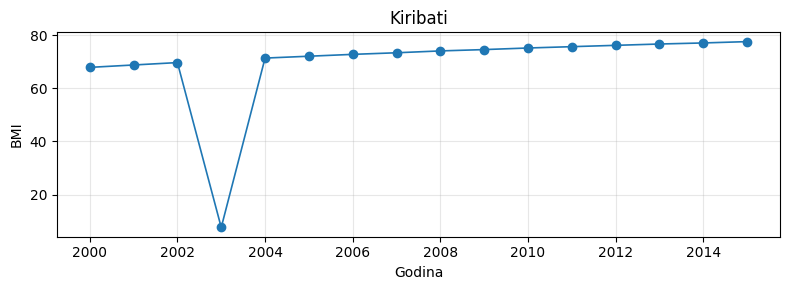

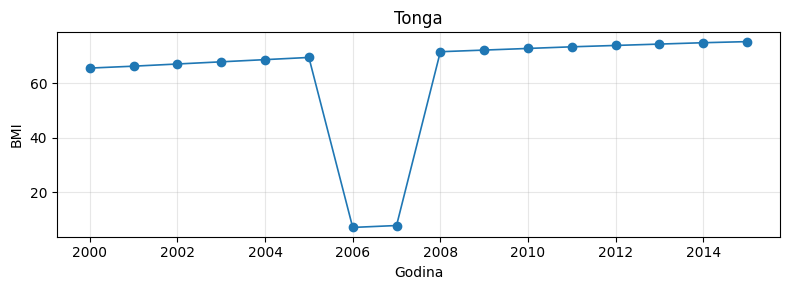

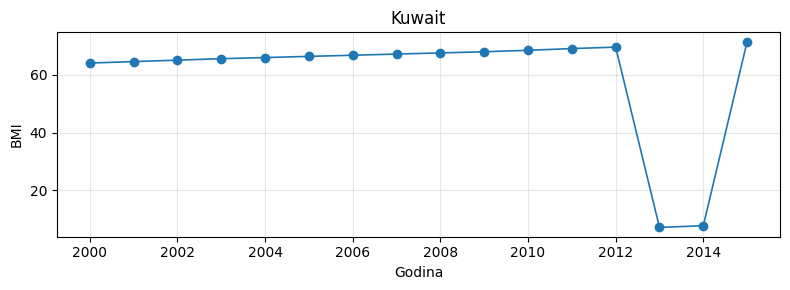

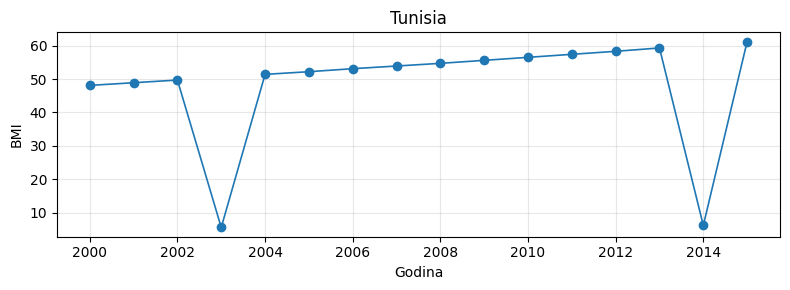

In [288]:
spike_countries = ["Kiribati", "Tonga", "Kuwait", "Tunisia"]

tmp = dataframe.loc[dataframe["Country"].isin(spike_countries), ["Country", "Year", "BMI"]].copy()
tmp["BMI"] = pd.to_numeric(tmp["BMI"], errors="coerce")

for country in spike_countries:
    s = tmp[tmp["Country"] == country].dropna(subset=["BMI"]).sort_values("Year")

    plt.figure(figsize=(8,3))
    plt.plot(s["Year"], s["BMI"], marker="o", linewidth=1.2)
    plt.title(country)
    plt.xlabel("Godina")
    plt.ylabel("BMI")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

BMI je očigledno zagađen nekonzistentnim i nerealnim vrednostima, pa ga nećemo koristiti u daljoj analizi, umesto pokušaja korekcije, najbezbednije je da tu kolonu jednostavno drop-ujemo.

In [289]:
dataframe = dataframe.drop(columns=["BMI"], errors="ignore")

Kolonu “thinness 5-9 years” izbacujemo jer je veoma snažno korelisana sa “thinness 10-19 years”, pa praktično nosi istu informaciju i samo uvodi redundantnost u analizi.

In [290]:
dataframe = dataframe.drop(columns=["thinness 5-9 years"], errors="ignore")

In [291]:
for c in ["Polio", "Diphtheria"]:
    dataframe[c] = pd.to_numeric(dataframe[c])
    dataframe[c] = dataframe[c].clip(0, 100)

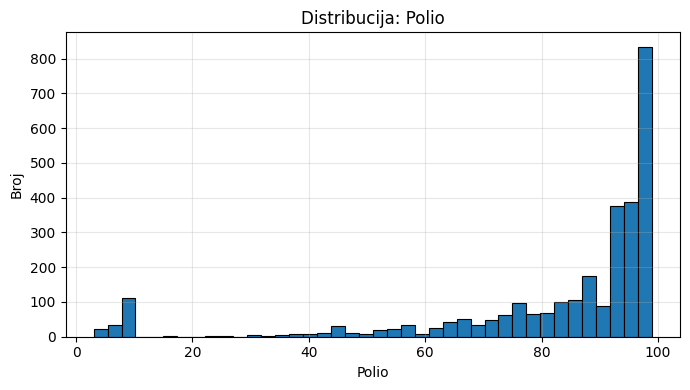

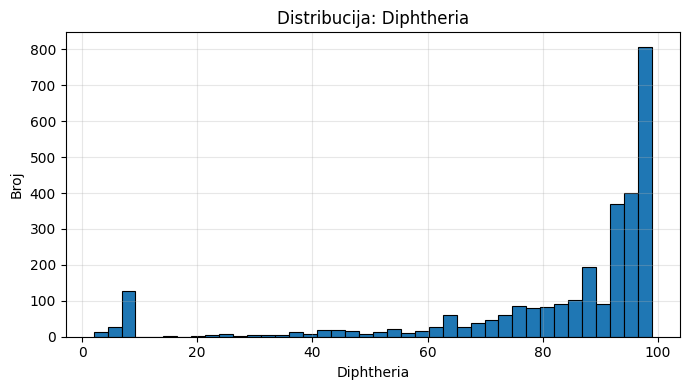

In [292]:
cols = ["Polio", "Diphtheria"]


for c in cols:
    x = dataframe[c].dropna()

    plt.figure(figsize=(7,4))
    plt.hist(x, bins=40, edgecolor="black", linewidth=0.8)
    plt.title(f"Distribucija: {c}")
    plt.xlabel(c)
    plt.ylabel("Broj")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

In [293]:
kolone = ["Polio", "Diphtheria"]

for kol in kolone:
    x = dataframe[kol]

    ukupno = x.notna().sum()
    ispod_10 = (x < 10).sum()
    nula = (x == 0).sum()

    print(f"\n{kol}:")
    print(f"Opseg vrednosti: {x.min():.1f} – {x.max():.1f}")
    print(f"Vrednosti < 10:  {ispod_10}/{ukupno} ({ispod_10/ukupno*100:.2f}%)")
    print(f"Vrednosti = 0:   {nula}")


Polio:
Opseg vrednosti: 3.0 – 99.0
Vrednosti < 10:  167/2901 (5.76%)
Vrednosti = 0:   0

Diphtheria:
Opseg vrednosti: 2.0 – 99.0
Vrednosti < 10:  166/2901 (5.72%)
Vrednosti = 0:   0


In [294]:
cols_show = ["Country", "Year", "Polio", "Diphtheria", "Status"]

low_polio = dataframe.loc[
    dataframe["Polio"] < 10,
    cols_show
].copy()
low_polio["Polio"] = low_polio["Polio"]

print(low_polio.sort_values(["Polio", "Country", "Year"]).head(40).to_string(index=False))


                         Country  Year  Polio  Diphtheria     Status
                          Angola  2000    3.0        28.0 Developing
                            Chad  2000    3.0        36.0 Developing
                            Chad  2008    3.0        19.0 Developing
Democratic Republic of the Congo  2001    3.0         3.0 Developing
               Equatorial Guinea  2012    3.0        24.0 Developing
               Equatorial Guinea  2013    3.0         3.0 Developing
                          Angola  2003    4.0         4.0 Developing
                          Angola  2004    4.0         4.0 Developing
        Central African Republic  2001    4.0         4.0 Developing
                            Chad  2011    4.0        33.0 Developing
Democratic Republic of the Congo  2002    4.0        38.0 Developing
                           Niger  2011    4.0        75.0 Developing
                         Nigeria  2002    4.0        25.0 Developing
                     Afghanistan  

In [295]:
low_diph = dataframe.loc[
    dataframe["Diphtheria"]< 10,
    cols_show
].copy()
low_diph["Diphtheria"] = low_diph["Diphtheria"]

print(low_diph.sort_values(["Diphtheria", "Country", "Year"]).head(40).to_string(index=False))

                           Country  Year  Polio  Diphtheria     Status
                 Equatorial Guinea  2014   24.0         2.0 Developing
  Democratic Republic of the Congo  2001    3.0         3.0 Developing
                 Equatorial Guinea  2013    3.0         3.0 Developing
                          Ethiopia  2000   55.0         3.0 Developing
                            Angola  2003    4.0         4.0 Developing
                            Angola  2004    4.0         4.0 Developing
          Central African Republic  2001    4.0         4.0 Developing
                              Chad  2006   49.0         4.0 Developing
                              Chad  2012   51.0         4.0 Developing
  Democratic Republic of the Congo  2000   42.0         4.0 Developing
                 Equatorial Guinea  2006   52.0         4.0 Developing
                          Ethiopia  2004   54.0         4.0 Developing
                           Nigeria  2006   46.0         4.0 Developing
      

In [296]:
df2 = dataframe.sort_values(["Country", "Year"]).copy()

for col in ["Polio", "Diphtheria"]:
    df2[col] = pd.to_numeric(df2[col])

    df2[col] = df2.groupby("Country")[col].transform(lambda s: s.interpolate(limit_direction="both"))

    df2[col] = df2.groupby("Country")[col].transform(
        lambda s: s.fillna(s.median()) if s.notna().any() else s
    )

    df2[col] = df2[col].fillna(df2[col].median())
    
dataframe = df2

Polio i Diphtheria nemaju placeholder nule i većinom su u realnom opsegu, pa ekstremno niske vrednosti verovatno predstavljaju stvarno nisku pokrivenost u pojedinim državama/godinama. Nedostajuće vrednosti smo popunili po državi kroz vreme (interpolacija), uz fallback na medijanu države i globalnu medijanu, čime smo smanjili missing bez agresivnog izobličavanja podataka.

Nedostajuce vrednosti % za 'thinness 10-19 years': 1.16%
count    2886.000000
mean        4.829522
std         4.428383
min         0.100000
25%         1.600000
50%         3.300000
75%         7.175000
max        27.700000
Name: thinness 10-19 years, dtype: float64


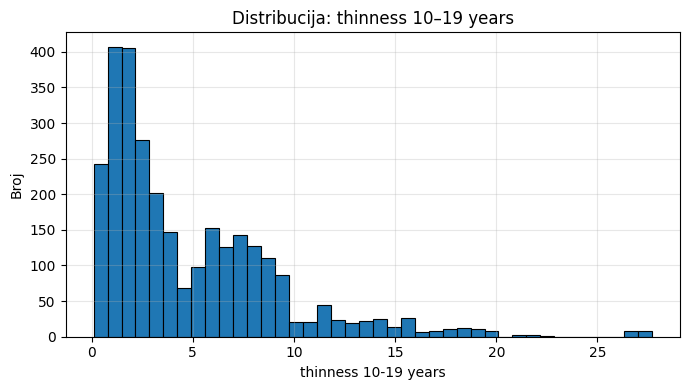

In [297]:
col = "thinness 10-19 years"
col = "thinness 10-19 years"
dataframe[col] = pd.to_numeric(dataframe[col])

miss = dataframe[col].isna().mean() * 100
desc = dataframe[col].describe()
print(f"Nedostajuce vrednosti % za '{col}': {miss:.2f}%")
print(desc)

plt.figure(figsize=(7,4))
plt.hist(dataframe[col].dropna(), bins=40, edgecolor="black", linewidth=0.8)
plt.title("Distribucija: thinness 10–19 years")
plt.xlabel(col)
plt.ylabel("Broj")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [298]:
df_sorted = dataframe.sort_values(["Country", "Year"]).copy()
df_sorted[col] = pd.to_numeric(df_sorted[col])

tmp = df_sorted[["Country", "Year", col]].dropna().copy()
tmp["skok_po_godini"] = tmp.groupby("Country")[col].diff().abs()

prag = tmp["skok_po_godini"].quantile(0.99)
spikes = tmp[tmp["skok_po_godini"] > prag].sort_values("skok_po_godini", ascending=False)

print("Top 25 skokova:")
print(spikes.head(25).to_string(index=False))

Top 25 skokova:
                         Country  Year  thinness 10-19 years  skok_po_godini
                        Pakistan  2007                   2.8            18.2
                        Pakistan  2012                  19.8            17.8
                     Afghanistan  2002                  19.9            17.8
                      Bangladesh  2005                  19.9            17.8
                    South Africa  2006                   1.6            10.0
                         Namibia  2009                   1.9             9.6
                        Botswana  2003                   1.9             9.5
                         Lesotho  2002                   1.6             9.5
                        Zimbabwe  2001                   1.6             9.4
                           Niger  2010                   1.7             9.3
                    Burkina Faso  2003                   1.7             9.3
                         Nigeria  2012                   1.7

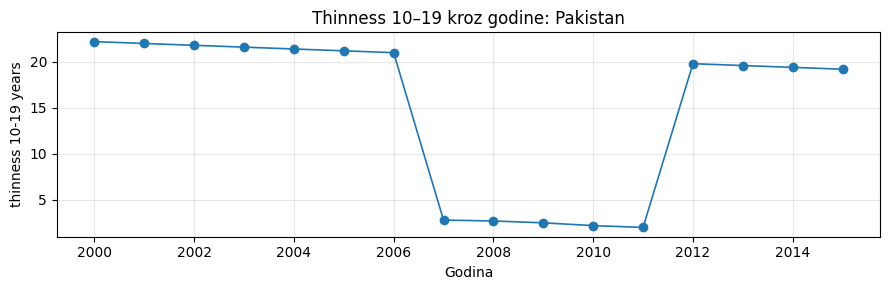

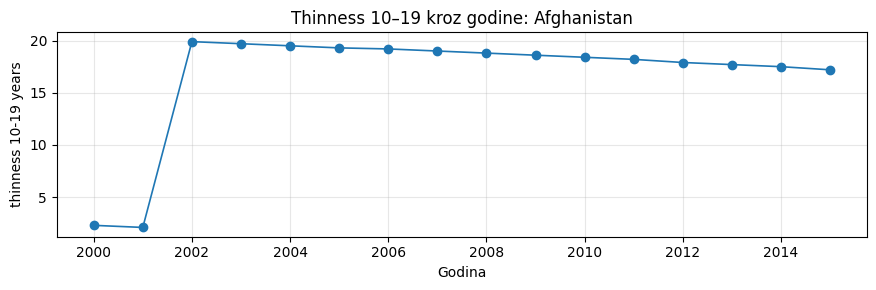

In [299]:
for country in spikes["Country"].head(3).unique():
    s = df_sorted[df_sorted["Country"] == country][["Year", col]].dropna().sort_values("Year")

    plt.figure(figsize=(9,3))
    plt.plot(s["Year"], s[col], marker="o", linewidth=1.2)
    plt.title(f"Thinness 10–19 kroz godine: {country}")
    plt.xlabel("Godina")
    plt.ylabel(col)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

In [300]:
df_thin = dataframe.sort_values(["Country", "Year"]).copy()
df_thin[col] = pd.to_numeric(df_thin[col], errors="coerce")

df_thin.loc[(df_thin[col] < 0) | (df_thin[col] > 50), col] = np.nan

df_thin[col] = df_thin.groupby("Country")[col].transform(
    lambda s: s.interpolate(limit_direction="both")
)

df_thin[col] = df_thin.groupby("Country")[col].transform(
    lambda s: s.fillna(s.median()) if s.notna().any() else s
)

df_thin[col] = df_thin[col].fillna(df_thin[col].median())

dataframe = df_thin

Nismo dirali postojeće vrednosti jer bez dodatne provere ne možemo pouzdano znati da li su nagli skokovi greška ili realna promena; svaka korekcija bi mogla da unese veći bias od same anomalije.Zbog toga smo popunjavali samo nedostajuće vrednosti, a observed podatke ostavili netaknute.

In [301]:
dataframe = dataframe.drop(columns=["Adult Mortality"], errors="ignore")

In [302]:
y = "Life expectancy"
dataframe[y] = pd.to_numeric(dataframe[y])

missing = dataframe[dataframe[y].isna()]
print("Missing Life expectancy rows:", len(missing))

Missing Life expectancy rows: 8


In [303]:
countries = missing["Country"].value_counts()

print("Države sa nedostajućim vrednostima za Life expectancy:", len(countries))
print(countries.head(10))

Države sa nedostajućim vrednostima za Life expectancy: 8
Country
Dominica                 1
Marshall Islands         1
Monaco                   1
Nauru                    1
Palau                    1
Saint Kitts and Nevis    1
San Marino               1
Tuvalu                   1
Name: count, dtype: int64


In [304]:
dataframe = dataframe[dataframe["Life expectancy"].notna()].copy()

Pošto je Life expectancy ciljna promenljiva u analizi, redovi gde ona nedostaje ne mogu da se koriste, pa ih uklanjamo da bismo radili sa validnim podacima.

# IZUZECI

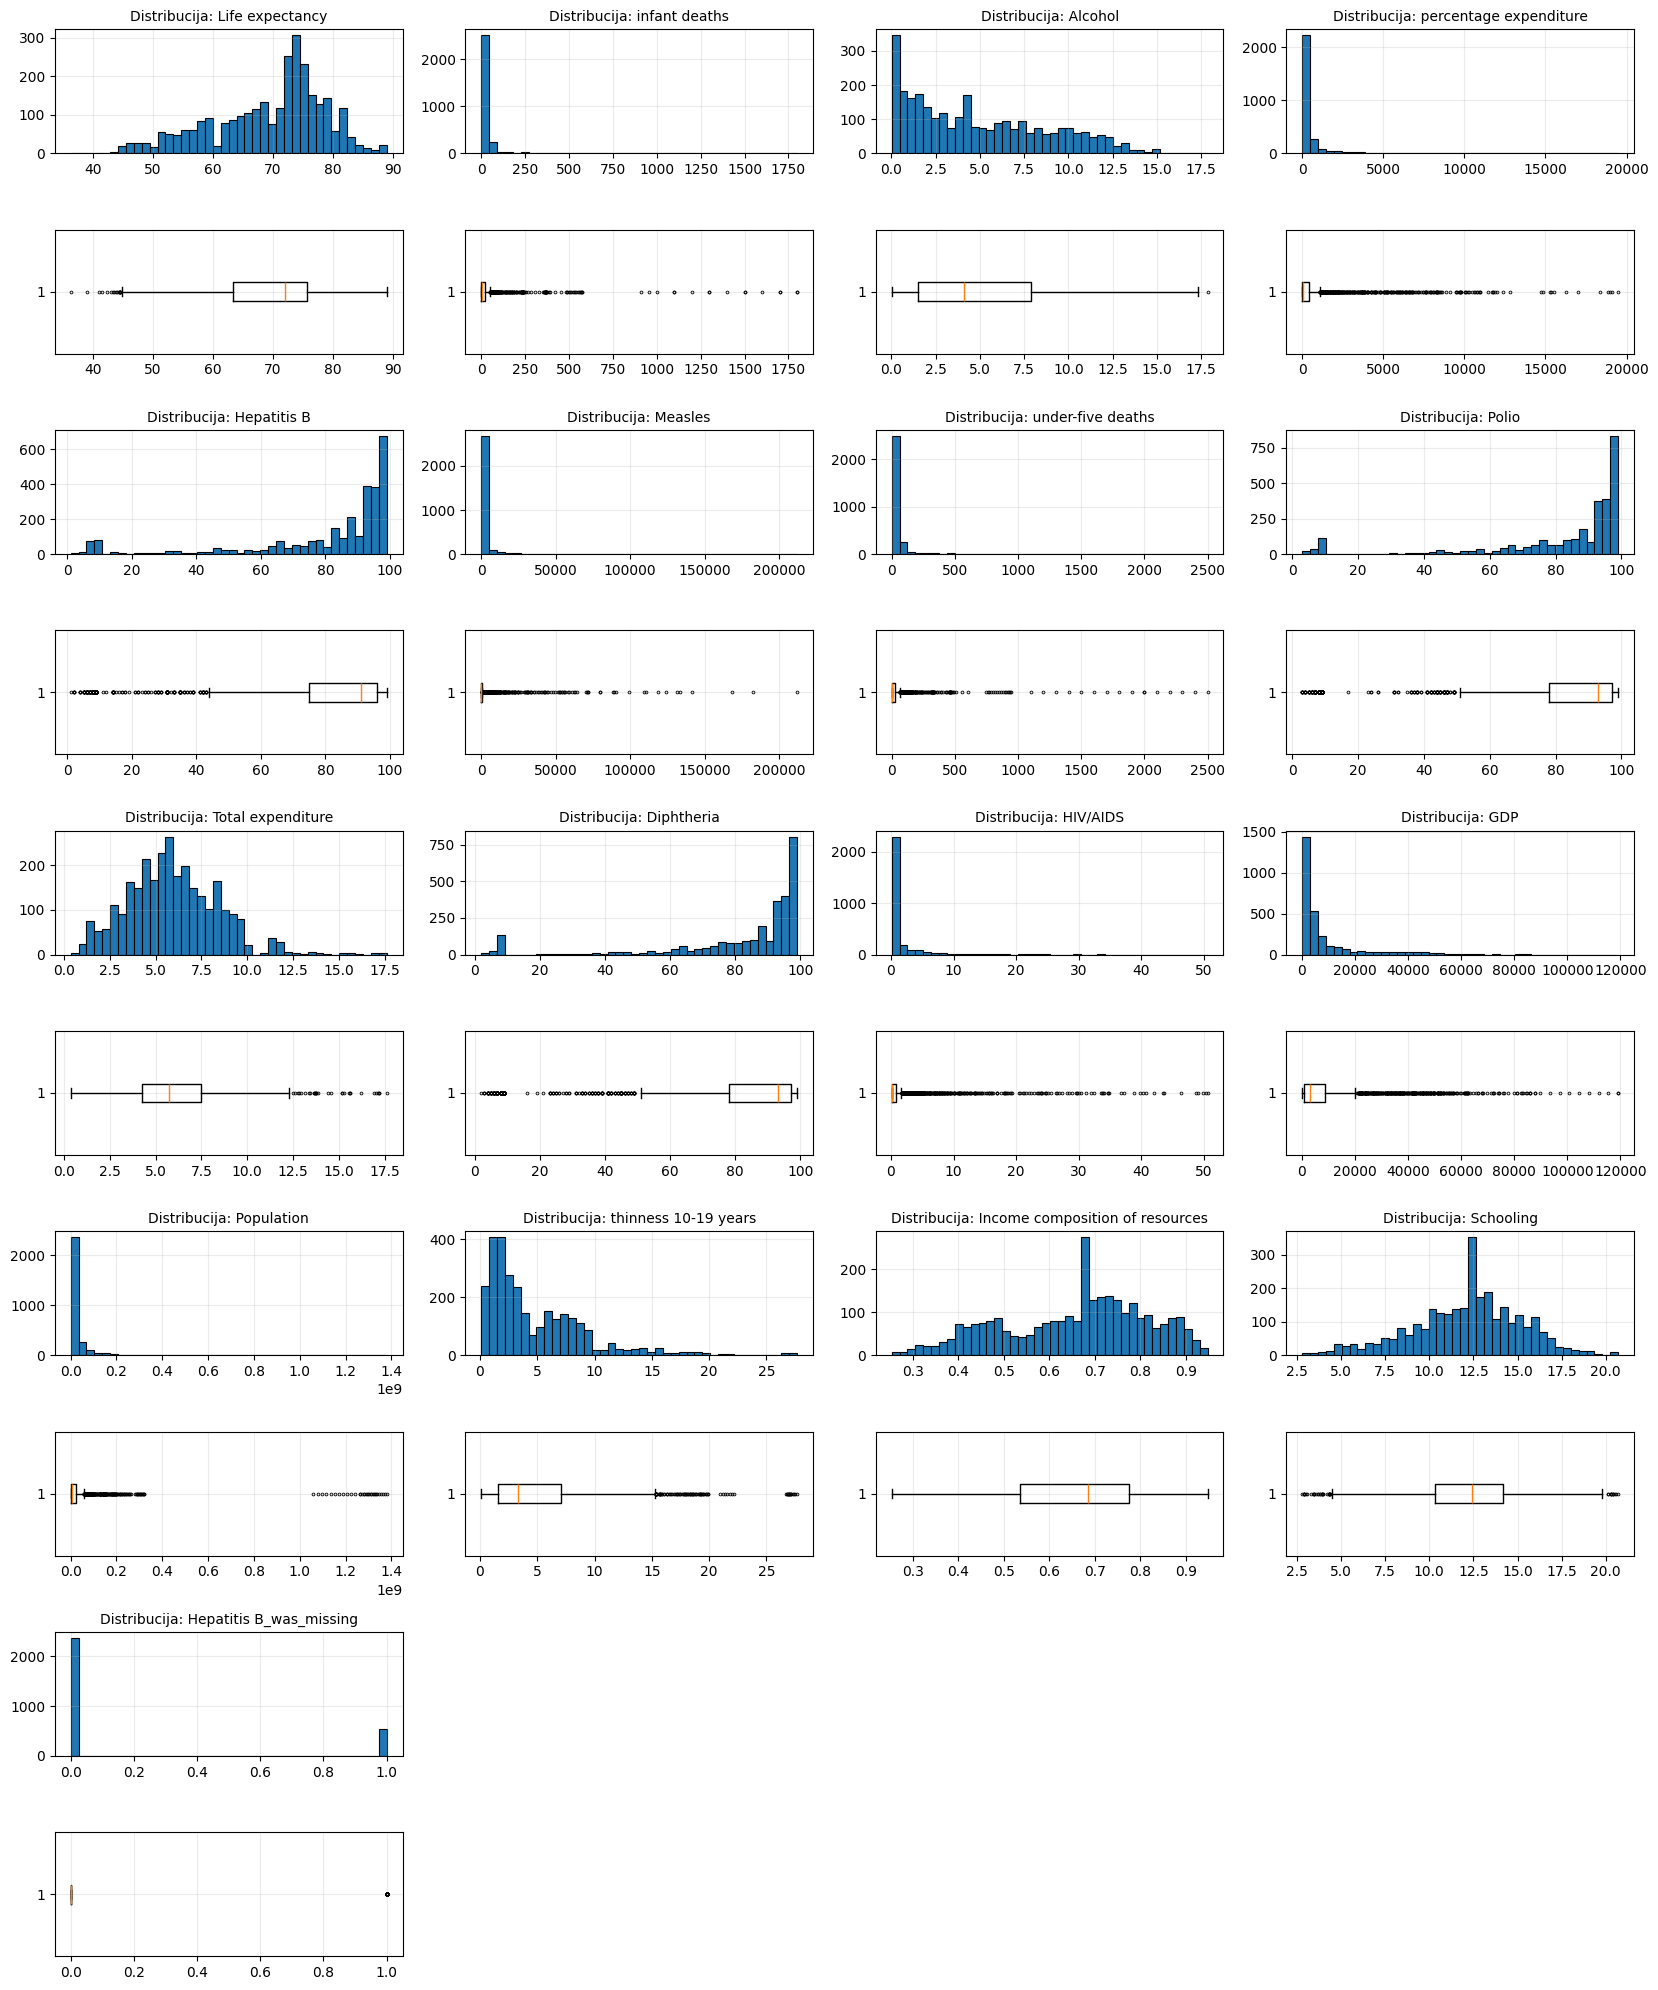

In [305]:
num_cols = dataframe.select_dtypes(include=[np.number]).columns.tolist()
if "Year" in num_cols:
    num_cols.remove("Year")

n = len(num_cols)
cols = 4
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows*2, cols, figsize=(cols*4.2, rows*4.0))
axes = axes.reshape(rows*2, cols)

for i, c in enumerate(num_cols):
    r, k = (i // cols)*2, i % cols
    x = pd.to_numeric(dataframe[c], errors="coerce").dropna()

    ax = axes[r, k]
    ax.hist(x, bins=40, edgecolor="black", linewidth=0.8)
    ax.set_title(f"Distribucija: {c}", fontsize=10)
    ax.grid(True, alpha=0.25)

    ax2 = axes[r+1, k]
    ax2.boxplot(x, vert=False,
                flierprops=dict(marker="o", markersize=2, markerfacecolor="none",
                                markeredgecolor="black", markeredgewidth=0.6))
    ax2.grid(True, alpha=0.25)

for j in range(i+1, rows*cols):
    fig.delaxes(axes[(j//cols)*2, j%cols])
    fig.delaxes(axes[(j//cols)*2+1, j%cols])

plt.tight_layout()
plt.show()

In [306]:
print("PRE:")

print((dataframe[["Alcohol","Total expenditure"]]
       .describe(percentiles=[.01,.99])).T[["min","1%","50%","99%","max"]])

PRE:
                    min      1%   50%      99%    max
Alcohol            0.02  0.0200  4.13  13.9345  17.87
Total expenditure  0.37  1.2522  5.73  12.5879  17.60


In [307]:
def set_outside_nan(col, lo, hi):
    if col in dataframe.columns:
        x = pd.to_numeric(dataframe[col], errors="coerce")
        before_nan = x.isna().sum()
        bad = (x < lo) | (x > hi)
        dataframe[col] = x.mask(bad, np.nan)
        after_nan = dataframe[col].isna().sum()
        print(f"{col}: van [{lo},{hi}] -> dodato NaN = {after_nan - before_nan}")

def clip_pct(col, lo=0.01, hi=0.99):
    if col in dataframe.columns:
        x = dataframe[col].dropna()
        qlo, qhi = x.quantile(lo), x.quantile(hi)

        before = dataframe[col].copy()
        dataframe[col] = dataframe[col].clip(qlo, qhi)

        changed = (before != dataframe[col]).sum()
        print(f"{col}: clip {lo:.0%}-{hi:.0%} na [{qlo:.3f}, {qhi:.3f}] -> promenjeno = {int(changed)}")

for c in ["Hepatitis B", "Polio", "Diphtheria"]:
    set_outside_nan(c, 0, 100)

set_outside_nan("Income composition of resources", 0, 1)
set_outside_nan("Schooling", 0, 25)
set_outside_nan("Alcohol", 0, 100)
set_outside_nan("Total expenditure", 0, 100)

for c in ["Alcohol", "Total expenditure"]:
    clip_pct(c, 0.01, 0.99)

Hepatitis B: van [0,100] -> dodato NaN = 0
Polio: van [0,100] -> dodato NaN = 0
Diphtheria: van [0,100] -> dodato NaN = 0
Income composition of resources: van [0,1] -> dodato NaN = 0
Schooling: van [0,25] -> dodato NaN = 0
Alcohol: van [0,100] -> dodato NaN = 0
Total expenditure: van [0,100] -> dodato NaN = 0
Alcohol: clip 1%-99% na [0.020, 13.934] -> promenjeno = 30
Total expenditure: clip 1%-99% na [1.252, 12.588] -> promenjeno = 60


In [308]:
print("\nPOSLE:")
print((dataframe[["Alcohol","Total expenditure"]]
       .describe(percentiles=[.01,.99])).T[["min","1%","50%","99%","max"]])


POSLE:
                      min        1%   50%        99%      max
Alcohol            0.0200  0.020000  4.13  13.929605  13.9345
Total expenditure  1.2522  1.254158  5.73  12.577131  12.5879


Ekstremne vrednosti u WHO podacima nisu nužno greške; prvo uklanjamo nemoguće vrednosti, a zatim “odsečemo” retke ekstremno velike vrednosti na razuman maksimum/minimum (npr. 1–99 percentil) umesto da brišemo redove, da ne izgubimo podatke i da ekstremi ne vuku regresiju.

In [309]:
print("Ukupno NaN ćelija:", int(dataframe.isna().sum().sum()))

Ukupno NaN ćelija: 0


# Feature Engineering

Feature Engineering je metoda koju primenjujemo nad podacima posmatranog skupa podataka. Ideja je da se kroz kombinovanje, transformaciju ili restrukturiranje postojećih promenljivih izvuče dodatna informacija koja nije eksplicitno sadržana u originalnim podacima. Formiranjem novih promenljivih omogućavamo modelu da lakše prepozna obrasce i odnose u podacima, čime se može poboljšati prediktivna moć modela.

Pre nego što započnemo preformulisanje naših promenljivih, sagledajmo koje promenljive dataseta smo ostavili (Prethodno smo izbacili "BMI" zbog velikih nelogičnosti, kao i "thinness 1-9 years" usled idetnične korelacije i raspodele sa drugom thinness promenljivom)

In [310]:
dataframe.head()

Country  Year      Status  Life expectancy  infant deaths  Alcohol  \
15  Afghanistan  2000  Developing             54.8             88     0.02   
14  Afghanistan  2001  Developing             55.3             88     0.02   
13  Afghanistan  2002  Developing             56.2             88     0.02   
12  Afghanistan  2003  Developing             56.7             87     0.02   
11  Afghanistan  2004  Developing             57.0             87     0.02   

    percentage expenditure  Hepatitis B  Measles  under-five deaths  ...  \
15               10.424960         62.0     6532                122  ...   
14               10.574728         63.0     8762                122  ...   
13               16.887351         64.0     2486                122  ...   
12               11.089053         65.0      798                122  ...   
11               15.296066         67.0      466                120  ...   

    Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
15               8.20        24.0       0.1  114.560000  20130327.0   
14               7.80        33.0       0.1  117.496980  20284307.0   
13               7.76        36.0       0.1  187.845950  21378117.0   
12               8.82        41.0       0.1  198.728544  22733049.0   
11               8.79         5.0       0.1  219.141353  23560654.0   

    thinness 10-19 years  Income composition of resources  Schooling  \
15                   2.3                            0.338        5.5   
14                   2.1                            0.340        5.9   
13                  19.9                            0.341        6.2   
12                  19.7                            0.373        6.5   
11                  19.5                            0.381        6.8   

     Country_wb Hepatitis B_was_missing  
15  Afghanistan                       0  
14  Afghanistan                       0  
13  Afghanistan                       0  
12  Afghanistan                       0  
11  Afghanistan                       0  

[5 rows x 21 columns]

Najpre, pošto smo sagledali ogromnu značajnost promenljive Status gde nam je što empirijski poznato što zbog domenskog znanja da stanovnici razvijene Zemlje imaju duži životni vek, te ćemo ovu promenljivu kodirati u True i False labele.

In [311]:
dataframe = pd.get_dummies(
    dataframe,
    columns=["Status"],
    drop_first=True
)


In [312]:
dataframe["Status_Developing"] = dataframe["Status_Developing"].astype(int)

Zatim možemo posmatrati pokrivenost imunizacije po državama, pošto promenljive "Diphteria", "Polio" i "Hepatitis B" sve predstavljaju procentualnu imunizaciju gradjana, možemo uzeti prosek ovih promenljivih i tako ih posmatrati na nivou države.

In [313]:
dataframe["immunization_index"] = (
    dataframe["Hepatitis B"] +
    dataframe["Polio"] +
    dataframe["Diphtheria"]
) / 3

Takodje iz ranije prikazanih grafova, činio se kao očigledno dobar izbor da se više promenljivih predstave preko logaritamskih transformacija. Promenljive koje su se činile kao veoma dobar izbor za ovo, iz razloga što je njihova raspodela bila jako desno asimetrična (većina podataka se grupisalo u klaster sa leve strane), su "GDP", "infant deaths", "HIV/AIDS".

In [314]:
features_log = ["GDP","HIV/AIDS","infant deaths"]

for feature in features_log:
    dataframe[f"log_{feature}"] = np.log1p(dataframe[feature])

<span style="color:green"> Na osnovu zaključaka donetih iz EDA, možemo oformiti interakciju izmedju promenljivih `Percentage Expenditure` i `log(GDP)`, čime bi naznačili da na primer, 10% izdvojenog novca na zdravstvo u bogatoj državi, nije jednako sa 10% izdvojenog novca u siromašnoj državi. </span>

In [315]:
#Na svakom mestu gde vidite zelene komentare i ispod njih kod, taj kod je ili izmenjen ili dodat u celosti

dataframe["health_spending"] = dataframe["percentage expenditure"] * dataframe["log_GDP"]

<span style="color:green"> Zatim želimo da iskombinujemo promenljive `under_five_deaths` i `immunization_index` kako bismo sagledali da li pokrivenost vakcinacije kod dece utice na njihov mortalitet. Ideja je da se utvrdi da li zemlje sa višom stopom imunizacije imaju slabiji negativni uticaj dečijeg mortaliteta na očekivani životni vek. </span>

In [316]:
dataframe["under_five_vaccination"] = dataframe["under-five deaths"] * (1 - dataframe["immunization_index"])

<span style="color:green"> Pri izračunavanju nove promenljive, oduzimali smo immunization index sa 1 kako bismo dobili obrnutu interakciju, to jest, ako je imunizacija 100% onda je interakcija 0 i obrnuto. </span>

<span style="color:green"> Takodje, možemo iskoristiti i `thinness` promenljivu uparenu sa `Income composition of resources` kako bismo dobili malnutrition_index. Ovaj index predstavlja brojačnu reprezentaciju uhranjenosti države, što je index veći, država je manje uhranjena. </span>

In [317]:
dataframe["malnutrition_index"] = dataframe["thinness 10-19 years"]  * (1 - dataframe["Income composition of resources"] )

<span style="color:green"> Pošto su vrednosti za `Income composition of resources` od 0-1, takodje smo oduzimali i ovu varijablu sa 1 kako bismo istim postupom dobili odnos gde je za: </span>

- <span style="color:green"> Visok income -> Manji efekat </span>

- <span style="color:green"> Nizak income -> Veći efekat </span>

In [318]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2912 entries, 15 to 2922
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2912 non-null   object 
 1   Year                             2912 non-null   int64  
 2   Life expectancy                  2912 non-null   float64
 3   infant deaths                    2912 non-null   int64  
 4   Alcohol                          2912 non-null   float64
 5   percentage expenditure           2912 non-null   float64
 6   Hepatitis B                      2912 non-null   float64
 7   Measles                          2912 non-null   int64  
 8   under-five deaths                2912 non-null   int64  
 9   Polio                            2912 non-null   float64
 10  Total expenditure                2912 non-null   float64
 11  Diphtheria                       2912 non-null   float64
 12  HIV/AIDS                

# Data preprocessing

Pre nego što se upustimo u feature selection i odabir najboljih promenljivih za naš model, želimo da pretprocesiramo podatke tako da naš model što efikasnije barata sa njima, a ujedno možemo i da raspodelimo podatke na tri skupa:
- `Trening skup` ovo je skup podataka koji model koristi pri treniranju, odnosno skup podataka za koji model pravi predikciju, računa grešku i koriguje se tako što promeni parametre koje koristi pri predikciji.

- `Validacioni skup` ovo je skup podataka koje model koristi da nakon treniranja sagleda koliko je naučio, pravi predikcije i računa metrije nad validacionim skupom kako bi sagledali kako se model ponaša kada vidi nove podatke, ujedno sagledamo razlike metrike nad validacionim i trening skupom kako bi uočili da li postoji overfit.

- `Test skup` ovo je skup podataka koje model vidi kada u potpunosti završi sa treniranjem, to su podaci koje model nikada ranije nije video i služe kao pravo merilo uspešnosti modela.

Pre nego što podelimo naše podatke na ova tri skupa, neophodno je da razdvojimo ciljanu promenljivu "Life expectancy" od trening skupa kako model ne bi imao uvod u ono šta predvidja.

In [319]:
X = dataframe.drop(["Life expectancy","Country"], axis = 1)
y = dataframe["Life expectancy"]

In [320]:
X = X.drop(columns=["Country_wb"])

Prikazom ovih podataka, vidimo da su svi podaci uspešno skalirani normalizacijom. Sada možemo podeliti podatke na train-validation-test skupove.

In [321]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3,random_state=42,stratify=X["Status_Developing"])

X_val,X_test,y_val,y_test = train_test_split(X_temp,y_temp,test_size = 0.5,random_state = 42,stratify=X_temp["Status_Developing"])

Train test split smo odradili sa opcijom *stratify* iza kojeg je ideja da raspodelimo ova dva skupa podataka tako da imaju jednaku proporciju primera gde je status 1/0 odnosno Developing/Developed, takodje uzimamo da veličina testnog skupa bude 20% ukupne veličine skupa podataka.

# Feature Selection i procena modela

Feature Selection predstavlja suštinu celokupnog procesa obavljenog nad skupom podataka. Ovom metodom biramo promenljive koje će model koristiti za predikcije, promenljive biramo na osnovu svih zaključaka koje smo dobili kroz sve prethodne metode, gde je cilj da zadržimo samo releveantne karakteristike uz pomoć kojih model dobija informacije, a da se irelevantne ili visoko korelisane promenljive odbace.

### Matrica korelacije

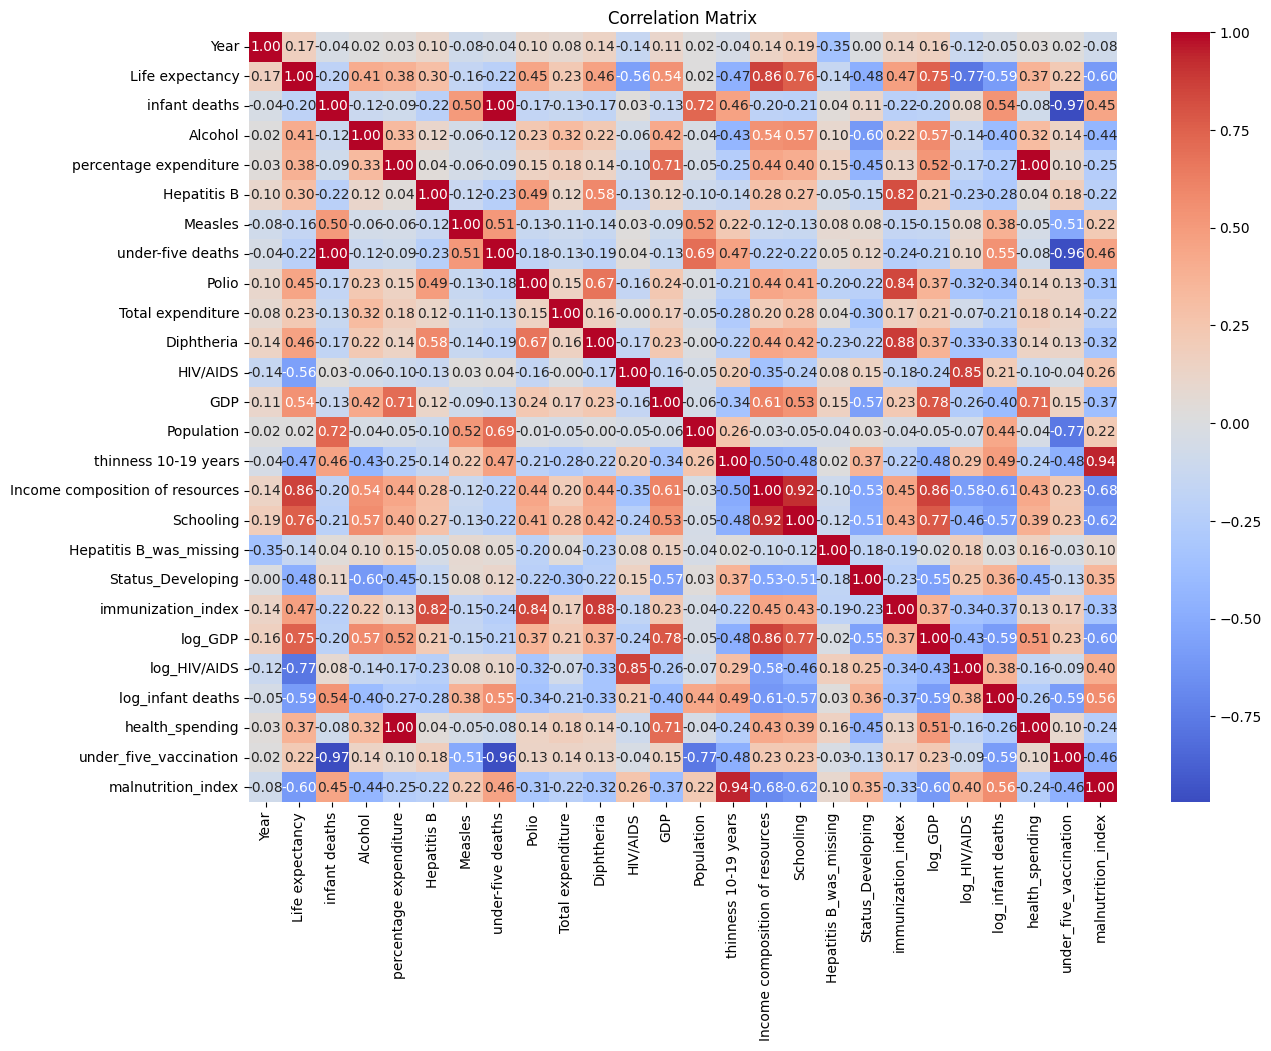

In [322]:
plt.figure(figsize=(14, 10))
numeric_data = dataframe.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Sagledavši matricu korelacije i na osnovu zaključaka sa prethodnih grafova za sledeće promenljive se odlučujemo da se sigurno neće razmatrati u feature selection-u:

- `percentage expenditure`: pošto je u jakoj korelaciji sa GDP-om, što ukazuje na multikolinearnost, dodatno na osnovu domenskog znanja očekujemo da države koje imaju velik GDP imaju i veći life expectancy zato što gradjani žive komfornije živote i pre svega zato što imaju bolji zdravstveni sistem.

- `under-five deaths`: vidimo korelaciju 1, što ukazuje na sigurnu multikolinearnost i znamo da obe promenljive opisuju veoma sličnu stvar (najveći broj preminule dece ispod 5 godina pripada starosnoj dobi novorodjenčadi) koja bi dovela do haosa sa težinama modela.

- `Popultaion`: na osnovu grafika i matrice korelacije (Life Expectancy ~ Population = -0.03) je veoma jasno da korelacija praktično ne postoji. 

- `Income composition of resources`: Gotovo sigurna multikolinearnost sa Schooling, u ovom slučaju možemo izabrati bilo koju od ove dve promenljive, ali biramo Schooling pošto je lakša za interpretaciju.

- `Country`: Pošto ima isuviše jedinstvenih vrednosti ne možemo koristiti ovu promenljivu, primenom one-hot encodinga bi dobili previše novih kolona i zakomplikovali model.

- `Year`: Ne postoji dovoljan broj godina da uhvatimo očigledan trend za države na osnovu godina.

### Forward-selection

Sada ćemo primeniti metodu **forward-selection**. Ideja iza ove metode je da napravimo početni model koji sadrži samo jednu promenljivu za koju smatramo da može objasniti najveći udeo varijabilnosti promenljive "Life expectancy", zatim da propratimo predikcije koje dobijamo takvim modelom i uporediti metrikama *RSE* *MAE* i *R^2*. Promenljive koje koristimo kao prediktore modela će biti isključivo iz EDA koje smo smatrali da dobro opisuju ciljanu promenljivu i Feature Engineering odeljka. 

Promenljiva koju prvo biramo za naš model će biti GDP, pošto se sa grafika videla jasna korelacija GDP-a države i očekivanog životnog veka.

In [323]:
model = LinearRegression()

features =[
    "log_GDP",                 
    "Schooling",
    "log_infant deaths",       
    "Status_Developing",
    "Alcohol",
    "immunization_index",
    "log_HIV/AIDS",
    "health_spending",         
    "under_five_vaccination",  
    "malnutrition_index" 
]

target = "Life expectancy"

Pošto forward-selection predstavlja iterativni proces, napravićemo listu promenljivih koje želimo da uključimo u forward selection, i posmatrati poboljšanja pri dodavanju svake od ovih promenljivih. Posmatrane promenljive su
- `log_GDP`: Poprilicno jaka korelacija sa Life Expectancy, na osnovu domenskog znanja je veoma logično izabrati ovu promenljivu pošto iziskuje da države sa visokim GDPom imaju visoke životne standarde ali pre svega je smisleno pretpostaviti i da ulažu dosta novca u zdravstveni sistem. 

- `Schooling`: Jaka korelacija sa Life Expectancy, takodje na osnovu grafika je bilo veoma prominentno da razvijene države imaju visok nivo edukacije što iziskuje i visoko očekivanje životnog veka te populacije. Ovime se takodje naznačava da viši nivo edukacije pored toga što doprinosi više opcija pojedinicu, doprinosi i da pojedinac čuje više različitih mišljenja ali i da ima veću svest o bitnosti redovnih i sistematskih pregleda, kao i svest o tome šta bi prvi siptomi koje iskusi mogli da naznače.

- `log_infant deaths`: Iako nema jaku korelaciju, smisleno je odabrati ovu promenljivu pošto najčešće ukazuje na probleme sa zdravstvenim sistemom, pregledima i brizi o novorodjenčadima kao i moguće prisustvo odredjenih bolesti ili epidemija. 

- `Status_Developing`: Kategorijska promenljiva za koju empirijski znamo (kroz niz grafika) a i na osnovu domenskog znanja da ima jak uticaj na ciljanu promenljivu. Možemo napraviti sličan komentar kao za GDP, da razvijene zemlje ujedno imaju i razvijeno zdravstvo, pobudjenu svest o zdravom životu i slično.

- `Alcohol`: Iako je na graficima bilo prisutno vidjenje da razvijene države imaju visoku konzumpciju alkohola, smisleno je da te države ujedno i dobro balansiraju ovaj faktor uz pomoć jakog zdravstvenog sistema i vidimo da možda propagiraju norme bezbednijeg konzumiranja alkohola. Ujedno je prisutna ideja i da u razvijenim državama ljudi piju alkohol češće ali u manjim količinama, posebno zato što se propagira da čaša vina uveče posle posla može doneti i zdravstvene benefite. 

- `immunization_index`: Promenljiva koja opisuje koliko jedna država ima jaku imunizaciju, potkrepljena je nivoom svesti o zdravstvu naručito pošto postoje osobe koje su ubedjene da vakcinacija ne doprinosi ničemu već da služi kako bi državni organi menjali RNK ljudi, ubacivali nano čipove i ostale apsurdnosti. Sa druge strane spektruma, može oslikati siromaštvo zemalja, naječešće kod u potpunosti nerazvijenih zemalja (nažalost najčešće na afričkom kontinentu) koji jedva da imaju protokole vakcinacije i veoma retke sistematske preglede. 

- `log_HIV/AIDS`: Promenljiva ima solidno jaku korelaciju sa Life Expectancy promenljivom, na osnovu domenskog znanja je ponovo jako smisleno odabrati promenljivu pošto države sa niskim brojem prijavljenih slučaja HIV-a ukazuju na normalan nivo socijalne svesti i ponašanja pojedinaca koji su u direktnoj korelaciji sa životnim vekom.

- <span style="color:green"> `health_spending`: Iako promenljiva nema jaku korelaciju, vredno je sagledati da li ima prediktivnu moć s obzirom da promenljiva predstavlja zdravstveni faktor jedne nacije, i poklapa se sa našom predpostavkom da zdravstvo ima najveći uticaj na `Life expectancy` </span> 

- <span style="color:green"> `under_five_vaccination` : I ovo promenljivu sagledamo sa istog stanovišta kao i `health_spending`. </span> 

- <span style="color:green"> `malnutrition_index` : Iako ovu promenljivu ne možemo direktno povezati za zdravstvenim sistemom, opširnije sagledavano znamo da generalna mršavost jedne populacije opisuje da je takva država siromašna i nerazvijena. Dodatno podupire ovu tvrnju to što ovaj indeks ima solidnu Pirsonovu korelaciju sa `Life expectancy`.   </span>    

In [324]:
selected_features = []

print("FORWARD SELECTION REZULTATI\n")

def adjR2(r2,n,p):
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    return adj_r2

for feature in features:
    
    selected_features.append(feature)
    
    model.fit(X_train[selected_features], y_train)
    
    y_train_pred = model.predict(X_train[selected_features])
    y_val_pred = model.predict(X_val[selected_features])
    
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    
    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)

    n = X_val[selected_features].shape[0]
    p = X_val[selected_features].shape[1]

    adj_r2_val = adjR2(val_r2,n,p)
    
    print("Features:", selected_features)
    print("Train RMSE:", round(train_rmse, 3))
    print("Val RMSE:", round(val_rmse, 3))
    print("Train R2:", round(train_r2, 3))
    print("Val R2:", round(val_r2, 3))
    print("Adjusted Val R2:", round(adj_r2_val, 3))
    print("-" * 40)

FORWARD SELECTION REZULTATI

Features: ['log_GDP']
Train RMSE: 6.263
Val RMSE: 6.191
Train R2: 0.567
Val R2: 0.57
Adjusted Val R2: 0.569
----------------------------------------
Features: ['log_GDP', 'Schooling']
Train RMSE: 5.741
Val RMSE: 5.421
Train R2: 0.636
Val R2: 0.67
Adjusted Val R2: 0.669
----------------------------------------
Features: ['log_GDP', 'Schooling', 'log_infant deaths']
Train RMSE: 5.635
Val RMSE: 5.338
Train R2: 0.649
Val R2: 0.68
Adjusted Val R2: 0.678
----------------------------------------
Features: ['log_GDP', 'Schooling', 'log_infant deaths', 'Status_Developing']
Train RMSE: 5.625
Val RMSE: 5.325
Train R2: 0.651
Val R2: 0.682
Adjusted Val R2: 0.679
----------------------------------------
Features: ['log_GDP', 'Schooling', 'log_infant deaths', 'Status_Developing', 'Alcohol']
Train RMSE: 5.522
Val RMSE: 5.101
Train R2: 0.663
Val R2: 0.708
Adjusted Val R2: 0.705
----------------------------------------
Features: ['log_GDP', 'Schooling', 'log_infant deaths', 

(Napomena, da biste videli sve rezultati, pogledajte poslednji output kao scrollable element)
Posmatranjem forward selectiona i svih iteracija, dolazimo do zaključka da promenljive: `infant deaths`, `Status Developing`, <span style="color:green">`health_spending`,`under_five_vaccination` </span>  skoro uopšte ne poboljšavaju metrike modela, to jest, jasno se vidi da RMSE ne opada i da Adjusted R^2 ne raste, odakle dolazimo da zaključka da sa ovim promenljivima model stagnira.
Zadržavamo sve ostale promenljive i sagledavamo metrike nad njima.

In [325]:
#Dodat malnutrition_index kao feature
final_features =[
    'log_GDP',
    'Schooling',
    'Alcohol',
    'immunization_index',
    'log_HIV/AIDS',
    'malnutrition_index',
]

model.fit(X_train[final_features], y_train)

y_train_pred = model.predict(X_train[final_features])
y_val_pred = model.predict(X_val[final_features])

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)

n = X_val[final_features].shape[0]
p = X_val[final_features].shape[1]

adj_r2_val = adjR2(val_r2,n,p)

print("Features:", final_features)
print("Train RMSE:", round(train_rmse, 3))
print("Val RMSE:", round(val_rmse, 3))
print("Train R2:", round(train_r2, 3))
print("Val R2:", round(val_r2, 3))
print("Adjusted Val R2:", round(adj_r2_val, 3))
print("-" * 40)

Features: ['log_GDP', 'Schooling', 'Alcohol', 'immunization_index', 'log_HIV/AIDS', 'malnutrition_index']
Train RMSE: 3.788
Val RMSE: 3.509
Train R2: 0.842
Val R2: 0.862
Adjusted Val R2: 0.86
----------------------------------------


Izbacivanjem ovih promenljivih i poredjenjem metrika prvobitnog modela vidimo da je prvobitni model minimalno bolji u predikciji (za adj R2 razlika je 0.002), taj boljitak je statistički neznačajan pa ćemo zadržati model sa manje promenljivih čime osiguravamo da smo zadržali samo ključne promenljive.
Ovom oznakom metrike R2 = 0.86 što nam govori da naš model objašnjava 86% varijabilnosti promenljive "Life Expectancy" nad validacionim skupom, ujedno vidimo da je i RMSE nad validacionim skupom 3.47 što je solidan rezultat.
Ostalo nam je još da proverimo da li postoji multikolinearnost izmedju datih promenljivih, uporedjivanjem ovih promenljivih se na oko čini da to ne bi trebao da bude slučaj, ali nam je potrebno da to potporimo računom, s toga ćemo izračunati VIF ovog modela.

VIF (Variance Inflation Factor) je metrika koja nam naznačava koliko su težine modela povećane zbog multikolinearnosti medju nezavisnim promenljivima, generalno rečeno vrednost za VIF koja je manja od 5 se smatra da ne postoji jaka korelisanost izmedju promenljivih posmatranog modela.

In [326]:
X = dataframe[final_features]
X = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

              Feature        VIF
0               const  77.514018
1             log_GDP   2.870062
2           Schooling   3.136786
3             Alcohol   1.669635
4  immunization_index   1.279039
5        log_HIV/AIDS   1.410169
6  malnutrition_index   1.790417


Sada kada sagledamo VIF vrednosti za sve nezavisne promenljive koje smo uključili u naš model, možemo videti da **ne postoji** jaka korelisanost izmedju promenljivih.
Nakon poredjenja VIF metrike, smatramo da naš model zadovoljavajuće generalizuje problem predvidjanja očekivanog životnog veka, s toga napokon možemo sagledati njegovo ponašanje nad testnim skupom.

In [327]:
y_test_pred = model.predict(X_test[final_features])

test_rmse = np.sqrt(mean_squared_error(y_test,y_test_pred))
test_mae = mean_absolute_error(y_test,y_test_pred)
test_r2 = r2_score(y_test,y_test_pred)

print("TEST RMSE :",test_rmse)
print("TEST MAE : ",test_mae)
print("TEST R2",test_r2)

TEST RMSE : 3.343433367723299
TEST MAE :  2.6586184075905805
TEST R2 0.8709971313736222


Nad testnim skupom dobijamo očekivanu vrednost za R2 metriku koja je približno jednaka onoj sa validacionog skupa što dodatno naznačava da ne postoji overfit u bilo kakvom smislu, zaključak je isti odnosno model uspeva da objasni 87% varijabilnosti ciljne promenljive "Life Expectancy". Odnosno objašnjava 87% podataka koji odstupaju od proseka promenljive "Life Exepctancy" dok ostalih 13% potiču od faktora koje možda nismo uvedeli ali je vrlo verovatnije da su nastali od velikog šuma koji je bio **veoma prisutan** u skupu podataka.
S druge strane MAE nam ukazuje na to da u proseku naš model u proseku greši za ±3.2 godine u svojim predvidjanjima, što je na nivou države sasvim solidno predvidjanje jednog ovoliko prostog modela. 

# Implementacija ostalih modela i poredjenje

Glavno pitanje koje je postavljeno pri izradi ovog seminarskog rada je sledeće:
"Kako da pomoću socio-ekonomskih faktora predstavimo model koji može da prediktuje životni vek države?"
Probali smo da odgovorimo na ovo pitanje kreiranjem modela linearne regresije koji prediktuje kontinuirani tip podataka promenljive "Life Expectancy", pošto je ovaj problem regresioni možemo primeniti i modele poput Ridge/Lasso Regression, Random Forest, XGBoost, itd.
Na ovaj način možemo direktno uporediti naš model sa osatlim modelima i doći do novih zapažanja i odnosa koje možda nismo uvideli. 

### Ridge i Lasso Regularizacija

Prve modele koje ćemo posmatrati koriste metode regularizacije linearne regresije Ridge i Lasso Regression. Ideja modela je da osnovnu linearnu regresiju modifikuju uključujući kazneni parametar alfa(lambda) koji smanjuje vrednost (ili anulira u potpunosti) težinskih koeficijenata koji stoje uz odgovarajuće prediktore, sve zarad veće moći generalizacije.
<span style="color:green"> Kako bismo našli optimalan parametar alfa, delimo podatke unakrsnom validacijom. Unakrsna validacija je tehnika podele podataka osmišljena tako da za isti set podataka odredimo odredjenih k segmenata (fold-ova) koje delimo na trening i test skup, nad ovih k segmenata skupa vršimo trening na k–1 segmenata i validaciju nad jednim i ceo ovaj proces ponavljamo k puta tako što menjamo koji segment pripada kom skupu. Implementacije unakrsne validacije su K-Fold Cross Validation, Leave one out itd.</span>
Ova dva metoda se razlikuju po tome što Ridge smanjuje pojedine koeficijente toliko da postaju približno jedanki nuli, dok Lasso postavlja vrednost koeficijenata na nula i tako ih u potpunosti uklanja iz jednačine.

<span style="color:green"> Pre bilo kakve implementacije modela regularizacije, neophodno je da odradimo skaliranje podataka za ove metode. Pošto je glavna odlika ovih modela penalizacija koeficijenata, ukoliko ne bismo skalirali podatke, metod bi mogao da neopravdano kažnjava odredjene koeficijente za promenljive koje imaju ogroman raspon numeričkih vrednosti, a da manje kažnjava druge koje na primer izražavaju promenljivu u vrednostima 0-1.
S toga je skaliranje podataka gde svodimo srednju vrednost na 0 i standardnu devijaciju na 1, neophodan korak kako bi regularizacija delovala ravnomerno na sve promenljive.</span>

In [328]:
ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

Pre nego što napravimo Ridge i Lasso modele odredićemo najbolje vrednosti za paramtear alfa koristeći Cross Validaciju.

In [329]:
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

ridge_cv = RidgeCV(alphas=alphas)
ridge_cv.fit(X_train_scaled, y_train)

best_ridge_alpha = ridge_cv.alpha_

print("Best alpha Ridge:", best_ridge_alpha)

lasso_cv = LassoCV(alphas=alphas, max_iter=10000)
lasso_cv.fit(X_train_scaled, y_train)

best_lasso_alpha = lasso_cv.alpha_

print("Best alpha Lasso:", best_lasso_alpha)

Best alpha Ridge: 0.1
Best alpha Lasso: 0.001


Sada za ovako dobijene najbolje parametre alpha treniramo naše modele i dobijamo R2,RMSE i MAE

In [330]:
ridge = Ridge(alpha=best_ridge_alpha, max_iter=10000)   
ridge.fit(X_train_scaled, y_train)

y_pred_ridge = ridge.predict(X_test_scaled)

print("Ridge RMSE:",np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("Ridge MAE:", mean_absolute_error(y_test, y_pred_ridge))

Ridge RMSE: 3.111915197701377
Ridge MAE: 2.349573852780147


In [331]:
lasso = Lasso(alpha=best_lasso_alpha, max_iter=10000)
lasso.fit(X_train_scaled, y_train)

y_pred_lasso = lasso.predict(X_test_scaled)

print("Lasso RMSE:",np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("Lasso MAE:", mean_absolute_error(y_test, y_pred_lasso))

Lasso RMSE: 3.1082145637371723
Lasso MAE: 2.349374310587357


Sledeća dva modela koja ćemo posmatrati su Random Forest i XGBoost.

Random Forest predstavlja skup metoda koja kombinuje veliki broj stabala odlučivanja (decision trees), svako stablo se trenira na nasumičnom podskupu podataka i podskupu promenljivih, čime se smanjuje varijansa modela.
Konačna predikcija dobija se prosekom (kod regresije) ili glasanjem (kod klasifikacije), model jako dobro zaobilazi problem overfitting-a i dobro funkcioniše i kada postoji nelinearna zavisnost između promenljivih.

XGBoost (Extreme Gradient Boosting) je optimizovana implementacija gradient boosting algoritma,on je takodje implementacija stabla odlučivanja, ideja je da model gradimo sekvencijalno, tako što svako novo stablo pokušava da ispravi greške prethodnih stabala.
Koristi regularizaciju (L1 i L2) kako bi se smanjila kompleksnost modela i sprečio overfitting što je generalna odlika Decision tree algoritama, zbog visoke efikasnosti i performansi, XGBoost se često koristi u takmičarskim i realnim problemima u oblasti mašinskog učenja.

In [332]:
rf = RandomForestRegressor(n_estimators=200,max_depth=None,random_state=42)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random forest RMSE:",np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("Random forest MAE:", mean_absolute_error(y_test, y_pred_rf))

Random forest RMSE: 1.6550497705915062
Random forest MAE: 1.1549393592677293


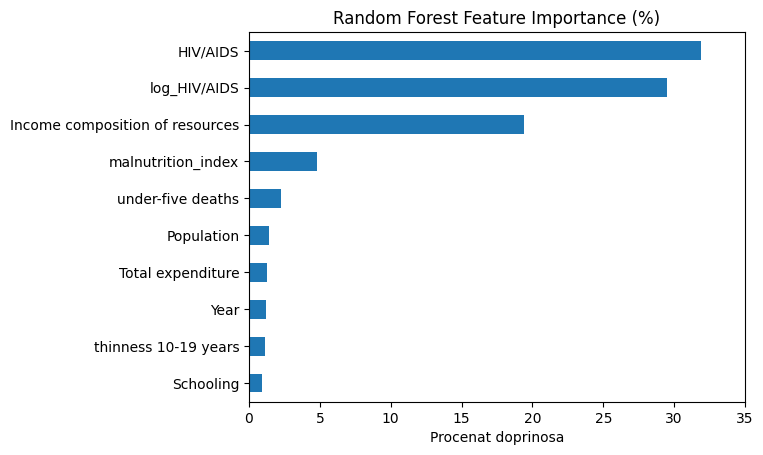

In [333]:
### DODAT KOD ###
feature_names = X_train.columns

rf_percent = 100 * pd.Series(
    rf.feature_importances_,
    index=feature_names
).sort_values(ascending=False)

max_val = rf_percent.head(10).max()

rf_percent.head(10).plot(kind='barh')
plt.title("Random Forest Feature Importance (%)")
plt.xlabel("Procenat doprinosa")
plt.xticks(np.arange(0, max_val + 5, 5))
plt.gca().invert_yaxis()
plt.show()

<span style="color:green"> `HIV/AIDS` imao udeo od 63% pri odlučivanju vrednosti očekivanog životnog veka, što naznačava da se odluka modela u najvećoj meri zasniva upravo na ovoj promenljivoj. Ovakav rezultat potkrepljuje naše zaključke, da zastupljenost bolesti HIV najbolje opisuje države koje nisu razvijene, imaju lošu infrastrukturu, loš zdravstveni sistem i generalno uslove za život. Tvrdnju potrkepljuje činjenica da je bolest HIV daleko najviše zastupljena u Afričkim državama koje su poznate po uopšteno rečeno, lošim uslovima za život. Sa druge strane, HIV je jako slabo zastupljen u razvijenim državama (Evropske države, Australija, Novi Zeland, Amerika, Kanada itd.)
`Income composition of resources` je druga po redu promenljiva po doprinosu prediktivnosti, ovo dodatno pokazuje koliko je bitan zdravstveni sistem jedne države i sva ulaganja države u isti.
Zajedno, ove dve promenljive čine oko 85% važnosti za predkicije, što pokazuje kako se jedan kompleksan atribut za predikciju kao što je `Life expectancy` može većinski opisati uz pomoć samo dva atributa.
Stvar koja dodatno potkrepljuje sva ova tvrdjenja je odlika jako niskih RMSE i MAE paramteara za Random Forest model.</span>

In [334]:
xgb = XGBRegressor(n_estimators=200,learning_rate=0.05,max_depth=4,subsample=0.8,colsample_bytree=0.8,random_state=42)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print("XGBoost RMSE:",np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("XGBoost MAE:", mean_absolute_error(y_test, y_pred_xgb))

XGBoost RMSE: 1.829879908285139
XGBoost MAE: 1.3588102065725784


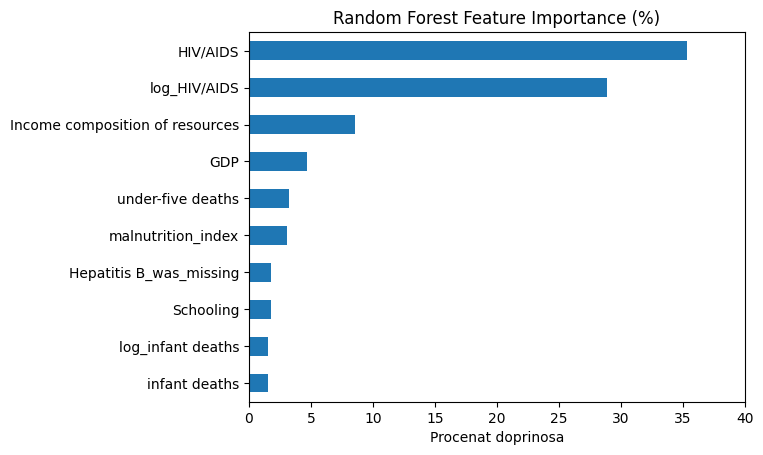

In [335]:
### DODAT KOD ###
xgboost_percent = 100 * pd.Series(
    xgb.feature_importances_,
    index=feature_names
).sort_values(ascending=False)

max_val = xgboost_percent.head(10).max()

xgboost_percent.head(10).plot(kind='barh')
plt.title("Random Forest Feature Importance (%)")
plt.xlabel("Procenat doprinosa")
plt.xticks(np.arange(0, max_val + 5, 5))
plt.gca().invert_yaxis()
plt.show()

<span style="color:green"> Sve zaključke koje smo prethodno doneli za Random Forest model, možemo i sada primeniti. S tim da je XGBoost deo 'važnosti' sa `HIV/AIDS` i `Income composition of resources` preneo na ostale parametre podjednako, pritom da `GDP` kao atribut ima ne toliko znatno veći procenat doprinosa od ostalih. Poredjenjem RMSE i MAE, vidimo ipak da je raspodela feature importance-a Random Forest-a nešto bolji. </span>

## Poredjenje modela

Nakon što smo formirali i iztrenirali sve modele sada možemo da uporedimo sve metrike koje smo dobili i uvideti kako se naš model linearne regresije poredi sa ostalima

| Model            | RMSE   | MAE    |
|------------------|--------|--------|
| Linear Regression| 3.26   | 2.59   |
| Ridge            | 3.02   | 2.29   |
| Lasso            | 3.02   | 2.29   |
| Random Forest    | 1.62   | 1.11   |
| XGBoost          | 1.83   | 1.33   |

<span style="color:green"> Azurirane vrednosti gresaka modela u tabeli (Sada su jos manje :) )</span>

Prikazom tabele, možemo prvo uporediti naš linearni model sa dva modela koja koriste regularizaciju (Ridge i Lasso), poredjenjem uvidimo da naš model greši za ≈ 0.8 godina za MAE što je sasvim solidan rezultati ako imamo u vidu da ovi metodi regularizacije traže što optimalniji model tako što isključuju odredjene prediktore preko koeficijenta i time traže što optimalniji model.
Sa druge strane ako posmatramo Random Forest i XGBoost modele, u njihovom slučaju vidimo značajne dobtike, gde su MAE i RMSE oba modela jako niski pokazujući veliku uspešnost predikcije `Life Expectancy` promenljive. Ovo ukazuje na ključnu prednost modela zasnovanih na stablima odlučivanja - sposobnost modelovanja nelinearnih odnosa između promenljivih. Random Forest to postiže bagging pristupom i kombinovanjem više stabala, dok XGBoost koristi gradient boosting, gde svako novo stablo sekvencijalno ispravlja greške prethodnih.
Iako modeli koji koriste nasumične šume imaju najbolju prediktivnu moć, svi oni imaju svoje prednosti i mane, i njihovi rezultati i primena se menjaju u zavisnosti od problema do problema koji je potrebno da reše, dodatno je bitno naglasiti da se svi modeli drugačije ponašaju i u zavinosti od toga da li su podaci normalizovani, linearni ili nelinearni, koliko resursa imamo na raspolaganju pri rešavanju problema i slično.

# Zaključak

Ovaj seminarski rad se zasnivao na ideji implementiranja metoda *Nauke o podacima* i metoda *Mašinskog učenja* kako bismo kroz sve korake (eksplorativna analiza, čišćenje podataka, priprema podataka, feature engineering, feature selection, izgradnja modela, implementacija i poredjenje modela) pokušali da što optimalnije predvidimo vrednosti očekivanog životnog veka (`Life expectancy`).

Analizom podataka smo došli do zaključka da promenljive koje su na kraju odabrane za prediktore modela,  BDP države, nivo edukacije države (`Schooling`), konzumiranje alkohola na nivou države, logaritamsku vrednost za zastupnost bolesti HIV/AIDS, kao i promenljiva dobijena  "Feature engineeringom" `immunization_index`.

Takodje je primenom neregularizovane višestruke linearne regresije u odnosu na ciljnu promenljivu `Life expectancy` dobijen model koji sa ovako limitiranim brojem promenljivih opisuje 80% varijabilnosti očekivanog životnog veka.

Poredjenjem ovog modela sa ostalim modelima, možemo uočiti da modeli koji koriste regularizacione metode (Ridge i Lasso) su kaskali za modelima koji su najbolje uspevali da opišu variajbilnost očekivanog životnog veka i pružali najmanje vrednosti RMSE i MAE metrika.

Projekat bi se mogao unaprediti eksperimentisanjem različitih pristupa u feature engineering fazi, gde bi odredjene promenljive se mogle pretvoriti u kategorijske (HIV/AIDS,Schooling i slične). Za dodatno unapredjenje bi posebno pomoglo kada bi skup podataka sadržao konciznije vrednosti za promenljivu `BMI`, jedna ideja iza toga bi mogla biti uvezivanje tih vrednosti iz nekog drugog skupa podataka. Takodje bi bilo korisno pronaći outlier vrednosti preko Z-score metrike, dodatno bi mogli primeniti i testirati Support Vector Regression (SVR) model.

Ovaj rad je pokazatelj da pravilnim vodjenjem osnovnih principa *Nauke o podacima* i primenom metoda koje ona nalaže se mogu konstruisati precizni modeli za predvidanje očekivanog životnog veka jedne populacije. Model koji smo mi projektovali - model linearne regresije, se pokazao kao poprilično interpretabilan i efikasan pristup za ovaj problem koji je uz manji broj prediktora uspeo da objasni 4/5 varijabilnosti očekivanog životnog veka. 


# Reference

 - https://cran.r-project.org/doc/contrib/Verzani-SimpleR.pdf
 - https://www.nrigroupindia.com/e-book/Introduction%20to%20Machine%20Learning%20with%20Python%20(%20PDFDrive.com%20)-min.pdf
 - Microsoft Teams, Uvod u nauku o podacima
 - https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who
